### References

https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-location-data-5c1e033d0a5a
https://www.deepakkarkala.com/docs/articles/machine_learning/airbnb_price_modeling/about/index.html
https://mohamedirfansh.github.io/Airbnb-Data-Science-Project/

https://www.kaggle.com/code/vonber95/k-means-airbnb

https://medium.com/analytics-vidhya/python-exploratory-data-analysis-eda-on-nyc-airbnb-cbeabd622e30

--> EDA

https://towardsdatascience.com/data-cleaning-and-eda-on-airbnb-dataset-with-python-pandas-and-seaborn-7c276116b650

--> For correlation heatmaps

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

--> For CART Decision (Regressor) Tree

https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1

--> For Bagged Random Forests

https://www.kaggle.com/code/adityadeshpande23/random-forest-regressor-for-airbnb-rooms-price/notebook https://mljar.com/blog/visualize-tree-from-random-forest/

### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

np.seterr(divide = 'ignore') 

#so we can view all the rows/columns and is not restricted to 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load Airbnb Pricing dataset

In [2]:
#Import listings.csv data
#obtained from http://insideairbnb.com/get-the-data/
#San Francisco, California, United States
#as of 04 December, 2022

#read the csv file
airbnb_data = pd.read_csv('listings.csv')

#view the data
airbnb_data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,144978,https://www.airbnb.com/rooms/144978,20221204162417,2022-12-04,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,https://www.airbnb.com/users/show/216682,Jay,2010-08-29,"San Francisco, CA","Originally from New York, I work in healthcar...",within a few hours,100%,89%,f,https://a0.muscache.com/im/users/216682/profil...,https://a0.muscache.com/im/users/216682/profil...,Pacific Heights,9,9,"['email', 'phone']",t,t,NaN,Pacific Heights,NaN,37.79233,-122.42431,Private room in rental unit,Private room,1,NaN,NaN,1.0,1.0,"[""Lock on bedroom door"", ""Essentials"", ""Dryer""...",$55.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,7,24,54,54,2022-12-04,120,0,0,2011-07-10,2020-03-31,4.68,4.78,4.45,4.86,4.81,4.81,4.66,NaN,f,9,4,5,0,0.86
1,958,https://www.airbnb.com/rooms/958,20221204162417,2022-12-04,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, CA",We are a family of four that live upstairs. W...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,1,1,"['email', 'phone']",t,t,"San Francisco, California, United States",Western Addition,NaN,37.77028,-122.43317,Entire serviced apartment,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free was...",$194.00,2,30,1.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,1,15,35,161,2022-12-04,371,57,2,2009-07-23,2022-11-18,4.86,4.93,4.92,4.95,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.28
2,5858,https://www.airbnb.com/rooms/5858,20221204162417,2022-12-04,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, CA",Philip: English transplant to the Bay Area and...,within a few hours,80%,71%,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,2,2,"['email', 'phone', 'work_email']",t,t,"San Francisco, California, United States",Bernal Heights,NaN,37.74474,-122.42089,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Essentials"", ""Dryer"", ""Hair dryer"", ""Smoke a...",$235.00,30,60,30.0,30.0,60.0,60.0,30.0,60.0,NaN,t,30,60,90,365,2022-12-04,111,0,0,2009-05-03,20

In [3]:
#get a basic understanding of the dataset

#number of rows in the data set
print("\nThe number of rows in the dataset: " + str(len(airbnb_data)))
#WE HAVE 6789 rows

#get number of columns
column_names = list(airbnb_data.columns)

print("\nThe number of columns in the dataset: " + str(len(column_names)))
#WE HAVE 75 COLUMNS

#get list of columns
print("\nThe list of columns in the dataset are:")
for column_names in column_names: 
    print(column_names)


The number of rows in the dataset: 6789

The number of columns in the dataset: 75

The list of columns in the dataset are:
id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_

In [4]:
#get a basic understanding of the dataset

#get a list of just the numeric columns in the dataset
numeric_columns = airbnb_data._get_numeric_data().columns.values

print("\nThe number of numeric columns in the dataset: " + str(len(numeric_columns)))
#WE HAVE 40 NUMERIC COLUMNS

print("\nThe list numeric columns in the dataset are:")
for numeric_columns in numeric_columns: 
    print(numeric_columns)


The number of numeric columns in the dataset: 40

The list numeric columns in the dataset are:
id
scrape_id
host_id
host_listings_count
host_total_listings_count
neighbourhood_group_cleansed
latitude
longitude
accommodates
bathrooms
bedrooms
beds
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
availability_30
availability_60
availability_90
availability_365
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
calculated_host_listings_count
calculated_host_listings_count_entire_homes
calculated_host_listings_count_private_rooms
calculated_host_listings_count_shared_rooms
reviews_per_month


### Data Preprocessing & EDA

### Numeric columns

In [5]:
#subset data having numeric columns

data = airbnb_data.select_dtypes(include=np.number)
data.head(5)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,144978,20221204162417,216682,9,9,NaN,37.79233,-122.42431,1,NaN,1.0,1.0,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,7,24,54,54,120,0,0,4.68,4.78,4.45,4.86,4.81,4.81,4.66,9,4,5,0,0.86
1,958,20221204162417,1169,1,1,NaN,37.77028,-122.43317,3,NaN,1.0,2.0,2,30,1.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,1,15,35,161,371,57,2,4.86,4.93,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.28
2,5858,20221204162417,8904,2,2,NaN,37.74474,-122.42089,4,NaN,2.0,2.0,30,60,30.0,30.0,60.0,60.0,30.0,60.0,NaN,30,60,90,365,111,0,0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.67
3,8142,20221204162417,21994,12,13,NaN,37.76555,-122.45213,1,NaN,1.0,1.0,32,90,32.0,32.0,90.0,90.0,32.0,90.0,NaN,30,60,90,365,9,1,0,4.67,4.44,4.44,4.78,4.78,4.67,4.67,12,0,12,0,0.09
4,8339,20221204162417,24215,2,6,NaN,37.77564,-122.43642,4,NaN,2.0,2.0,9,91,9.0,9.0,91.0,91.0,9.0,91.0,NaN,29,59,89,364,28,0,0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,2,2,0,0,0.17


In [6]:
#DATA CLEANING - NUMERIC COLUMNS#

In [7]:
#since we can see a lot of NaN values above

#identify number of columns with NaN values and the number of NaN values
print(data.isnull().sum())

id                                                 0
scrape_id                                          0
host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
neighbourhood_group_cleansed                    6789
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                       6789
bedrooms                                         918
beds                                             123
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             2
maximum_minimum_nights                             2
minimum_maximum_nights                             2
maximum_maximum_nights                             2
minimum_nights_avg_ntm                        

In [8]:
#remove columns that have all NaN values

#neighbourhood_group_cleansed                    6789
#bathrooms                                       6789
#calendar_updated                                6789
#review_scores_rating                            1227
#review_scores_accuracy                          1247
#review_scores_cleanliness                       1247
#review_scores_checkin                           1248
#review_scores_communication                     1247
#review_scores_location                          1248
#review_scores_value                             1248

data_cleaned = data.drop(columns=['neighbourhood_group_cleansed', 
                                  'bathrooms', 
                                  'calendar_updated',
                                  'review_scores_rating',
                                  'review_scores_accuracy',
                                  'review_scores_cleanliness',
                                  'review_scores_checkin',
                                  'review_scores_communication',
                                  'review_scores_location',
                                  'review_scores_value'])
                                  
print(data_cleaned.isnull().sum())

#replace the 3 columns having smaller % of NaN values with the mode value of the column
#bedrooms                                         918
#beds                                             123
#minimum_minimum_nights                          2
#maximum_minimum_nights                          2
#minimum_maximum_nights                          2
#maximum_maximum_nights                          2
#minimum_nights_avg_ntm                          2
#maximum_nights_avg_ntm                          2
data_cleaned['bedrooms'] = data_cleaned['bedrooms'].fillna(data_cleaned['bedrooms'].mode()[0])
data_cleaned['beds'] = data_cleaned['beds'].fillna(data_cleaned['beds'].mode()[0])

data_cleaned['minimum_minimum_nights'] = data_cleaned['minimum_minimum_nights'].fillna(data_cleaned['minimum_minimum_nights'].mode()[0])
data_cleaned['maximum_minimum_nights'] = data_cleaned['maximum_minimum_nights'].fillna(data_cleaned['maximum_minimum_nights'].mode()[0])
data_cleaned['minimum_maximum_nights'] = data_cleaned['minimum_maximum_nights'].fillna(data_cleaned['minimum_maximum_nights'].mode()[0])
data_cleaned['maximum_maximum_nights'] = data_cleaned['maximum_maximum_nights'].fillna(data_cleaned['maximum_maximum_nights'].mode()[0])
data_cleaned['minimum_nights_avg_ntm'] = data_cleaned['minimum_nights_avg_ntm'].fillna(data_cleaned['minimum_nights_avg_ntm'].mode()[0])
data_cleaned['maximum_nights_avg_ntm'] = data_cleaned['maximum_nights_avg_ntm'].fillna(data_cleaned['maximum_nights_avg_ntm'].mode()[0])


#replace the 1 columns having smaller % of NaN values with the 0
#reviews_per_month                               1227

data_cleaned['reviews_per_month'] = data_cleaned['reviews_per_month'].fillna(0)

id                                                 0
scrape_id                                          0
host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
latitude                                           0
longitude                                          0
accommodates                                       0
bedrooms                                         918
beds                                             123
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             2
maximum_minimum_nights                             2
minimum_maximum_nights                             2
maximum_maximum_nights                             2
minimum_nights_avg_ntm                             2
maximum_nights_avg_ntm                             2
availability_30                               

In [9]:
#identify number of columns with NaN values and the number of NaN values
print(data_cleaned.isnull().sum())

#number of columns in the cleaned data set
print("\nThe columns of rows in the cleaned dataset: " + str(len(data_cleaned._get_numeric_data().columns)))
#WE HAVE 6789 rows

id                                              0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0


In [10]:
# counting unique values in each of the columns

for col in data_cleaned.columns:
    unique_vals = len(pd.unique(data_cleaned[col]))
    print("No. of unique values " + str(col) + " is " + str(unique_vals))

No. of unique values id is 6789
No. of unique values scrape_id is 1
No. of unique values host_id is 3603
No. of unique values host_listings_count is 89
No. of unique values host_total_listings_count is 114
No. of unique values latitude is 4586
No. of unique values longitude is 4619
No. of unique values accommodates is 16
No. of unique values bedrooms is 10
No. of unique values beds is 14
No. of unique values minimum_nights is 55
No. of unique values maximum_nights is 150
No. of unique values minimum_minimum_nights is 58
No. of unique values maximum_minimum_nights is 59
No. of unique values minimum_maximum_nights is 130
No. of unique values maximum_maximum_nights is 128
No. of unique values minimum_nights_avg_ntm is 172
No. of unique values maximum_nights_avg_ntm is 263
No. of unique values availability_30 is 31
No. of unique values availability_60 is 61
No. of unique values availability_90 is 91
No. of unique values availability_365 is 365
No. of unique values number_of_reviews is 453


In [11]:
#since the column 'scrape_id' has just 1 value
#it will not be of much use in the analysis
#hence we will remove it from our final data

data_cleaned2 = data_cleaned.drop(columns=['scrape_id'])

#view processed data
data_cleaned2.head(5)

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,144978,216682,9,9,37.79233,-122.42431,1,1.0,1.0,30,365,30.0,30.0,365.0,365.0,30.0,365.0,7,24,54,54,120,0,0,9,4,5,0,0.86
1,958,1169,1,1,37.77028,-122.43317,3,1.0,2.0,2,30,1.0,2.0,1125.0,1125.0,2.0,1125.0,1,15,35,161,371,57,2,1,1,0,0,2.28
2,5858,8904,2,2,37.74474,-122.42089,4,2.0,2.0,30,60,30.0,30.0,60.0,60.0,30.0,60.0,30,60,90,365,111,0,0,1,1,0,0,0.67
3,8142,21994,12,13,37.76555,-122.45213,1,1.0,1.0,32,90,32.0,32.0,90.0,90.0,32.0,90.0,30,60,90,365,9,1,0,12,0,12,0,0.09
4,8339,24215,2,6,37.77564,-122.43642,4,2.0,2.0,9,91,9.0,9.0,91.0,91.0,9.0,91.0,29,59,89,364,28,0,0,2,2,0,0,0.17


In [12]:
#since the values in some columns seem similar
#we review them closely

# correlation between column 1 and column2
print(data_cleaned2['minimum_nights'].corr(data_cleaned2['minimum_minimum_nights'])) 
#extremely high so we can get rid of minium_minimum_nights column 

print(data_cleaned2['minimum_nights'].corr(data_cleaned2['maximum_minimum_nights']))
#relatively high so we can get rid of maximum_minimum_nights column

print(data_cleaned2['maximum_nights'].corr(data_cleaned2['minimum_maximum_nights'])) 
#low so we cannot remove minimum_maximum_nights column here

print(data_cleaned2['maximum_nights'].corr(data_cleaned2['maximum_maximum_nights'])) 
#low so we cannot remove maximum_maximum_nights column here

print(data_cleaned2['minimum_nights'].corr(data_cleaned2['minimum_nights_avg_ntm']))
#relatively high so we can get rid of minimum_nights_avg_ntm column

print(data_cleaned2['maximum_nights'].corr(data_cleaned2['maximum_nights_avg_ntm']))
#low so we cannot remove maximum_nights_avg_ntm column here

0.91497253091302
0.7537862881297416
0.001677682310771502
0.001866938468135524
0.7622800441188677
0.0017987634915860565


In [13]:
data_cleaned2 = data_cleaned2.drop(columns=['minimum_minimum_nights'])
data_cleaned2 = data_cleaned2.drop(columns=['maximum_minimum_nights'])
data_cleaned2 = data_cleaned2.drop(columns=['minimum_nights_avg_ntm'])

#view data
data_cleaned2.head(5)

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,144978,216682,9,9,37.79233,-122.42431,1,1.0,1.0,30,365,365.0,365.0,365.0,7,24,54,54,120,0,0,9,4,5,0,0.86
1,958,1169,1,1,37.77028,-122.43317,3,1.0,2.0,2,30,1125.0,1125.0,1125.0,1,15,35,161,371,57,2,1,1,0,0,2.28
2,5858,8904,2,2,37.74474,-122.42089,4,2.0,2.0,30,60,60.0,60.0,60.0,30,60,90,365,111,0,0,1,1,0,0,0.67
3,8142,21994,12,13,37.76555,-122.45213,1,1.0,1.0,32,90,90.0,90.0,90.0,30,60,90,365,9,1,0,12,0,12,0,0.09
4,8339,24215,2,6,37.77564,-122.43642,4,2.0,2.0,9,91,91.0,91.0,91.0,29,59,89,364,28,0,0,2,2,0,0,0.17


In [14]:
#note that:
#minimum_nights: minimum number of nights a guest can stay for the rental
#maximum_nights: maximum number of nights a guest can stay for the rental
#the two columns already cover information of the number of nights allowed, so we do not need the extra columns

# hence, we choose to still remove minimum_maximum_nights, maximum_maximum_nights, maximum_nights_avg_ntm columns
data_cleaned2 = data_cleaned2.drop(columns=['minimum_maximum_nights'])
data_cleaned2 = data_cleaned2.drop(columns=['maximum_maximum_nights'])
data_cleaned2 = data_cleaned2.drop(columns=['maximum_nights_avg_ntm'])

#view data
data_cleaned2.head(5)

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,144978,216682,9,9,37.79233,-122.42431,1,1.0,1.0,30,365,7,24,54,54,120,0,0,9,4,5,0,0.86
1,958,1169,1,1,37.77028,-122.43317,3,1.0,2.0,2,30,1,15,35,161,371,57,2,1,1,0,0,2.28
2,5858,8904,2,2,37.74474,-122.42089,4,2.0,2.0,30,60,30,60,90,365,111,0,0,1,1,0,0,0.67
3,8142,21994,12,13,37.76555,-122.45213,1,1.0,1.0,32,90,30,60,90,365,9,1,0,12,0,12,0,0.09
4,8339,24215,2,6,37.77564,-122.43642,4,2.0,2.0,9,91,29,59,89,364,28,0,0,2,2,0,0,0.17


In [15]:
#Look at correlations between avaialability_30,60,90 and 365 
#we review them closely

#correlation between column availability_30 and remaining
print("for 30 with 60,90,365:")
print(data_cleaned2['availability_30'].corr(data_cleaned2['availability_60'])) 
print(data_cleaned2['availability_30'].corr(data_cleaned2['availability_90'])) 
print(data_cleaned2['availability_30'].corr(data_cleaned2['availability_365'])) 

#correlation between column availability_60 and remaining
print("\nfor 60 with 90,365:")
print(data_cleaned2['availability_60'].corr(data_cleaned2['availability_90'])) 
print(data_cleaned2['availability_60'].corr(data_cleaned2['availability_365'])) 

#correlation between column availability_90 and remaining
print("\nfor 90 with 365:")
print(data_cleaned2['availability_90'].corr(data_cleaned2['availability_365'])) 

#hence we choose to drop availibility_60 and availibilty_90
#retain availability_30 and availability_365
data_cleaned2 = data_cleaned2.drop(columns=['availability_60'])
data_cleaned2 = data_cleaned2.drop(columns=['availability_90'])

#view final data for only numeric columns
data_cleaned2.head(5)

for 30 with 60,90,365:
0.9105796063704892
0.8287146245964693
0.4891492025164126

for 60 with 90,365:
0.9640969514996084
0.5799057396681004

for 90 with 365:
0.6346341500915251


,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,144978,216682,9,9,37.79233,-122.42431,1,1.0,1.0,30,365,7,54,120,0,0,9,4,5,0,0.86
1,958,1169,1,1,37.77028,-122.43317,3,1.0,2.0,2,30,1,161,371,57,2,1,1,0,0,2.28
2,5858,8904,2,2,37.74474,-122.42089,4,2.0,2.0,30,60,30,365,111,0,0,1,1,0,0,0.67
3,8142,21994,12,13,37.76555,-122.45213,1,1.0,1.0,32,90,30,365,9,1,0,12,0,12,0,0.09
4,8339,24215,2,6,37.77564,-122.43642,4,2.0,2.0,9,91,29,364,28,0,0,2,2,0,0,0.17


### Non-numeric columns

In [16]:
#Look at Non-numeric columns
data_cat = airbnb_data.select_dtypes(exclude=['number'])

#view data_cat
data_cat.head(5)

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/144978,2022-12-04,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,https://www.airbnb.com/users/show/216682,Jay,2010-08-29,"San Francisco, CA","Originally from New York, I work in healthcar...",within a few hours,100%,89%,f,https://a0.muscache.com/im/users/216682/profil...,https://a0.muscache.com/im/users/216682/profil...,Pacific Heights,"['email', 'phone']",t,t,NaN,Pacific Heights,Private room in rental unit,Private room,NaN,"[""Lock on bedroom door"", ""Essentials"", ""Dryer""...",$55.00,t,2022-12-04,2011-07-10,2020-03-31,NaN,f
1,https://www.airbnb.com/rooms/958,2022-12-04,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, CA",We are a family of four that live upstairs. W...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,"['email', 'phone']",t,t,"San Francisco, California, United States",Western Addition,Entire serviced apartment,Entire home/apt,1 bath,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free was...",$194.00,t,2022-12-04,2009-07-23,2022-11-18,City Registration Pending,f
2,https://www.airbnb.com/rooms/5858,2022-12-04,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, CA",Philip: English transplant to the Bay Area and...,within a few hours,80%,71%,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,"['email', 'phone', 'work_email']",t,t,"San Francisco, California, United States",Bernal Heights,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Dryer"", ""Hair dryer"", ""Smoke a...",$235.00,t,2022-12-04,2009-05-03,2017-08-06,NaN,f
3,https://www.airbnb.com/rooms/8142,2022-12-04,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,2009-06-17,"San Francisco, CA",7 minutes walk to UCSF hospital & school campu...,within a few hours,100%,74%,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,"['email', 'phone']",t,t,"San Francisco, California, United States",Haight Ashbury,Private room in rental unit,Private room,4 shared baths,"[""Lock on bedroom door"", ""Kitchen"", ""Free stre...",$56.00,t,2022-12-04,2014-09-08,2022-10-27,NaN,f
4,https://www.airbnb.com/rooms/8339,2022-12-04,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,2009-07-02,"San Francisco, CA",I'm an Interior Stylist living in SF. \r\n\r\n...,within a few hours,100%,0%,f,https://a0.muscache.com/im/pictures/user/6e05b...,https://a0.muscache.com/im/pictures/user/6e05b...,Alamo Square,"['email', 'phone']",t,t,NaN,Western Addition,

In [17]:
len(data_cat.columns)
#35 columns + 40 columns above, hence 75 match is correct

35

In [18]:
#DATA-CLEANING : NON_NUMERIC#

In [19]:
#we drop columns that have the same value/ are of no use for analysis
#such as
#details related to the host

#host_neighbourhood
print(data_cat['neighbourhood_cleansed'].unique())
#most of the essential data regarding neighbourhood is captured by neighbourhood_cleansed 
#and so we decide to drop related columns

#Property_Type
print(data_cat.property_type.value_counts())

#Room_Type
print(data_cat['room_type'].unique())

#like we can see that the kind of stay within the property type is define by room_type we can drop property_type


data_cat2 = data_cat.drop(columns=['host_name', 
                                   'listing_url',
                                   'last_scraped', #unique value
                                   'source', #unique value
                                   'name',
                                   'description',
                                   'neighborhood_overview', #captured by neighbourhood_clensed
                                   'picture_url',
                                   'host_url',
                                   'host_since',
                                   'host_location', #captured by neighbourhood_clensed
                                   'host_about',
                                   'host_thumbnail_url',
                                   'host_picture_url',
                                   'host_neighbourhood', #captured by neighbourhood_clensed
                                   'neighbourhood', #captured by neighbourhood_clensed
                                   'bathrooms_text',
                                   'property_type', #captured by room_type
                                   'calendar_last_scraped',
                                   'first_review',
                                   'last_review',
                                   'license'])
data_cat2.head(5)

['Pacific Heights' 'Western Addition' 'Bernal Heights' 'Haight Ashbury'
 'Mission' 'Bayview' 'Nob Hill' 'Castro/Upper Market' 'Potrero Hill'
 'Glen Park' 'Outer Richmond' 'Downtown/Civic Center' 'Financial District'
 'Outer Sunset' 'Marina' 'Inner Richmond' 'West of Twin Peaks'
 'North Beach' 'Inner Sunset' 'Noe Valley' 'Excelsior' 'Outer Mission'
 'Chinatown' 'Russian Hill' 'Presidio Heights' 'South of Market'
 'Parkside' 'Crocker Amazon' 'Ocean View' 'Twin Peaks' 'Golden Gate Park'
 'Presidio' 'Seacliff' 'Lakeshore' 'Diamond Heights' 'Visitacion Valley']
Entire rental unit                    1795
Private room in home                   848
Entire condo                           821
Entire home                            812
Entire guest suite                     498
Private room in rental unit            460
Room in boutique hotel                 363
Room in hotel                          231
Private room in condo                  190
Entire serviced apartment              165
Room in

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,amenities,price,has_availability,instant_bookable
0,within a few hours,100%,89%,f,"['email', 'phone']",t,t,Pacific Heights,Private room,"[""Lock on bedroom door"", ""Essentials"", ""Dryer""...",$55.00,t,f
1,within an hour,100%,98%,t,"['email', 'phone']",t,t,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free was...",$194.00,t,f
2,within a few hours,80%,71%,f,"['email', 'phone', 'work_email']",t,t,Bernal Heights,Entire home/apt,"[""Essentials"", ""Dryer"", ""Hair dryer"", ""Smoke a...",$235.00,t,f
3,within a few hours,100%,74%,f,"['email', 'phone']",t,t,Haight Ashbury,Private room,"[""Lock on bedroom door"", ""Kitchen"", ""Free stre...",$56.00,t,f
4,within a few hours,100%,0%,f,"['email', 'phone']",t,t,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free str...",$575.00,t,f


In [20]:
#check number of NANs
print(data_cat2.isnull().sum())

host_response_time        1044
host_response_rate        1044
host_acceptance_rate       799
host_is_superhost            5
host_verifications           0
host_has_profile_pic         0
host_identity_verified       0
neighbourhood_cleansed       0
room_type                    0
amenities                    0
price                        0
has_availability             0
instant_bookable             0
dtype: int64


In [21]:
#check unique values and change to desired format

#host_response_time
data_cat2['host_response_time'].unique()

#convert data into 3 categories
#within a few hours & within an hour -> quick response -> 1
#within a day & a few days or more -> late response -> 2

#NAN -> no response -> 3

data_cat2.loc[data_cat2['host_response_time'] == 'within a few hours' , 'host_response_time'] = '1' #quick response
data_cat2.loc[data_cat2['host_response_time'] == 'within an hour' , 'host_response_time'] = '1' #quick response
data_cat2.loc[data_cat2['host_response_time'] == 'within a day' , 'host_response_time'] = '2' #late response
data_cat2.loc[data_cat2['host_response_time'] == 'a few days or more' , 'host_response_time'] = '2' #late response
data_cat2['host_response_time'] = data_cat2['host_response_time'].fillna(3)


data_cat2.head(5)

#eventually drop the column 'host_response_time'

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,amenities,price,has_availability,instant_bookable
0,1,100%,89%,f,"['email', 'phone']",t,t,Pacific Heights,Private room,"[""Lock on bedroom door"", ""Essentials"", ""Dryer""...",$55.00,t,f
1,1,100%,98%,t,"['email', 'phone']",t,t,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free was...",$194.00,t,f
2,1,80%,71%,f,"['email', 'phone', 'work_email']",t,t,Bernal Heights,Entire home/apt,"[""Essentials"", ""Dryer"", ""Hair dryer"", ""Smoke a...",$235.00,t,f
3,1,100%,74%,f,"['email', 'phone']",t,t,Haight Ashbury,Private room,"[""Lock on bedroom door"", ""Kitchen"", ""Free stre...",$56.00,t,f
4,1,100%,0%,f,"['email', 'phone']",t,t,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free str...",$575.00,t,f


In [22]:
#remove % from
#host_response_rate
#host_acceptance_rate

data_cat2['host_response_rate'] = data_cat2['host_response_rate'].str.replace("%","")
data_cat2['host_acceptance_rate'] = data_cat2['host_acceptance_rate'].str.replace("%","")

#replace NaNs in both by 0, considering no response rate
data_cat2['host_response_rate'] = data_cat2['host_response_rate'].fillna(0)
data_cat2['host_acceptance_rate'] = data_cat2['host_acceptance_rate'].fillna(0)

#view data
data_cat2.head(10)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,amenities,price,has_availability,instant_bookable
0,1,100,89,f,"['email', 'phone']",t,t,Pacific Heights,Private room,"[""Lock on bedroom door"", ""Essentials"", ""Dryer""...",$55.00,t,f
1,1,100,98,t,"['email', 'phone']",t,t,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free was...",$194.00,t,f
2,1,80,71,f,"['email', 'phone', 'work_email']",t,t,Bernal Heights,Entire home/apt,"[""Essentials"", ""Dryer"", ""Hair dryer"", ""Smoke a...",$235.00,t,f
3,1,100,74,f,"['email', 'phone']",t,t,Haight Ashbury,Private room,"[""Lock on bedroom door"", ""Kitchen"", ""Free stre...",$56.00,t,f
4,1,100,0,f,"['email', 'phone']",t,t,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free str...",$575.00,t,f
5,1,100,89,t,"['email', 'phone', 'work_email']",t,t,Mission,Private room,"[""Essentials"", ""Toaster"", ""Dishwasher"", ""Wine ...",$129.00,t,f
6,1,100,100,t,"['email', 'phone', 'work_email']",t,t,Bayview,Private room,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free str...",$95.00,t,f
7,3,0,0,f,"['email', 'phone']",t,t,Nob Hill,Entire home/apt,"[""Essentials"", ""Dryer"", ""Hair dryer"", ""Smoke a...",$120.00,t,f
8,1,100,50,t,"['email', 'phone']",t,t,Nob Hill,Entire home/apt,"[""Essentials"", ""Dryer"", ""Kitchen"", ""Elevator"",...",$115.00,t,f
9,1,100,74,f,"['email', 'phone']",t,t,Haight Ashbury,Private room,"[""Lock on bedroom door"", ""Wifi"", ""Dryer"", ""Ded...",$65.00,t,f


In [23]:
#remove $ from
#price

data_cat2['price'] = data_cat2['price'].str.replace("$","")
data_cat2['price'] = data_cat2['price'].str.replace(",","")

#view data
data_cat2.head(10)

/var/folders/0x/_blkk8vx49ncsq6zmw061mtw0000gn/T/ipykernel_1598/4257533635.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_cat2['price'] = data_cat2['price'].str.replace("$","")


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,amenities,price,has_availability,instant_bookable
0,1,100,89,f,"['email', 'phone']",t,t,Pacific Heights,Private room,"[""Lock on bedroom door"", ""Essentials"", ""Dryer""...",55.00,t,f
1,1,100,98,t,"['email', 'phone']",t,t,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free was...",194.00,t,f
2,1,80,71,f,"['email', 'phone', 'work_email']",t,t,Bernal Heights,Entire home/apt,"[""Essentials"", ""Dryer"", ""Hair dryer"", ""Smoke a...",235.00,t,f
3,1,100,74,f,"['email', 'phone']",t,t,Haight Ashbury,Private room,"[""Lock on bedroom door"", ""Kitchen"", ""Free stre...",56.00,t,f
4,1,100,0,f,"['email', 'phone']",t,t,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free str...",575.00,t,f
5,1,100,89,t,"['email', 'phone', 'work_email']",t,t,Mission,Private room,"[""Essentials"", ""Toaster"", ""Dishwasher"", ""Wine ...",129.00,t,f
6,1,100,100,t,"['email', 'phone', 'work_email']",t,t,Bayview,Private room,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free str...",95.00,t,f
7,3,0,0,f,"['email', 'phone']",t,t,Nob Hill,Entire home/apt,"[""Essentials"", ""Dryer"", ""Hair dryer"", ""Smoke a...",120.00,t,f
8,1,100,50,t,"['email', 'phone']",t,t,Nob Hill,Entire home/apt,"[""Essentials"", ""Dryer"", ""Kitchen"", ""Elevator"",...",115.00,t,f
9,1,100,74,f,"['email', 'phone']",t,t,Haight Ashbury,Private room,"[""Lock on bedroom door"", ""Wifi"", ""Dryer"", ""Ded...",65.00,t,f


In [24]:
#replace all columns having 't'/'f' values with '1'/'0'

#host_is_superhost
data_cat2.loc[data_cat2['host_is_superhost'] == 't' , 'host_is_superhost'] = '1'
data_cat2.loc[data_cat2['host_is_superhost'] == 'f' , 'host_is_superhost'] = '0'

#also replace the 5 NANs with 0, suggesting they are not superhosts
data_cat2['host_is_superhost'] = data_cat2['host_is_superhost'].fillna(0)

#host_has_profile_pic
data_cat2.loc[data_cat2['host_has_profile_pic'] == 't' , 'host_has_profile_pic'] = '1'
data_cat2.loc[data_cat2['host_has_profile_pic'] == 'f' , 'host_has_profile_pic'] = '0'

#host_identity_verified
data_cat2.loc[data_cat2['host_identity_verified'] == 't' , 'host_identity_verified'] = '1'
data_cat2.loc[data_cat2['host_identity_verified'] == 'f' , 'host_identity_verified'] = '0'

#has_availability
data_cat2.loc[data_cat2['has_availability'] == 't' , 'has_availability'] = '1'
data_cat2.loc[data_cat2['has_availability'] == 'f' , 'has_availability'] = '0'

#instant_bookable
data_cat2.loc[data_cat2['instant_bookable'] == 't' , 'instant_bookable'] = '1'
data_cat2.loc[data_cat2['instant_bookable'] == 'f' , 'instant_bookable'] = '0'

#check number of NANs
print(data_cat2.isnull().sum())

host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood_cleansed    0
room_type                 0
amenities                 0
price                     0
has_availability          0
instant_bookable          0
dtype: int64


In [25]:
#view data
data_cat2.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,amenities,price,has_availability,instant_bookable
0,1,100,89,0,"['email', 'phone']",1,1,Pacific Heights,Private room,"[""Lock on bedroom door"", ""Essentials"", ""Dryer""...",55.00,1,0
1,1,100,98,1,"['email', 'phone']",1,1,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free was...",194.00,1,0
2,1,80,71,0,"['email', 'phone', 'work_email']",1,1,Bernal Heights,Entire home/apt,"[""Essentials"", ""Dryer"", ""Hair dryer"", ""Smoke a...",235.00,1,0
3,1,100,74,0,"['email', 'phone']",1,1,Haight Ashbury,Private room,"[""Lock on bedroom door"", ""Kitchen"", ""Free stre...",56.00,1,0
4,1,100,0,0,"['email', 'phone']",1,1,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free str...",575.00,1,0


In [26]:
#host_verifications column has five unique values 
data_cat2['host_verifications'].unique()

array(["['email', 'phone']", "['email', 'phone', 'work_email']",
       "['phone']", "['phone', 'work_email']", "['email']"], dtype=object)

In [27]:
#"['email', 'phone']" --> category 1
data_cat2.loc[data_cat2['host_verifications'] == "['email', 'phone']", 'host_verifications'] = '1'

#"['email', 'phone', 'work_email']" --> category 2
data_cat2.loc[data_cat2['host_verifications'] == "['email', 'phone', 'work_email']", 'host_verifications'] = '2'

#"[phone']" --> category 3
data_cat2.loc[data_cat2['host_verifications'] == "['phone']", 'host_verifications'] = '3'

#"['phone', 'work_email']" --> category 4
data_cat2.loc[data_cat2['host_verifications'] == "['phone', 'work_email']", 'host_verifications'] = '4'

#"['email']" --> category 5
data_cat2.loc[data_cat2['host_verifications'] == "['email']", 'host_verifications'] = '5'

In [28]:
#check host_verifications column again
data_cat2['host_verifications'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [29]:
#view data
data_cat2.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,amenities,price,has_availability,instant_bookable
0,1,100,89,0,1,1,1,Pacific Heights,Private room,"[""Lock on bedroom door"", ""Essentials"", ""Dryer""...",55.00,1,0
1,1,100,98,1,1,1,1,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free was...",194.00,1,0
2,1,80,71,0,2,1,1,Bernal Heights,Entire home/apt,"[""Essentials"", ""Dryer"", ""Hair dryer"", ""Smoke a...",235.00,1,0
3,1,100,74,0,1,1,1,Haight Ashbury,Private room,"[""Lock on bedroom door"", ""Kitchen"", ""Free stre...",56.00,1,0
4,1,100,0,0,1,1,1,Western Addition,Entire home/apt,"[""Essentials"", ""Kitchen"", ""Toaster"", ""Free str...",575.00,1,0


In [30]:
#amenities column has many unique values 
data_cat2['amenities'].unique()

array(['["Lock on bedroom door", "Essentials", "Dryer", "Hair dryer", "Bed linens", "Smoke alarm", "Extra pillows and blankets", "Washer", "Fire extinguisher", "Wifi", "Kitchen", "Iron", "Carbon monoxide alarm", "Hangers", "Host greets you", "Dishes and silverware", "Long term stays allowed", "Microwave", "Hot water", "Coffee maker"]',
       '["Essentials", "Kitchen", "Toaster", "Free washer \\u2013 In building", "Free street parking", "Oven", "Dining table", "Cleaning products", "Drying rack for clothing", "Free dryer \\u2013 In building", "TEA TREE TRIPLE TREAT\\u2122  conditioner", "Outdoor furniture", "Wine glasses", "Clothing storage: closet and dresser", "Crib", "Extra pillows and blankets", "Everyone Soap body soap", "Wifi", "Bathtub", "Stove", "Shared backyard \\u2013 Fully fenced", "Carbon monoxide alarm", "Cooking basics", "Hangers", "TV with standard cable", "Shower gel", "Children\\u2019s books and toys for ages 0-2 years old, 2-5 years old, and 5-10 years old", "TEA TREE 

In [31]:
# Count the number of commas in each row of the amenities column
data_cat2['amenities_variety'] = data_cat2['amenities'].str.join('').str.count(',')

data_cat2['amenities_variety'].unique()

array([19, 53, 15, 20, 34, 38, 60, 14, 47, 18, 31, 51, 32, 16, 28, 27, 45,
       42, 30, 49, 40, 54, 35, 24, 39, 23, 22, 21,  6, 33, 26, 55, 10, 43,
       50, 36, 63,  7, 44, 46, 70, 37, 25, 62,  9, 29,  8, 75, 64, 52,  3,
       59, 17, 11, 41,  0, 57, 48, 13, 12,  4, 58, 66, 67, 76, 81, 77, 61,
       56, 65, 68, 78,  5, 71, 72, 92, 85, 82,  1, 74, 91, 69, 90, 93, 79,
       84, 73, 83, 86, 95, 80,  2])

In [32]:
data_cat2 =  data_cat2.drop(columns=['amenities'])

In [33]:
#convert strings in amenities_variety column into numerics
data_cat2['amenities_variety'] = pd.to_numeric(data_cat2['amenities_variety'])

In [34]:
#do the same conversion for 
#host_response_rate
#host_response_time
#host_acceptance_rate
#price columns
data_cat2['host_response_rate'] = pd.to_numeric(data_cat2['host_response_rate'])
data_cat2['host_response_time'] = pd.to_numeric(data_cat2['host_response_time'])
data_cat2['host_acceptance_rate'] = pd.to_numeric(data_cat2['host_acceptance_rate'])
data_cat2['price'] = pd.to_numeric(data_cat2['price'])

#convert the original true/false columns to numeric as well
data_cat2['host_is_superhost'] = pd.to_numeric(data_cat2['host_is_superhost'])
data_cat2['host_identity_verified'] = pd.to_numeric(data_cat2['host_identity_verified'])
data_cat2['has_availability'] = pd.to_numeric(data_cat2['has_availability'])
data_cat2['instant_bookable'] = pd.to_numeric(data_cat2['instant_bookable'])

In [35]:
# Print the data types of each column
print(data_cat2.dtypes)

host_response_time          int64
host_response_rate          int64
host_acceptance_rate        int64
host_is_superhost           int64
host_verifications         object
host_has_profile_pic       object
host_identity_verified      int64
neighbourhood_cleansed     object
room_type                  object
price                     float64
has_availability            int64
instant_bookable            int64
amenities_variety           int64
dtype: object


In [36]:
print(data_cleaned2.dtypes)

id                                                int64
host_id                                           int64
host_listings_count                               int64
host_total_listings_count                         int64
latitude                                        float64
longitude                                       float64
accommodates                                      int64
bedrooms                                        float64
beds                                            float64
minimum_nights                                    int64
maximum_nights                                    int64
availability_30                                   int64
availability_365                                  int64
number_of_reviews                                 int64
number_of_reviews_ltm                             int64
number_of_reviews_l30d                            int64
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes     

In [37]:
#view final data with previously non-numeric columns
data_cat2.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,price,has_availability,instant_bookable,amenities_variety
0,1,100,89,0,1,1,1,Pacific Heights,Private room,55.0,1,0,19
1,1,100,98,1,1,1,1,Western Addition,Entire home/apt,194.0,1,0,53
2,1,80,71,0,2,1,1,Bernal Heights,Entire home/apt,235.0,1,0,15
3,1,100,74,0,1,1,1,Haight Ashbury,Private room,56.0,1,0,20
4,1,100,0,0,1,1,1,Western Addition,Entire home/apt,575.0,1,0,34


In [38]:
len(data_cat2.columns)

13

In [39]:
#review final data with numeric columns
data_cleaned2.head(5)

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,144978,216682,9,9,37.79233,-122.42431,1,1.0,1.0,30,365,7,54,120,0,0,9,4,5,0,0.86
1,958,1169,1,1,37.77028,-122.43317,3,1.0,2.0,2,30,1,161,371,57,2,1,1,0,0,2.28
2,5858,8904,2,2,37.74474,-122.42089,4,2.0,2.0,30,60,30,365,111,0,0,1,1,0,0,0.67
3,8142,21994,12,13,37.76555,-122.45213,1,1.0,1.0,32,90,30,365,9,1,0,12,0,12,0,0.09
4,8339,24215,2,6,37.77564,-122.43642,4,2.0,2.0,9,91,29,364,28,0,0,2,2,0,0,0.17


In [40]:
len(data_cleaned2.columns)

21

### Concatenate two preprocessed subsets into one final dataset

In [41]:
#NOW, WE NEED TO JOIN THE 2 DATASETS TOGETHER -> data_cat2 & data_cleaned2 (after dropping few columns)
airbnb_concat = pd.concat([data_cleaned2, data_cat2], axis=1)

airbnb_concat.head(10)

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,price,has_availability,instant_bookable,amenities_variety
0,144978,216682,9,9,37.79233,-122.42431,1,1.0,1.0,30,365,7,54,120,0,0,9,4,5,0,0.86,1,100,89,0,1,1,1,Pacific Heights,Private room,55.0,1,0,19
1,958,1169,1,1,37.77028,-122.43317,3,1.0,2.0,2,30,1,161,371,57,2,1,1,0,0,2.28,1,100,98,1,1,1,1,Western Addition,Entire home/apt,194.0,1,0,53
2,5858,8904,2,2,37.74474,-122.42089,4,2.0,2.0,30,60,30,365,111,0,0,1,1,0,0,0.67,1,80,71,0,2,1,1,Bernal Heights,Entire home/apt,235.0,1,0,15
3,8142,21994,12,13,37.76555,-122.45213,1,1.0,1.0,32,90,30,365,9,1,0,12,0,12,0,0.09,1,100,74,0,1,1,1,Haight Ashbury,Private room,56.0,1,0,20
4,8339,24215,2,6,37.77564,-122.43642,4,2.0,2.0,9,91,29,364,28,0,0,2,2,0,0,0.17,1,100,0,0,1,1,1,Western Addition,Entire home/apt,575.0,1,0,34
5,8739,7149,2,2,37.76030,-122.42197,3,1.0,1.0,1,26,15,161,761,25,1,2,0,2,0,4.68,1,100,89,1,2,1,1,Mission,Private room,129.0,1,0,38
6,10537,36752,2,3,37.71750,-122.39698,2,1.0,1.0,1,90,30,365,18,0,0,2,0,2,0,0.12,1,100,100,1,2,1,1,Bayview,Private room,95.0,1,0,60
7,10578,37049,1,2,37.79249,-122.41499,2,1.0,1.0,30,180,24,359,18,0,0,1,1,0,0,0.14,3,0,0,0,1,1,1,Nob Hill,Entire home/apt,120.0,1,0,14
8,11490,42681,1,1,37.79140,-122.41149,4,2.0,2.0,30,1125,13,146,44,3,0,1,1,0,0,0.28,1,100,50,1,1,1,1,Nob Hill,Entire home/apt,115.0,1,0,47
9,12041,21994,12,13,37.76901,-122.44701,2,1.0,2.0,32,120,30,365,7,1,0,12,0,12,0,0.05,1,100,74,0,1,1,1,Haight Ashbury,Private room,65.0,1,0,18


In [42]:
len(data_cleaned2) - len(data_cat2)
#verify that we have the same number of rows in two combined datasets

0

In [43]:
#since calculated_host_listings_count is a sum of 
#calculated_host_listings_count_entire_homes
#calculated_host_listings_count_private_rooms
#calculated_host_listings_count_shared_rooms and hence highly correlated, can be dropped

#calculated_host_listings_count is also the same as host_listings_count, so one of them can be dropped
#also, there is a host_total_listings_count column, which has different values from host_listings_count but has similar implications in the dataset
# hence, we keep only the host_listings_count coulumn out of all similar columns

airbnb_concat = airbnb_concat.drop(columns=['calculated_host_listings_count',
                                            'host_total_listings_count',
                                            'calculated_host_listings_count_entire_homes',
                                            'calculated_host_listings_count_private_rooms',
                                            'calculated_host_listings_count_shared_rooms'])


#view final airbnb data
airbnb_concat.head(10)

,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,reviews_per_month,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,price,has_availability,instant_bookable,amenities_variety
0,144978,216682,9,37.79233,-122.42431,1,1.0,1.0,30,365,7,54,120,0,0,0.86,1,100,89,0,1,1,1,Pacific Heights,Private room,55.0,1,0,19
1,958,1169,1,37.77028,-122.43317,3,1.0,2.0,2,30,1,161,371,57,2,2.28,1,100,98,1,1,1,1,Western Addition,Entire home/apt,194.0,1,0,53
2,5858,8904,2,37.74474,-122.42089,4,2.0,2.0,30,60,30,365,111,0,0,0.67,1,80,71,0,2,1,1,Bernal Heights,Entire home/apt,235.0,1,0,15
3,8142,21994,12,37.76555,-122.45213,1,1.0,1.0,32,90,30,365,9,1,0,0.09,1,100,74,0,1,1,1,Haight Ashbury,Private room,56.0,1,0,20
4,8339,24215,2,37.77564,-122.43642,4,2.0,2.0,9,91,29,364,28,0,0,0.17,1,100,0,0,1,1,1,Western Addition,Entire home/apt,575.0,1,0,34
5,8739,7149,2,37.76030,-122.42197,3,1.0,1.0,1,26,15,161,761,25,1,4.68,1,100,89,1,2,1,1,Mission,Private room,129.0,1,0,38
6,10537,36752,2,37.71750,-122.39698,2,1.0,1.0,1,90,30,365,18,0,0,0.12,1,100,100,1,2,1,1,Bayview,Private room,95.0,1,0,60
7,10578,37049,1,37.79249,-122.41499,2,1.0,1.0,30,180,24,359,18,0,0,0.14,3,0,0,0,1,1,1,Nob Hill,Entire home/apt,120.0,1,0,14
8,11490,42681,1,37.79140,-122.41149,4,2.0,2.0,30,1125,13,146,44,3,0,0.28,1,100,50,1,1,1,1,Nob Hill,Entire home/apt,115.0,1,0,47
9,12041,21994,12,37.76901,-122.44701,2,1.0,2.0,32,120,30,365,7,1,0,0.05,1,100,74,0,1,1,1,Haight Ashbury,Private room,65.0,1,0,18


In [44]:
len(airbnb_concat)
#the total number of rows in our final dataset

6789

In [45]:
len(airbnb_concat.columns)
#check the total number of columns in the finalized dataset

29

### Exploratory Data Analysis

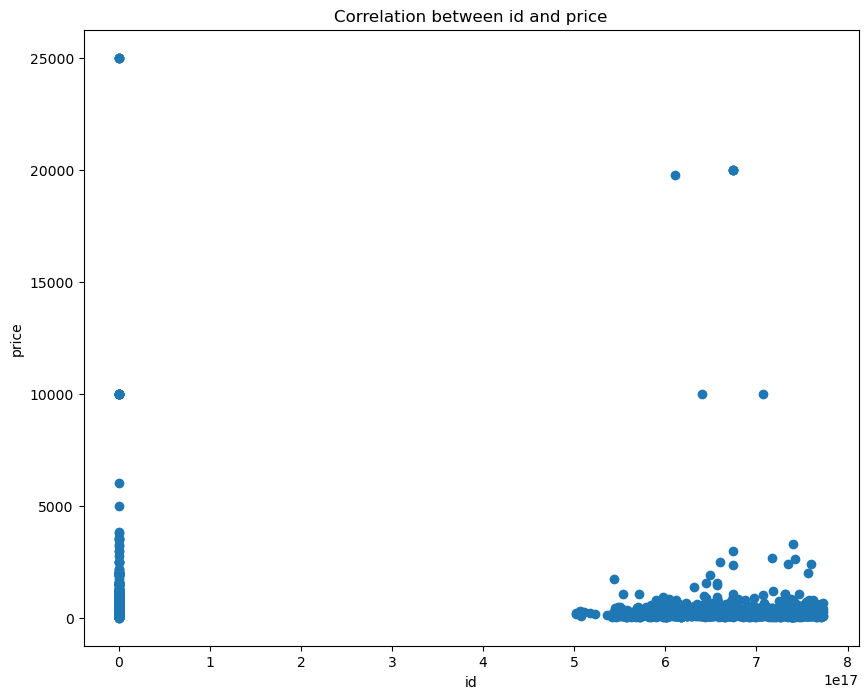

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

# adds the title
plt.title('Correlation between id and price')

# plot the data
plt.scatter(airbnb_concat['id'], airbnb_concat['price'])

# Labelling axes
plt.xlabel('id')
plt.ylabel('price')
plt.show()

In [47]:
#from the graph we see that the datapoints are clustered towards 0 on the y axis
#create log_price column to scale data
airbnb_concat.loc[:,"log_price"] = np.log(airbnb_concat.loc[:,"price"])
airbnb_concat.head(3)

,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,reviews_per_month,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,price,has_availability,instant_bookable,amenities_variety,log_price
0,144978,216682,9,37.79233,-122.42431,1,1.0,1.0,30,365,7,54,120,0,0,0.86,1,100,89,0,1,1,1,Pacific Heights,Private room,55.0,1,0,19,4.007333
1,958,1169,1,37.77028,-122.43317,3,1.0,2.0,2,30,1,161,371,57,2,2.28,1,100,98,1,1,1,1,Western Addition,Entire home/apt,194.0,1,0,53,5.267858
2,5858,8904,2,37.74474,-122.42089,4,2.0,2.0,30,60,30,365,111,0,0,0.67,1,80,71,0,2,1,1,Bernal Heights,Entire home/apt,235.0,1,0,15,5.459586


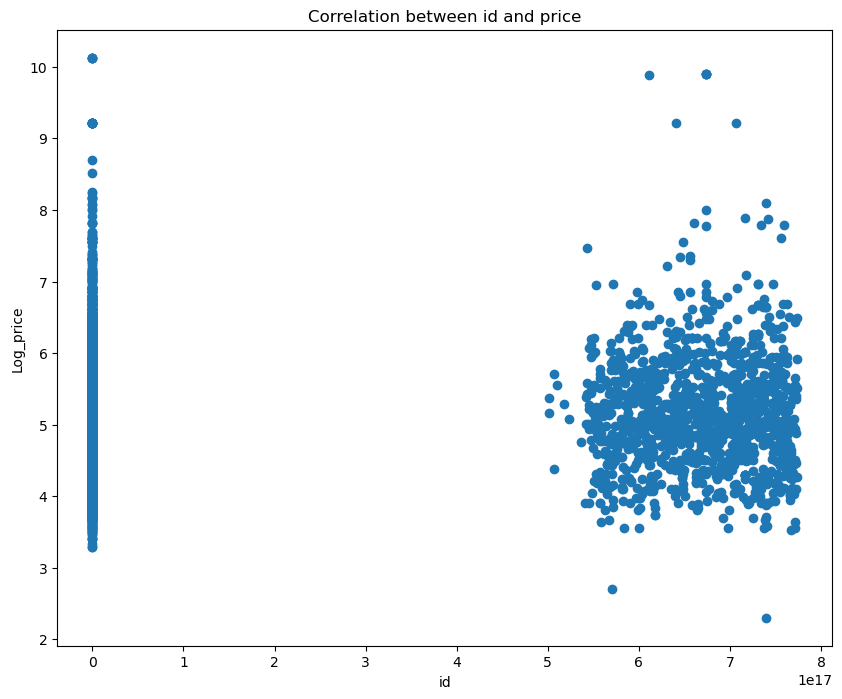

In [48]:
plt.figure(figsize=(10,8))

# adds the title
plt.title('Correlation between id and price')

# plot the data
plt.scatter(airbnb_concat['id'], airbnb_concat['log_price'])

# Labelling axes
plt.xlabel('id')
plt.ylabel('Log_price')
plt.show()

In [49]:
#we see that post log transformation, the data is scattered well along the y axis, hence log transformation is effective

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

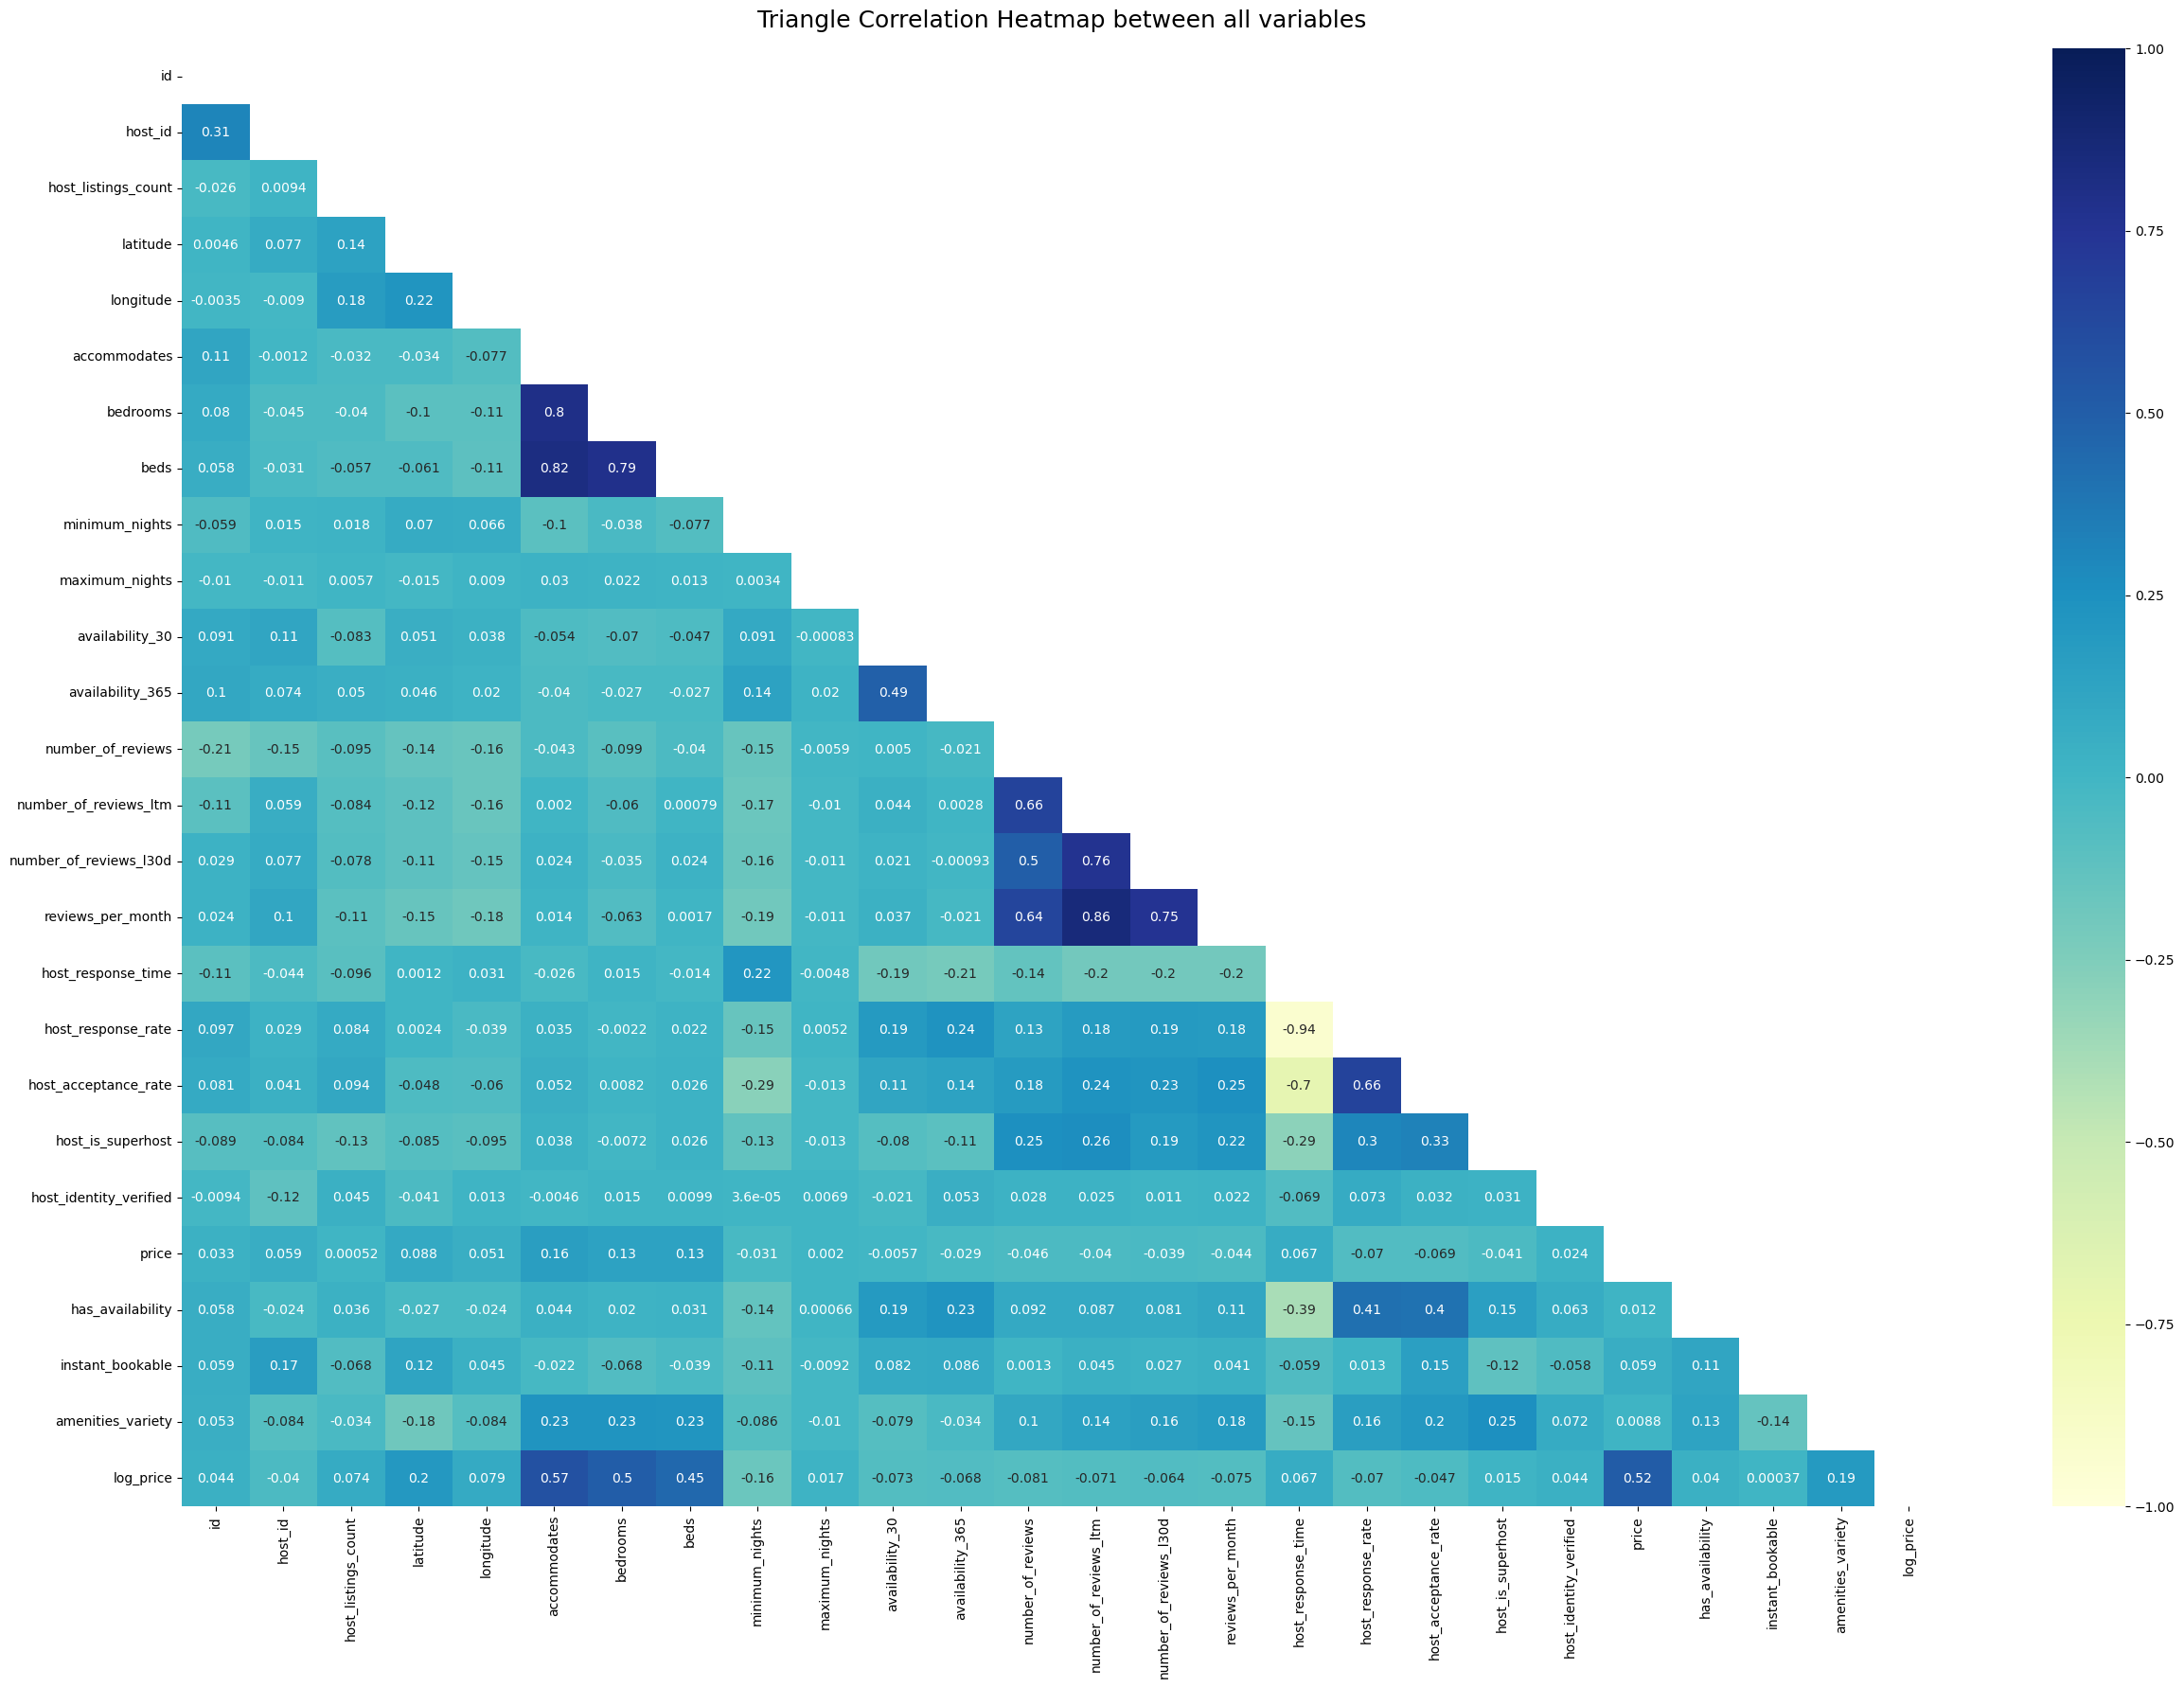

In [51]:
#find the correlation between all variables
#visual representation due to large number of variables

plt.figure(figsize=(30, 20))

# define the mask to set the values in the upper triangle to True -- makes it easier to read
mask = np.triu(np.ones_like(airbnb_concat.corr(), dtype=np.bool))

heatmap = sns.heatmap(airbnb_concat.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

heatmap.set_title('Triangle Correlation Heatmap between all variables', fontdict={'fontsize':18}, pad=16);

### Interpretation on correlation matrix

While we dropped most variables that we expected to be highly correlated (above 90%). Few variables we still find correlated (70-80%) are: 
1. Bedrooms, Beds & Accomodates 
2. All the reviews columns 
3. Host Acceptance Rate & Host Response Rate

### Exploratory Analysis for Price Prediction

We are exploring the data and base our hypothesis on the following 4 aspects/buckets:
1. Location of the property
2. Features of the property (No. of rooms/ no. of beds/ amenities etc)
3. Booking convinience (Availability/ host response and acceptance rate)
4. Reviews from customers

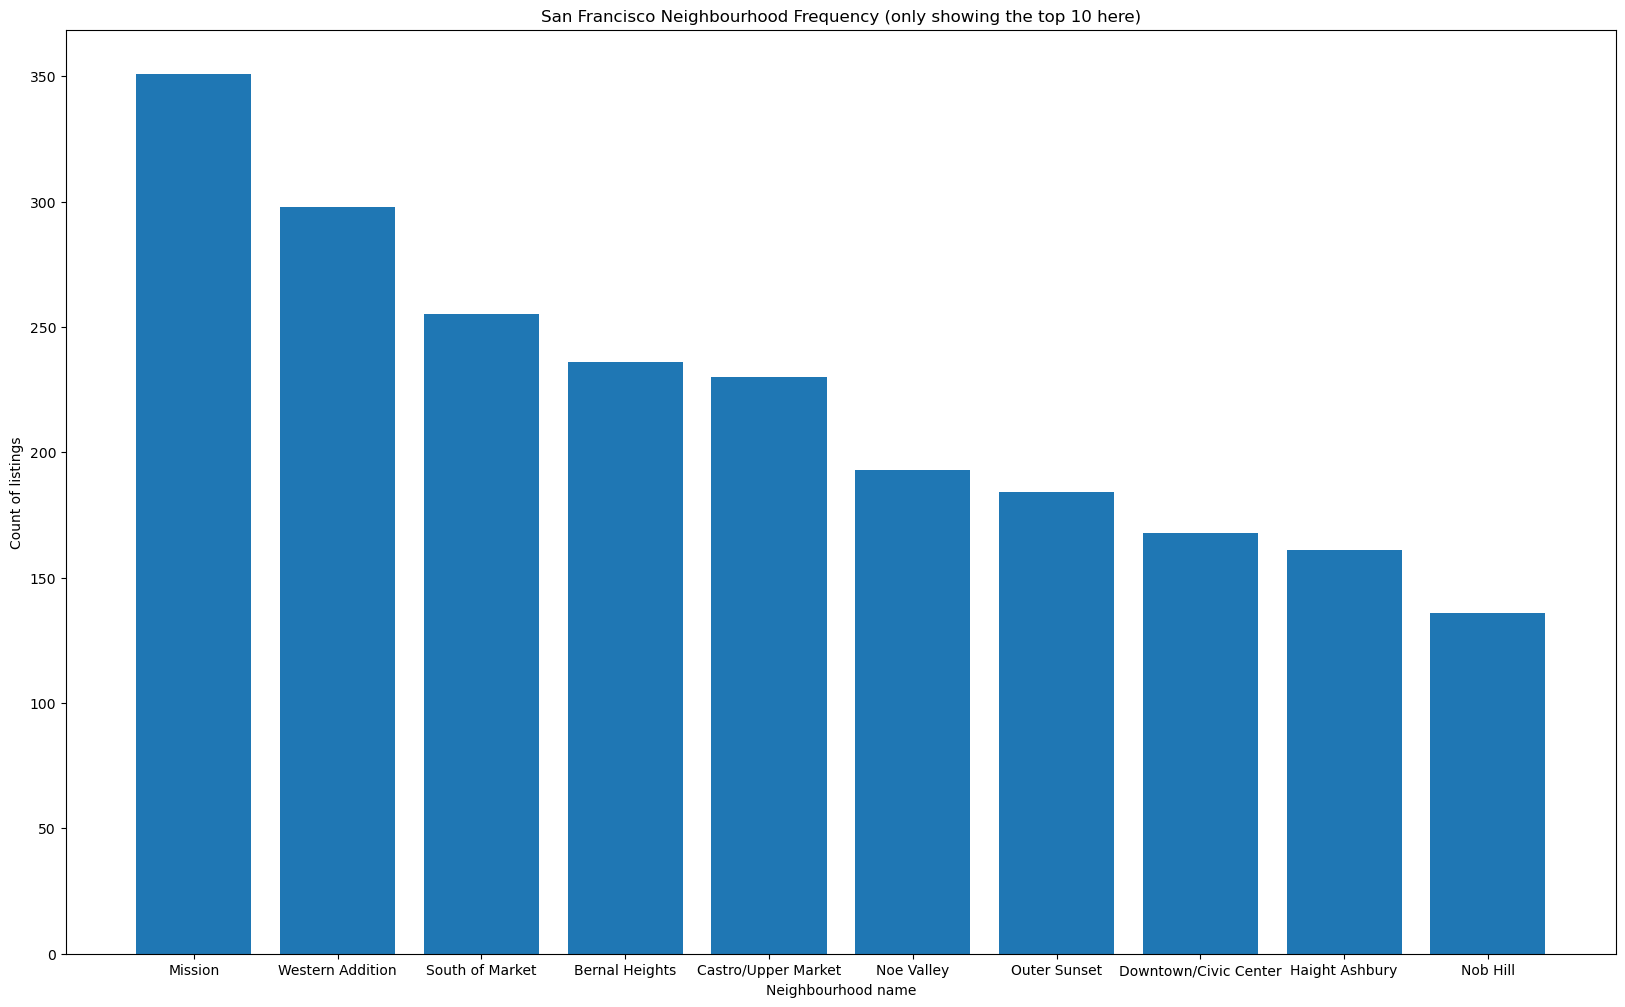

In [52]:
# Group the data by neighbourhood_cleansed and count the number of host_ids in each neighbourhood
neighbourhood_counts = airbnb_concat.groupby('neighbourhood_cleansed')['host_id'].nunique()

# Sort the neighbourhoods by the number of host_ids in descending order
neighbourhood_counts = neighbourhood_counts.sort_values(ascending=False)

# Select only the top 10 neighbourhoods
top_neighbourhoods = neighbourhood_counts[:10]

# Set the figure size larger to show x-axis text more clearly
plt.figure(figsize=(20,12))

# Plot the neighbourhood counts as a bar chart
plt.bar(top_neighbourhoods.index, top_neighbourhoods)

# Add axis labels and a title
plt.xlabel('Neighbourhood name')
plt.ylabel('Count of listings')
plt.title('San Francisco Neighbourhood Frequency (only showing the top 10 here)')

# Display the plot
plt.show()

In [53]:
# Print the neighborhood names according to the ranking
print(neighbourhood_counts.index[:])

Index(['Mission', 'Western Addition', 'South of Market', 'Bernal Heights',
       'Castro/Upper Market', 'Noe Valley', 'Outer Sunset',
       'Downtown/Civic Center', 'Haight Ashbury', 'Nob Hill', 'Inner Richmond',
       'Marina', 'Outer Richmond', 'Potrero Hill', 'Russian Hill',
       'Pacific Heights', 'Bayview', 'Inner Sunset', 'Parkside', 'Excelsior',
       'North Beach', 'Financial District', 'West of Twin Peaks',
       'Outer Mission', 'Ocean View', 'Glen Park', 'Chinatown', 'Twin Peaks',
       'Visitacion Valley', 'Lakeshore', 'Crocker Amazon', 'Presidio Heights',
       'Diamond Heights', 'Presidio', 'Seacliff', 'Golden Gate Park'],
      dtype='object', name='neighbourhood_cleansed')


In [54]:
# Print out the top 10 neighbourhoods with the most listing counts
print('Neighbourhood\tNumber of Listings')
print('--------------------------------')
for neighbourhood, count in top_neighbourhoods.items():
    print(neighbourhood, '\t\t', count)

Neighbourhood	Number of Listings
--------------------------------
Mission 		 351
Western Addition 		 298
South of Market 		 255
Bernal Heights 		 236
Castro/Upper Market 		 230
Noe Valley 		 193
Outer Sunset 		 184
Downtown/Civic Center 		 168
Haight Ashbury 		 161
Nob Hill 		 136


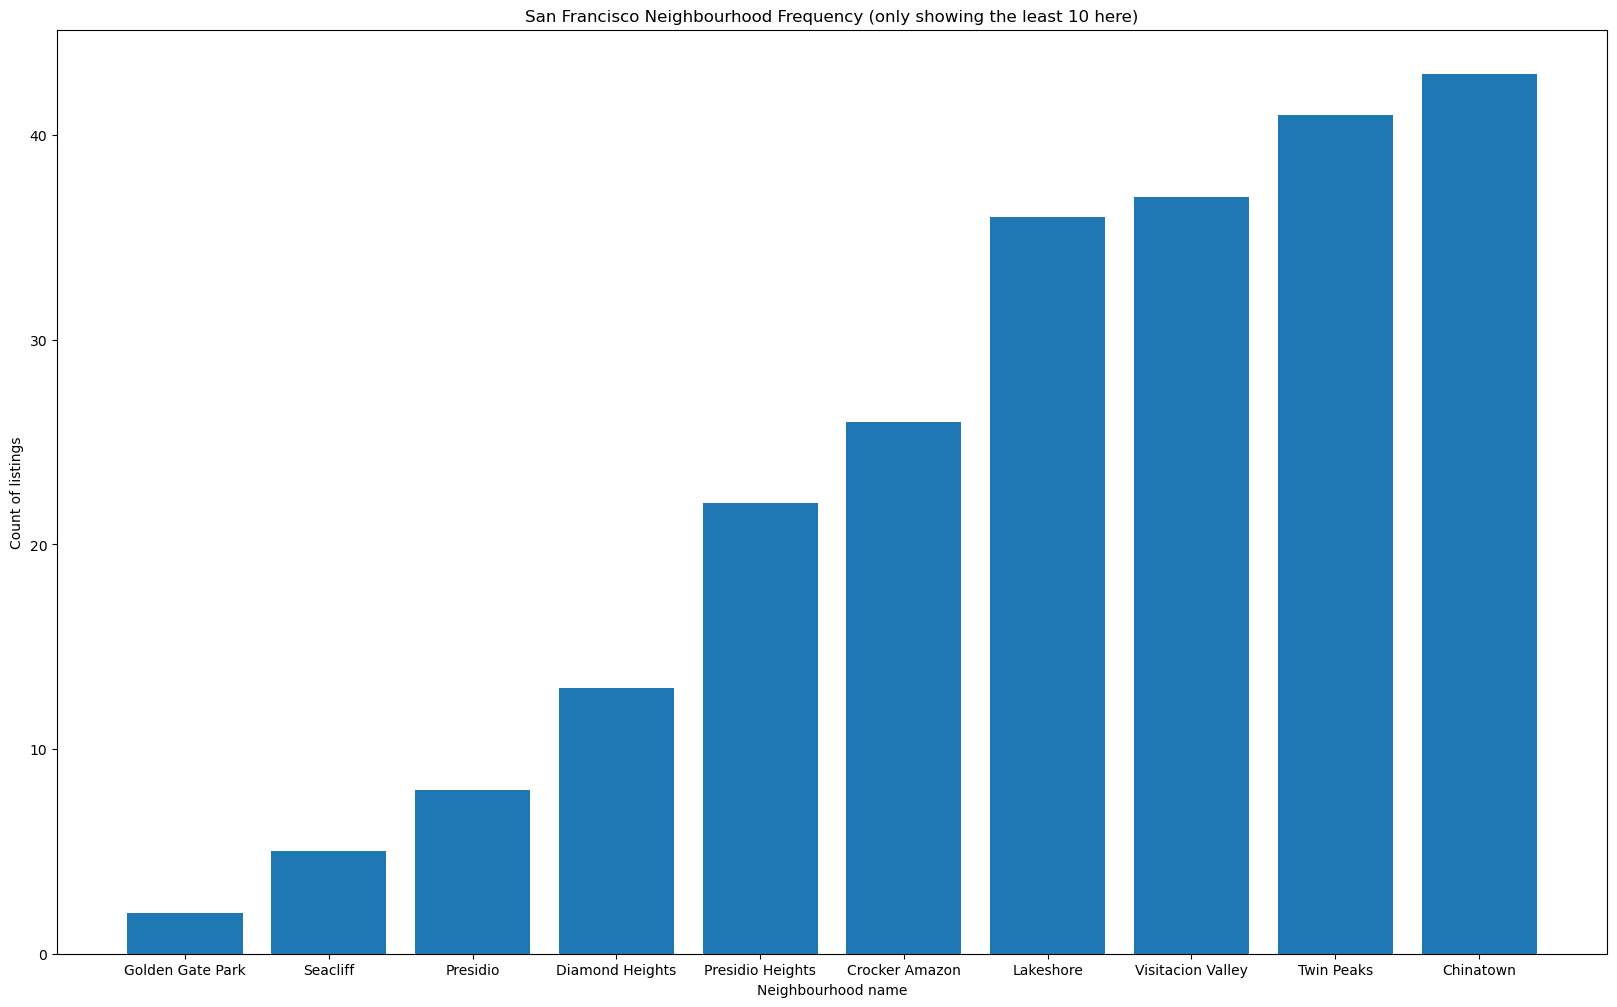

In [55]:
# Sort the neighbourhoods by the number of host_ids in ascending order
neighbourhood_counts = neighbourhood_counts.sort_values(ascending=True)

# Select only the top 10 neighbourhoods
bottom_neighbourhoods = neighbourhood_counts[:10]

# Set the figure size larger to show x-axis text more clearly
plt.figure(figsize=(20,12))

# Plot the neighbourhood counts as a bar chart
plt.bar(bottom_neighbourhoods.index, bottom_neighbourhoods)

# Add axis labels and a title
plt.xlabel('Neighbourhood name')
plt.ylabel('Count of listings')
plt.title('San Francisco Neighbourhood Frequency (only showing the least 10 here)')

# Display the plot
plt.show()

In [56]:
# Print out the bottom 10 neighbourhoods with the least listing counts
print('Neighbourhood\tNumber of Listings')
print('--------------------------------')
for neighbourhood, count in bottom_neighbourhoods.items():
    print(neighbourhood, '\t\t', count)

Neighbourhood	Number of Listings
--------------------------------
Golden Gate Park 		 2
Seacliff 		 5
Presidio 		 8
Diamond Heights 		 13
Presidio Heights 		 22
Crocker Amazon 		 26
Lakeshore 		 36
Visitacion Valley 		 37
Twin Peaks 		 41
Chinatown 		 43


### Interpretation of Location:

- The top three neighborhoods that have the highest number of Airbnb listings are Mission, Western Addition and South of Market, followed by Bernal Heights, Castro/Upper Market, etc. The difference between listing counts of different areas is not drastic, indicating that there can be possible changes in their rankings in the future.

- The bottom three neighborhoods that have the lowest number of Airbnb listings include Golden Gate Park, Seacliff, Presidio, etc. There are only a few listing in the bottom three neighborhoods currently. Depending on the demand in these areas, the price of hosts may become higher if supply is far less than demand (or lower if there isn't much demand in the region).

### Question: What are the most common features of host properties? How do property features affect price?

In [57]:
# bedrooms, beds
# room_type
# amenities_variety

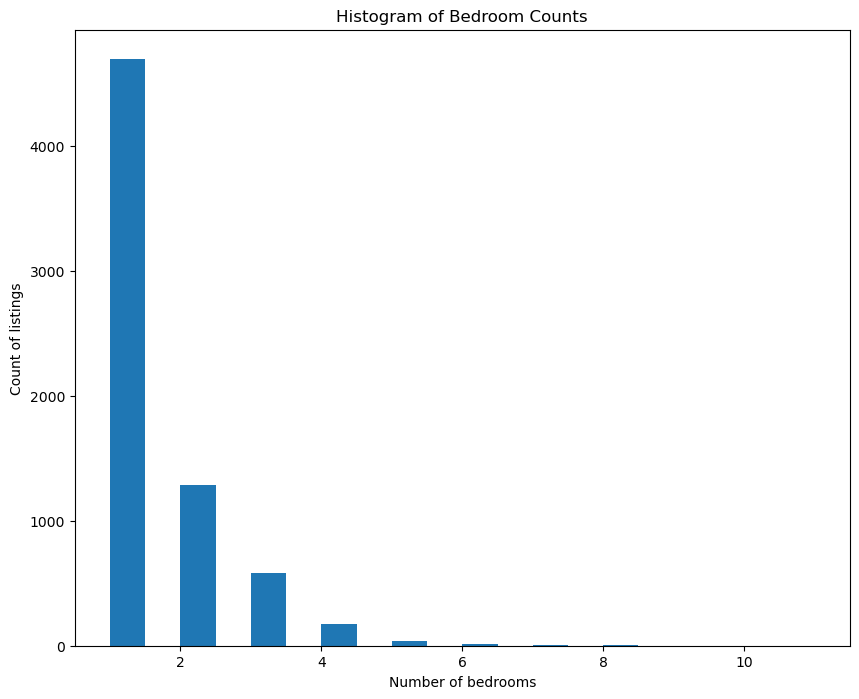

In [58]:
# Draw a histogram showing the distribution of bedroom counts
plt.figure(figsize=(10,8))
plt.hist(airbnb_concat['bedrooms'], bins = int(180/9))

# Add labels
plt.title('Histogram of Bedroom Counts')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count of listings')
plt.show()

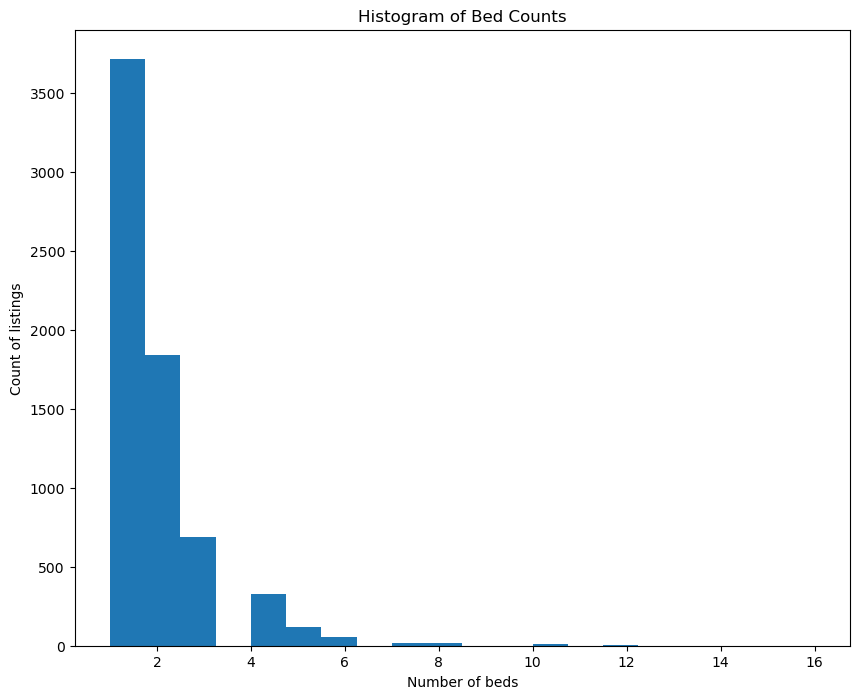

In [59]:
# Draw a histogram showing the distribution of bed counts
plt.figure(figsize=(10,8))
plt.hist(airbnb_concat['beds'], bins = int(180/9))

# Add labels
plt.title('Histogram of Bed Counts')
plt.xlabel('Number of beds')
plt.ylabel('Count of listings')
plt.show()

### Interpretation of bed/bedroom counts

- A large proportion of the listings have only 1 bedroom offered. The number of host listings drops accordingly when the number of provided bedrooms decreases, and most listings in the market offer no more than 3 or 4 bedrooms in total.

- A large proportion of the listings provide 1-3 beds, while a small number of hosts provide more than 4 beds. The trend of bed counts is similiar to that of bedroom counts, as listing counts drop accordingly with regards to decreases in bed counts. A very small proportion of the whole population offer more than 7 beds.

In [60]:
### room types

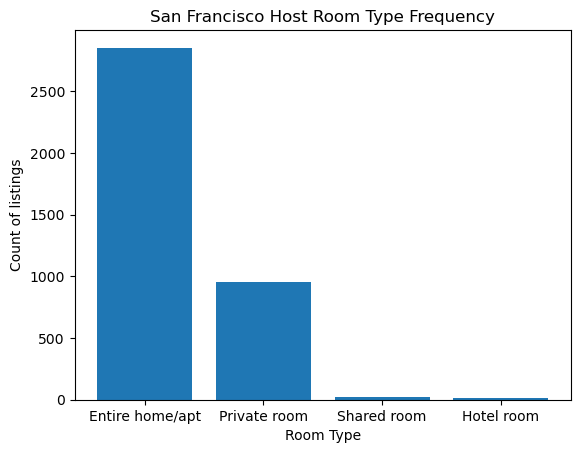

In [61]:
# Group the data by room_type and count the number of host_ids in each type
room_type_counts = airbnb_concat.groupby('room_type')['host_id'].nunique()

# Sort by the number of host_ids in descending order
room_type_counts = room_type_counts.sort_values(ascending=False)

# Plot the listing counts as a bar chart
plt.bar(room_type_counts.index, room_type_counts)

# Add axis labels and a title
plt.xlabel('Room Type')
plt.ylabel('Count of listings')
plt.title('San Francisco Host Room Type Frequency')

# Display the plot
plt.show()

In [62]:
print('Room Type\tNumber of Listings')
print('--------------------------------')
for roomtype, count in room_type_counts.items():
    print(roomtype, '\t\t', count)

Room Type	Number of Listings
--------------------------------
Entire home/apt 		 2854
Private room 		 957
Shared room 		 23
Hotel room 		 18


### Interpretation of room types

The market in San Francisco is mainly dominated by the room type of "Entire home/apt", while "Private room" type listings also account for a large proportion. There is little supply in the rest two types: "Shared room" and "Hotel room". This indicates that most guests tend to prefer rooms with a comprehensive set of facilities and more personal/privacy space. They do not prefer to share their space with others, and have a tendency to pay higher price for high-qualified services. 

In [63]:
### amenities

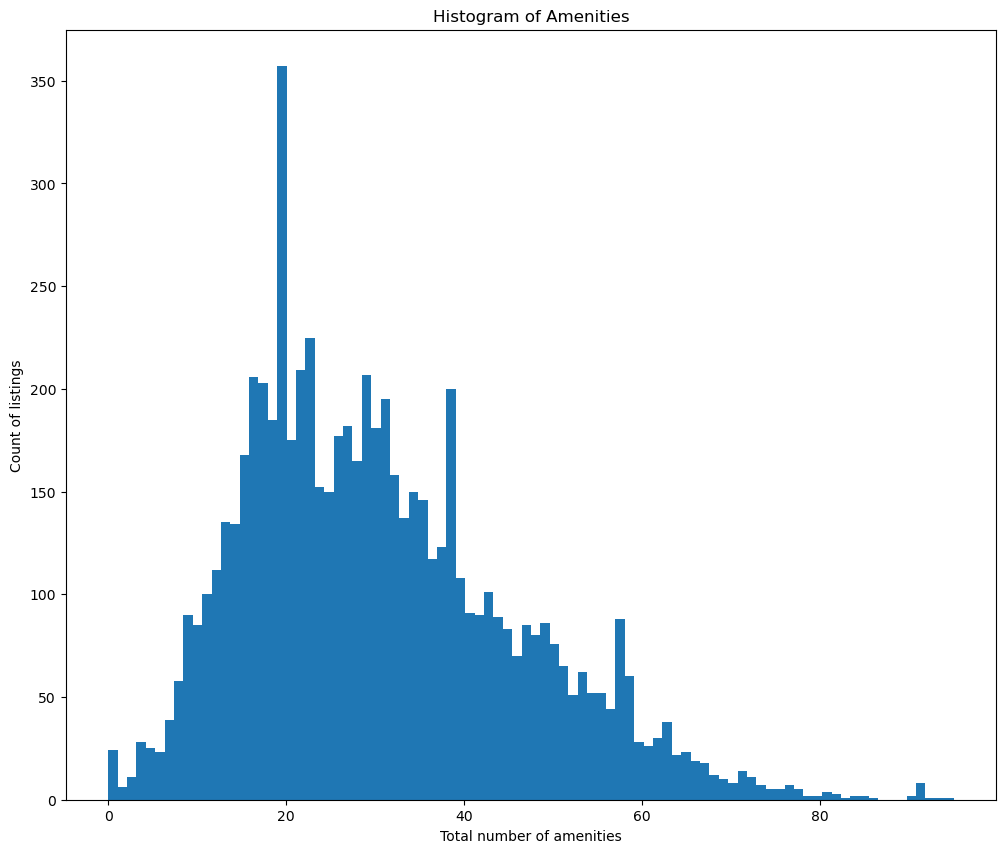

In [64]:
# Draw a histogram showing the distribution of amenities
plt.figure(figsize=(12,10))
plt.hist(airbnb_concat['amenities_variety'], bins = int(180/2))

# Add labels
plt.title('Histogram of Amenities')
plt.xlabel('Total number of amenities')
plt.ylabel('Count of listings')
plt.show()

### Interpretation of amenities

The total number of amenities in a room/apartment listing refers to how many different amenities the listing has, e.g. wifi, dryer, oven, parking and so on. The higher the number of amenities, the more aspects a guest can enjoy from living there. Naturally, people prefer more comprehensive listings with higher variety in amenities. The graph above shows that most listings have 20~40 different amenities type in the room/apt, while the entire scope ranges from as low as 0 to as high as 80+. The distribution is right-skewed.

In [65]:
import seaborn as sns

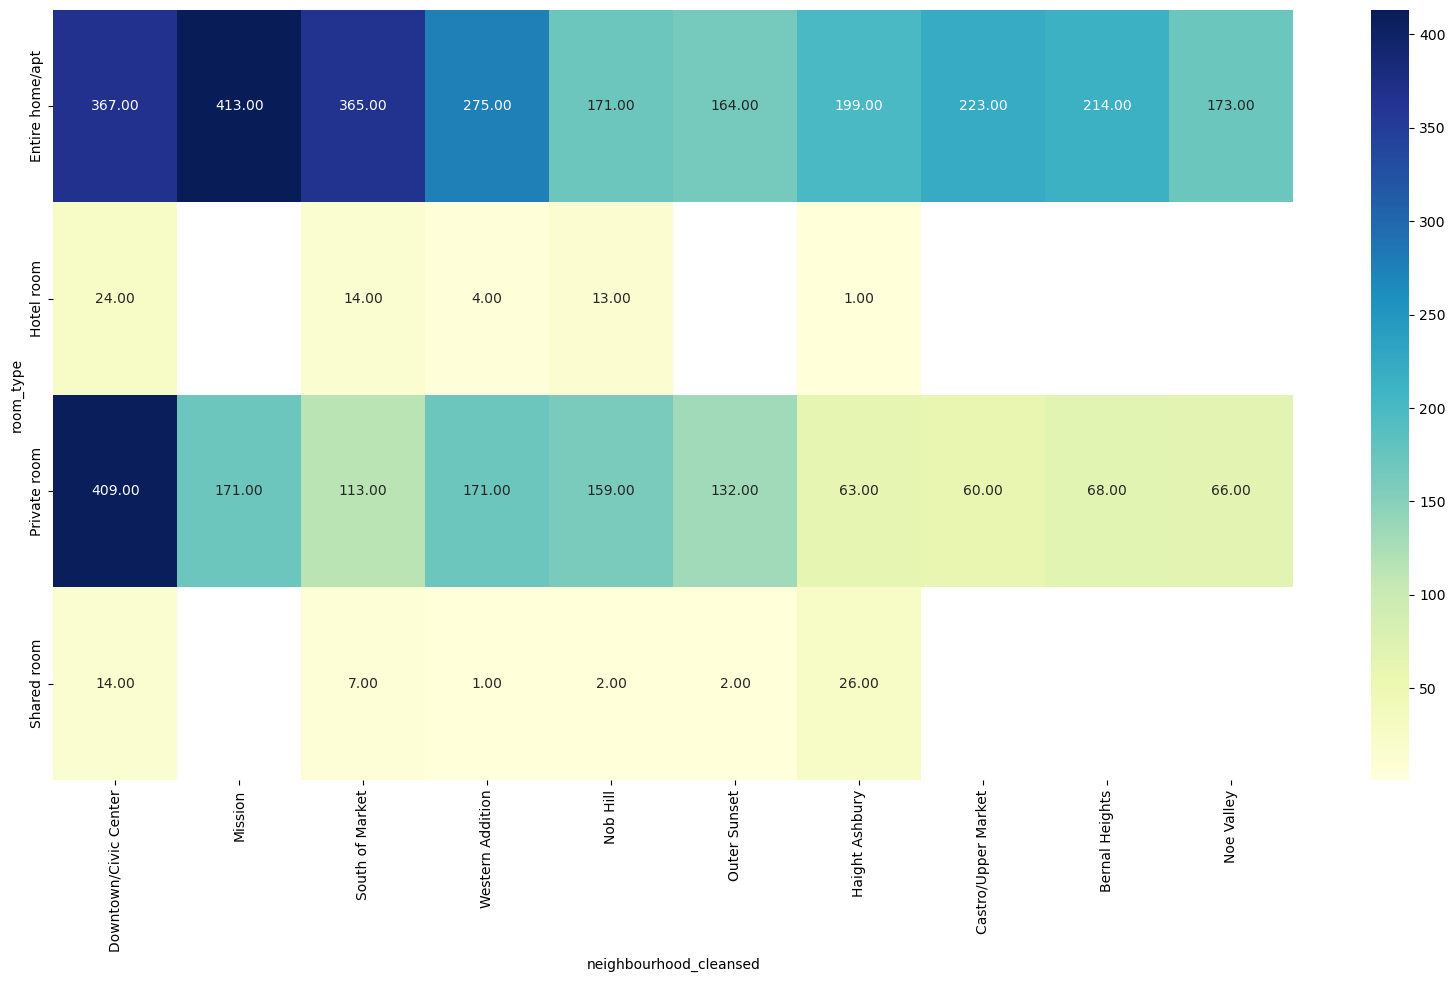

In [66]:
counts = airbnb_concat.groupby(["room_type", "neighbourhood_cleansed"])["host_id"].count().unstack()

# sum the counts for each neighborhood
neighborhood_counts = counts.sum(axis=0)

# select the top 10 neighborhoods
top_10_neighborhoods = neighborhood_counts.nlargest(10).index

# subset the counts DataFrame to only include the top 10 neighborhoods
counts_top_10 = counts[top_10_neighborhoods]

# create heatmap
plt.figure(figsize=(20,10))

sns.heatmap(counts_top_10, annot=True, fmt=".2f", cmap="YlGnBu")

# show plot
plt.show()

### Interpretation of heatmap

The horizontal axis shows the neighborhood where a listing is located, and the vertical axis shows the type of room a listing provides. Hence, the heat map shows that the most frequently seen listing include "entire home/apt" in Mission district and "private room" in Downtown/Civic Center. There are also many listings of "entire home/apt" in neighborhoods such as South of Market and Downtown/Civic Center. The graph also verifies our previous findings about room types, as in some regions there is even no listing associated with either "hotel room" or "shared room".

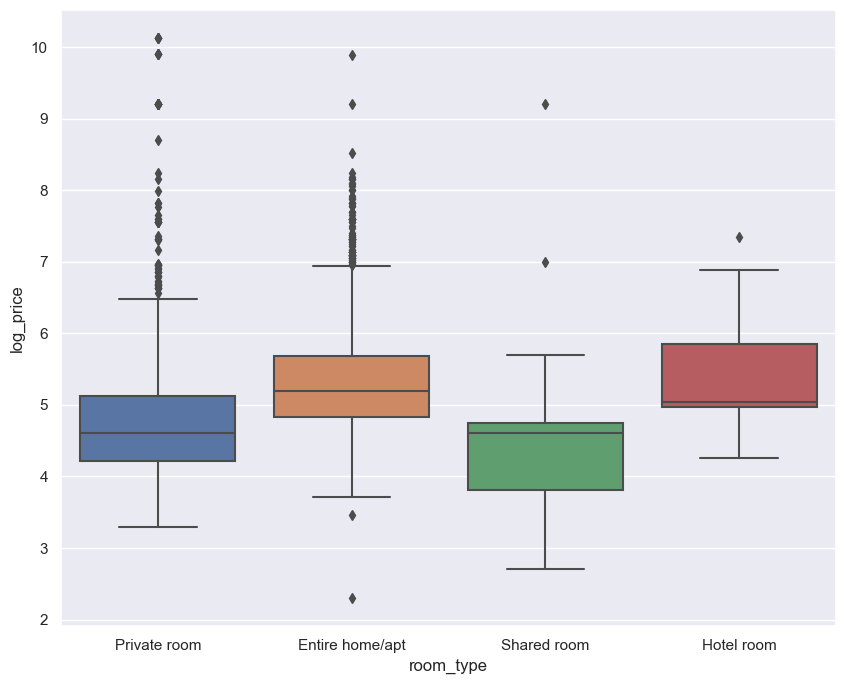

In [67]:
plt.figure(figsize=(10,8))

sns.set(style="darkgrid")
sns.boxplot( x=airbnb_concat['room_type'], y=airbnb_concat["log_price"] )

plt.show()

### Interpretation on room types vs. price

The mean price of "entire home/apt" is the highest, followed by "hotel room", while the mean price of "shared room" and "private room" stays close to each other. However, the prices of "shared room" and "hotel room" are both skewed towards one side of the distribution. It is also noted that the price range of "shared room" is overall on a lower level of that of "hotel room", indicating a similiar trend when determining listing prices accordingly. 

Moreover, both "private room" and "entire home/apt" listings have multimple outliers in prices, showing that room type serves as a baseline for price decision, while other factors (as are discussed in other parts of EDA) can impact the range of prices to a large extent.  

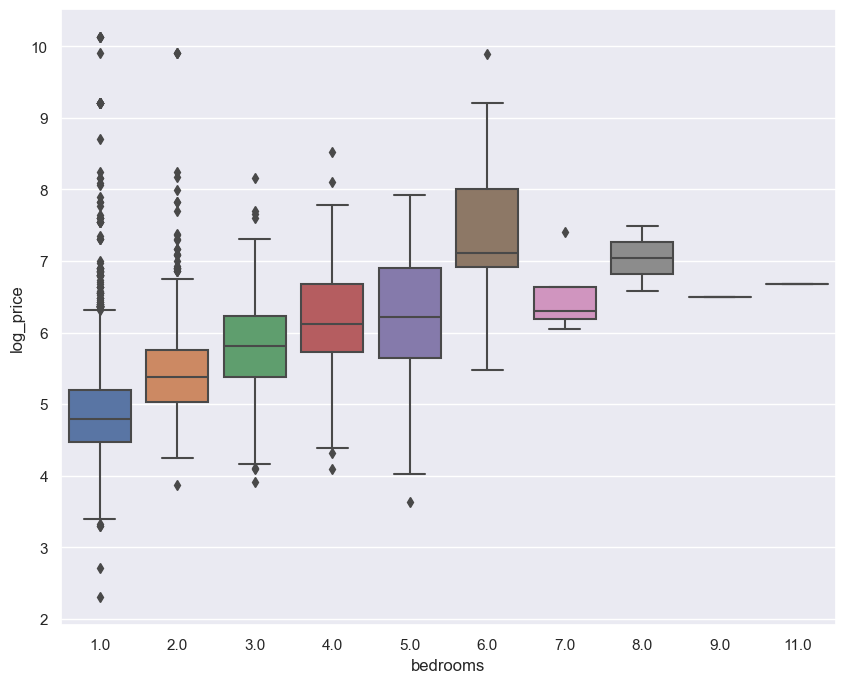

In [68]:
plt.figure(figsize=(10,8))

sns.set(style="darkgrid")
sns.boxplot( x=airbnb_concat['bedrooms'], y=airbnb_concat["log_price"] )

plt.show()

### Interpretation on bedroom counts vs. price

From the boxplot, listings with 6 or 8 bedrooms tend to have the highest price. When bedroom count is less then 6, the price of listing increases as the number of bedrooms increases, which is within our expectation that more rooms leads to higher prices. It is surprising though that teh price of listings with 7 bedrooms show a significant lower level of price than 6-or-8-bedroom listings. 

### Question: Does the number of reviews affect price a lot?

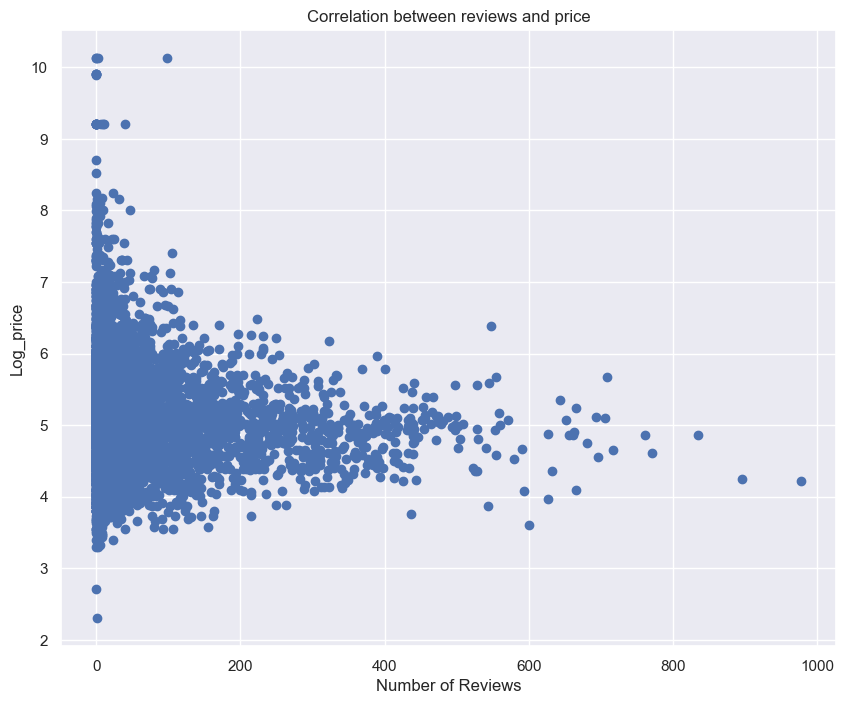

In [69]:
plt.figure(figsize=(10,8))

# adds the title
plt.title('Correlation between reviews and price')

# plot the data
plt.scatter(airbnb_concat['number_of_reviews'], airbnb_concat['log_price'])

# fits the best fitting line to the data
# plt.plot(np.unique(airbnb_concat['number_of_reviews']),np.poly1d(np.polyfit(airbnb_concat['number_of_reviews'], airbnb_concat['price'], 1))(np.unique(airbnb_concat['number_of_reviews'])), color='red')

# Labelling axes
plt.xlabel('Number of Reviews')
plt.ylabel('Log_price')
plt.show()

### Interpretation on review counts vs. price

From the plot, the relationship between the number of reviews and listing price shows an interesting trend. As the number of reviews increases, the RANGE of listing price decreases. The price stretches towards the two extreme ends, i.e. higher or lower level, when the host receives less reivews from guests. Such trend is most obvious when the number of reviews is between 0 and 200, as well as between 200 and 400. When there is minimum review count of a host, the listings obtain either an extremely high or low price, indicating the instability of prices when guests know very little about the host. 

### Question: Can host demand a higher price based on better booking availability?

In [70]:
airbnb_concat.head(5)

,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,reviews_per_month,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,price,has_availability,instant_bookable,amenities_variety,log_price
0,144978,216682,9,37.79233,-122.42431,1,1.0,1.0,30,365,7,54,120,0,0,0.86,1,100,89,0,1,1,1,Pacific Heights,Private room,55.0,1,0,19,4.007333
1,958,1169,1,37.77028,-122.43317,3,1.0,2.0,2,30,1,161,371,57,2,2.28,1,100,98,1,1,1,1,Western Addition,Entire home/apt,194.0,1,0,53,5.267858
2,5858,8904,2,37.74474,-122.42089,4,2.0,2.0,30,60,30,365,111,0,0,0.67,1,80,71,0,2,1,1,Bernal Heights,Entire home/apt,235.0,1,0,15,5.459586
3,8142,21994,12,37.76555,-122.45213,1,1.0,1.0,32,90,30,365,9,1,0,0.09,1,100,74,0,1,1,1,Haight Ashbury,Private room,56.0,1,0,20,4.025352
4,8339,24215,2,37.77564,-122.43642,4,2.0,2.0,9,91,29,364,28,0,0,0.17,1,100,0,0,1,1,1,Western Addition,Entire home/apt,575.0,1,0,34,6.354370


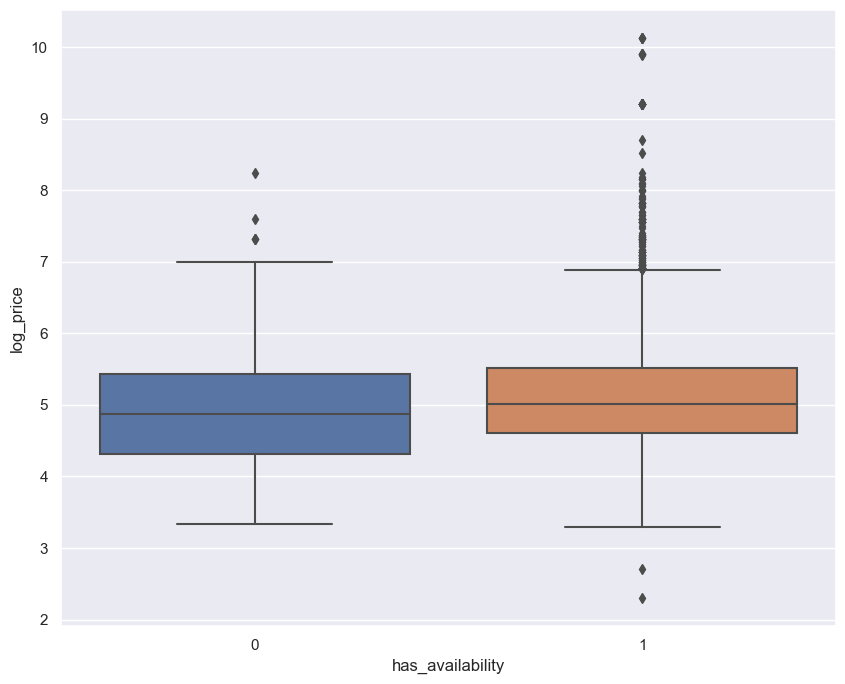

In [71]:
#Instant Availability

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")
sns.boxplot( x=airbnb_concat['has_availability'], y=airbnb_concat["log_price"] )

plt.show()

### Interpretation on has_availability counts vs. price

From the plot we can see that based on the "has_availability" field being populated, 1(Yes), the propoerty has median prices are slightly higher than the group with 0 (No). This aligns with our commong understanding, as having availability will allow customers to book properties instantly and a higher prices can be demanded. The range of prices is relatively smaller for has_availability 1(Yes), but also has a higher number of outliers as compared to has_availability = 0. This means that hosts with instant availability may demand a price far higher than the median level, which will require inspecting other characteristics of the room/apartment being offered.

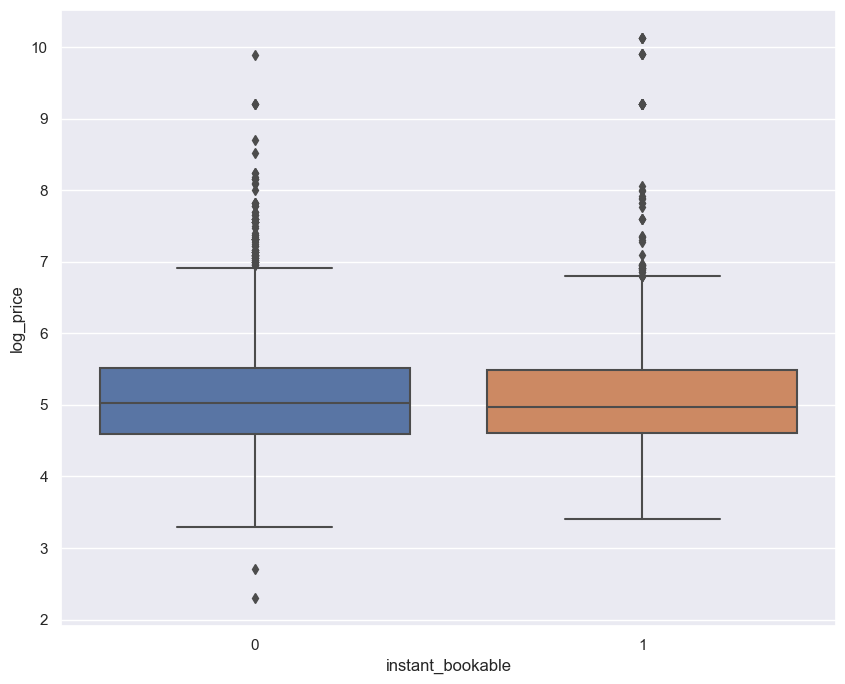

In [72]:
#Instant Bookable

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")
sns.boxplot( x=airbnb_concat['instant_bookable'], y=airbnb_concat["log_price"] )

plt.show()

### Interpretation on instant_bookable vs. price

From the plot we can see that "instant_bookable" field does not show a strong/significant impact on listing prices by itself alone. The median price as well as price ranges of the two groups are similar to each other. Also, the number of outliers seems to be similar to each other, while hosts without the feature of "instant_bookable" tend to have more outliers on the lower end of price range, indicating that a few hosts may not be able to charge even the median price given that they are not instant bookable.

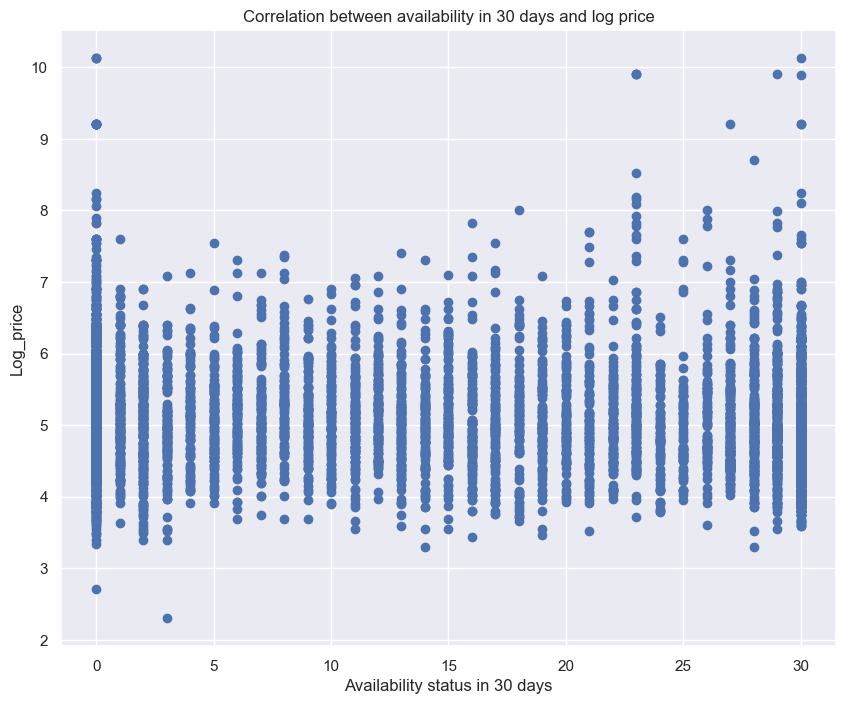

In [73]:
#Availability in 30 days

plt.figure(figsize=(10,8))

# adds the title
plt.title('Correlation between availability in 30 days and log price')

# plot the data
plt.scatter(airbnb_concat['availability_30'], airbnb_concat['log_price'])

# fits the best fitting line to the data
# plt.plot(np.unique(airbnb_concat['number_of_reviews']),np.poly1d(np.polyfit(airbnb_concat['number_of_reviews'], airbnb_concat['price'], 1))(np.unique(airbnb_concat['number_of_reviews'])), color='red')

# Labelling axes
plt.xlabel('Availability status in 30 days')
plt.ylabel('Log_price')
plt.show()

### Interpretation on availability_30 vs. price

From the plot we can see that the prices mostly range from approximately 3.5~8 on a log scale for varied days availability within 30 days. Hence, we conclude that the number of days available within a month doesn't matter much to customers while booking a property. Price prediction of listings should not mainly focus on their availability within 30 days, rather, this aspect can be treated as an additional layer to add on other aspects when determing price, such as room type and number of bedrooms. 

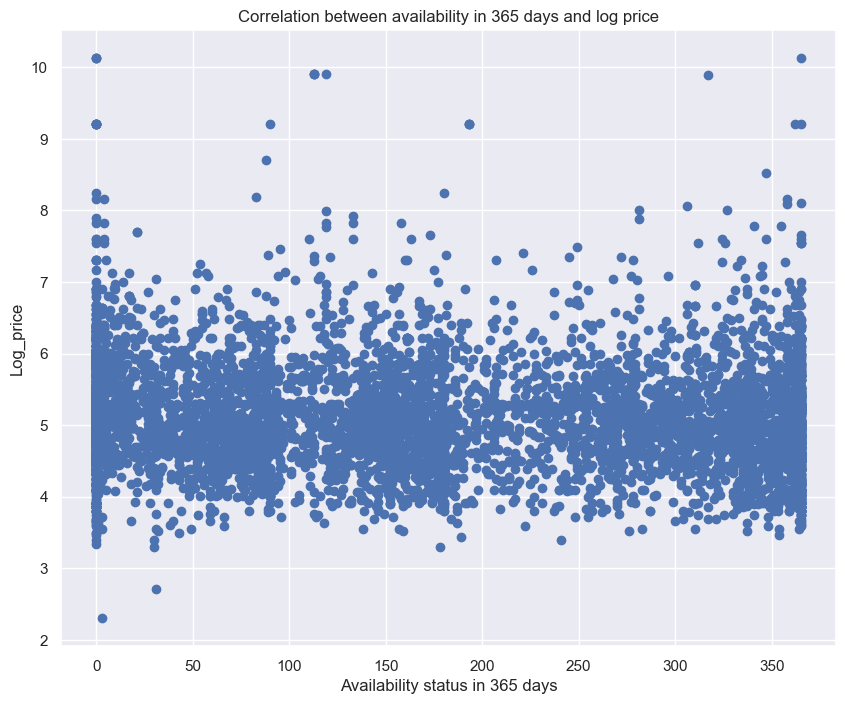

In [74]:
#Availability in 365 days

plt.figure(figsize=(10,8))

# adds the title
plt.title('Correlation between availability in 365 days and log price')

# plot the data
plt.scatter(airbnb_concat['availability_365'], airbnb_concat['log_price'])

# fits the best fitting line to the data
# plt.plot(np.unique(airbnb_concat['number_of_reviews']),np.poly1d(np.polyfit(airbnb_concat['number_of_reviews'], airbnb_concat['price'], 1))(np.unique(airbnb_concat['number_of_reviews'])), color='red')

# Labelling axes
plt.xlabel('Availability status in 365 days')
plt.ylabel('Log_price')
plt.show()

### Interpretation on price vs availability_365

From the plot we can see that the price mostly range from approximately 3.5~7 on a log scale for varied days availability within a year. Note that the lower end of prices starts at 3.5 where the availability is 0. Hence, we can conclude that the number of days available within a year, just like month, doesn't matter much to customers while booking a property and hence the price cannot be varied much based on it. Meanwhile, the two extreme sides of the availability status field, i.e. 0 and 365, seem to have higher variance than the middle field, which means that hosts belonging to the lowest/highest end of availability have a price that is less stable. 

### Question: How do host credentials impact price?

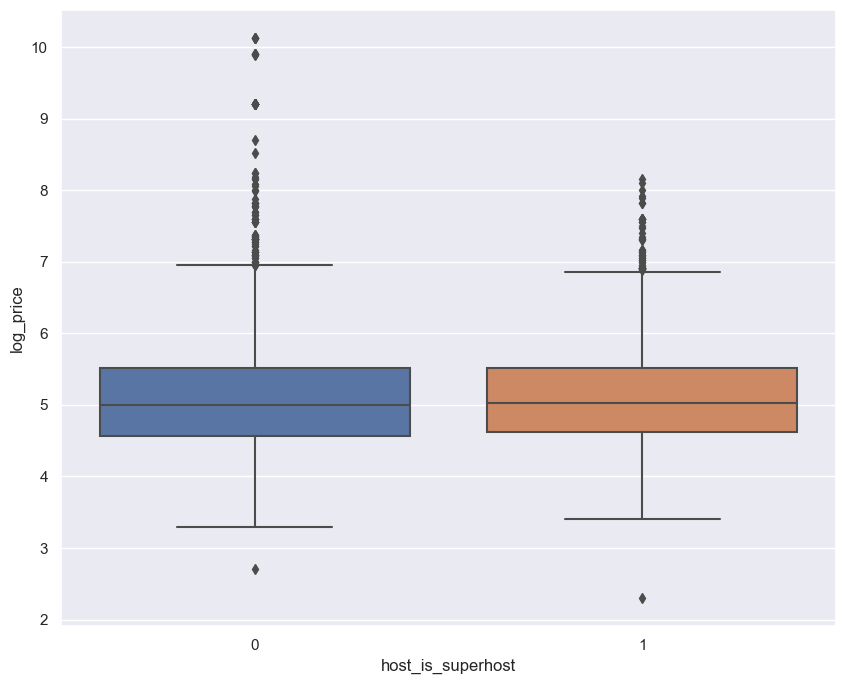

In [75]:
#is host superhost

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")
sns.boxplot(x=airbnb_concat['host_is_superhost'], y=airbnb_concat["log_price"] )

plt.show()

### Interpretation on price vs host_is_superhost

From the plot we can see that the two median prices are very close to each other whenever the host of the property is tagged as a superhost of not. The median log_price of superhosts is slightly higher than the one of non-super hosts, which does not show a significant influence. This is not expected as we would think that the impression of a host matters to the customers when booking a property. However, the price of non-super hosts tends to have more outliers in higher levels, indicating that being a super host is not strong indicator of charging a higher price. 

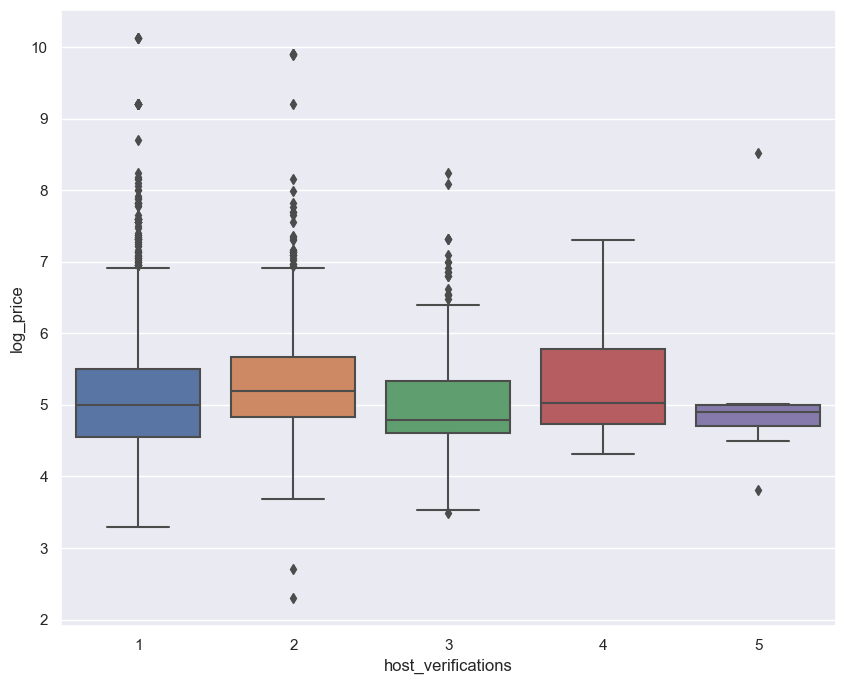

In [76]:
#host verifications

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")
sns.boxplot( x=airbnb_concat['host_verifications'], y=airbnb_concat["log_price"] )

plt.show()

### Interpretation on host_verifications

We expect the price will tend to increase as the number of host verifications increase. However, this is not the case as given in the above plot. Though the median price of each group varies from other groups based on host_verifications field, there is no clear indication of the trend here. Moreover, host_verifications = 1,2,3 have more outliers than others, with host_verifications = 1 having the most number of outliers towards higher price levels. Also, note that host_verifications = 5 has the smallest range of price among all groups of hosts, indicating that there is little flexibility in determing their prices and the corresponding values are mostly fixed around the median. 

### Question: Can host demand a higher price based on better response performance, i.e. higher response time?

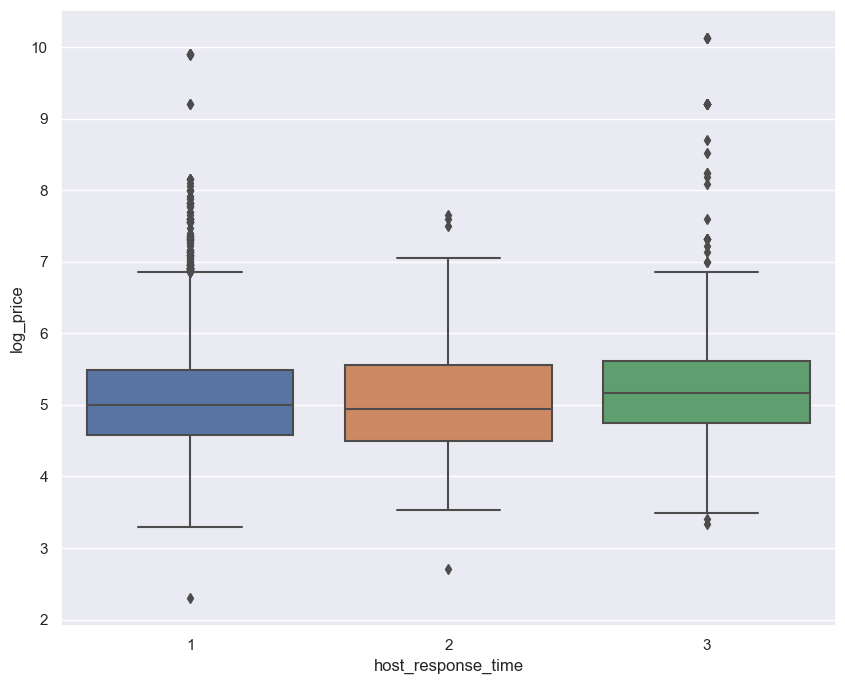

In [77]:
#Host Response Time

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")
sns.boxplot( x=airbnb_concat['host_response_time'], y=airbnb_concat["log_price"] )

plt.show()

### Interpretation on host_response_time vs. price

In [78]:
#within a few hours & within an hour -> quick response -> 1
#within a day & a few days or more -> late response -> 2
#NAN -> no response -> 3

From the plot we can see that the median price is slightly higher for host_response_time = 3 (where we see no responses) as compared to host_response_time = 1,2 (quick & late response). This is against what we would have anticipated, as a faster response from the host would be a positive feature and the host should be able to demand higher prices. Here, both quick-response and no-response hosts have outliers towards higher prices, while the late-response group seem to perform the worse with the lowest median price as well as fewest outliers with high prices. This indicates that late response is even worse than not having a response at all. 

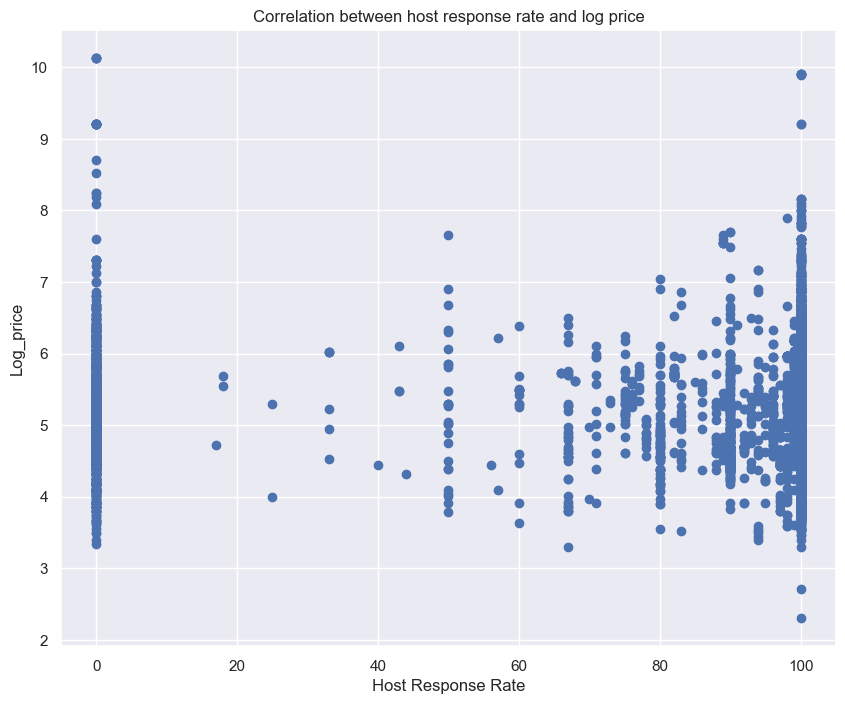

In [79]:
#Host Response Rate

plt.figure(figsize=(10,8))

# adds the title
plt.title('Correlation between host response rate and log price')

# plot the data
plt.scatter(airbnb_concat['host_response_rate'], airbnb_concat['log_price'])

# fits the best fitting line to the data
# plt.plot(np.unique(airbnb_concat['number_of_reviews']),np.poly1d(np.polyfit(airbnb_concat['number_of_reviews'], airbnb_concat['price'], 1))(np.unique(airbnb_concat['number_of_reviews'])), color='red')

# Labelling axes
plt.xlabel('Host Response Rate')
plt.ylabel('Log_price')
plt.show()

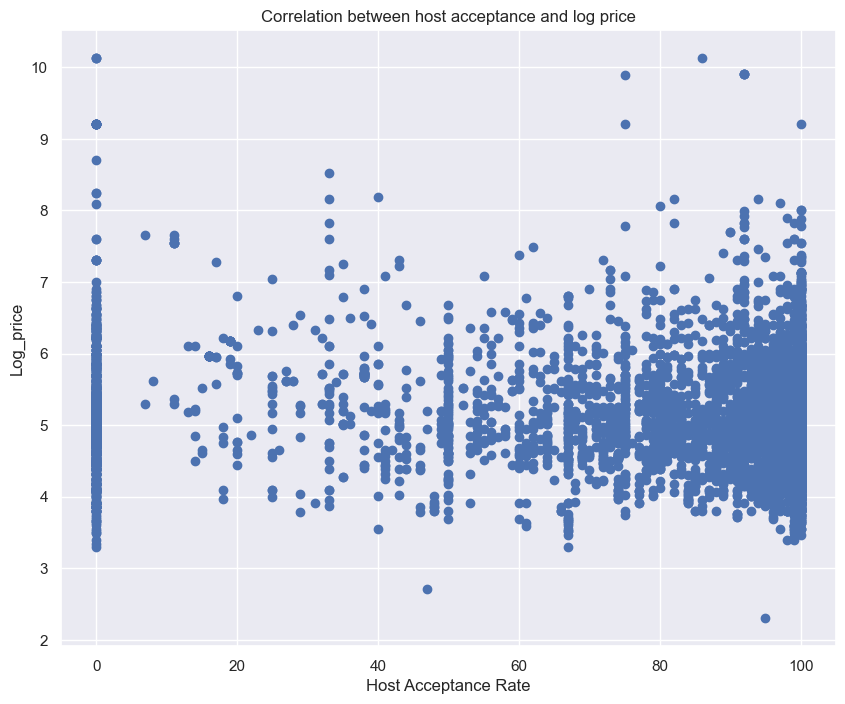

In [80]:
#Host Acceptance Rate

plt.figure(figsize=(10,8))

# adds the title
plt.title('Correlation between host acceptance and log price')

# plot the data
plt.scatter(airbnb_concat['host_acceptance_rate'], airbnb_concat['log_price'])

# fits the best fitting line to the data
# plt.plot(np.unique(airbnb_concat['number_of_reviews']),np.poly1d(np.polyfit(airbnb_concat['number_of_reviews'], airbnb_concat['price'], 1))(np.unique(airbnb_concat['number_of_reviews'])), color='red')

# Labelling axes
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Log_price')
plt.show()

### Interpretation on host_response_rate and host_acceptance rate vs. price

From the plot we can see that hosts with the lowest and highest response rate are likely to have more variation in their prices, as compared to the middle field. It is surprising that low-response-rate hosts can also charge high prices as high as high-respons-rate hosts. Such trend is the same for host_acceptance_rate field. These findings verify what we've found wrt host_response_time feature in the previous part, where hosts with no response to guests'queries tend to have higher price than those who have some (but not too much) response. 

Therefore, for airnbn hosts, two ways to have extremely high prices include either having very good response/acceptance performance or giving no response/acceptance at all. For hosts who stick to the median level of prices and can be satisfied with a relatively stable value, it is okay to have lower/higher response/acceptance performance. Further investigation may need to be applied to verify this conclusion. 

### Part I: Airbnb Listing Price Prediction

### Data Preparation

In [81]:
#convert categorical variables into factors
airbnb_concat['room_type_cat'] = pd.factorize(airbnb_concat['room_type'])[0]
airbnb_concat['neighbourhood_cleansed_cat'] = pd.factorize(airbnb_concat['neighbourhood_cleansed'])[0]

In [82]:
airbnb_concat['neighbourhood_cleansed'].dtype

dtype('O')

In [83]:
airbnb_concat.replace([np.inf, -np.inf], np.nan, inplace=True)
airbnb_concat = airbnb_concat.dropna()

In [84]:
len(airbnb_concat)

6786

In [85]:
airbnb_concat.head(5)

,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,reviews_per_month,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,price,has_availability,instant_bookable,amenities_variety,log_price,room_type_cat,neighbourhood_cleansed_cat
0,144978,216682,9,37.79233,-122.42431,1,1.0,1.0,30,365,7,54,120,0,0,0.86,1,100,89,0,1,1,1,Pacific Heights,Private room,55.0,1,0,19,4.007333,0,0
1,958,1169,1,37.77028,-122.43317,3,1.0,2.0,2,30,1,161,371,57,2,2.28,1,100,98,1,1,1,1,Western Addition,Entire home/apt,194.0,1,0,53,5.267858,1,1
2,5858,8904,2,37.74474,-122.42089,4,2.0,2.0,30,60,30,365,111,0,0,0.67,1,80,71,0,2,1,1,Bernal Heights,Entire home/apt,235.0,1,0,15,5.459586,1,2
3,8142,21994,12,37.76555,-122.45213,1,1.0,1.0,32,90,30,365,9,1,0,0.09,1,100,74,0,1,1,1,Haight Ashbury,Private room,56.0,1,0,20,4.025352,0,3
4,8339,24215,2,37.77564,-122.43642,4,2.0,2.0,9,91,29,364,28,0,0,0.17,1,100,0,0,1,1,1,Western Addition,Entire home/apt,575.0,1,0,34,6.354370,1,1


In [86]:
#split airbnb_concat dataset into airbnb_x(set of all covariates) and airbnb_y(outcome variable - price)
#drop ids and host ids before running Linear regressioin model
#also ignore longitude and latitude columns, because their values should not be simply interpreted as numerics

airbnb_x = airbnb_concat.drop(columns=['id','host_id','price','log_price','neighbourhood_cleansed','room_type','latitude','longitude'])
#airbnb_x = airbnb_x.drop(columns=['room_type_cat','neighbourhood_cleansed_cat'])

airbnb_y = airbnb_concat['price']
# airbnb_log_y = airbnb_concat['log_price']

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Creat the training and test set with a ratio of 8:2
X = airbnb_x
y = airbnb_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Scale data for both training and test sets
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Preliminary Trial: Multiple Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [89]:
#Fit linear regression algorithm
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [90]:
#Model outcome and performance
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq*100:.2f}%") ##R^2 score is extremly low
print(f"intercept: {model.intercept_}")

coefficient of determination: 5.35%
intercept: -105.564323493497


In [91]:
pd.DataFrame(data={'Attribute': X_train.columns,'Coefficient': model.coef_}) ##view all coefficients

,Attribute,Coefficient
0,host_listings_count,0.033765
1,accommodates,89.102117
2,bedrooms,7.508420
3,beds,6.486933
4,minimum_nights,-0.744463
5,maximum_nights,-0.000306
6,availability_30,2.121620
7,availability_365,-0.221812
8,number_of_reviews,-0.158288
9,number_of_reviews_ltm,1.693104


In [92]:
# Check the predictions against the actual values
train_pred = model.predict(X_train)
print("Training RMSE is: ",round(mean_squared_error(y_train,train_pred),3)) ##MSE on training set
print("IS R-squared is: ",round(r2_score(y_train,train_pred),3)) ##IS r-squared

test_pred = model.predict(X_test)
print("\nValidation RMSE is: ",round(mean_squared_error(y_test,test_pred),3)) ##MSE on test set
print("OOS R-squared is: ",round(r2_score(y_test,test_pred),3)) ##OOS r-squared is negative value

Training RMSE is:  918355.66
IS R-squared is:  0.054

Validation RMSE is:  586518.887
OOS R-squared is:  -0.003


In [93]:
# Linear regression model performs even worse than the null model, which predicts price as the mean value.

### Interpretations on Linear Regression

In linear regression, some variables has significantly large influence on listing price, including: accommodates (number of guests accepted), host_identity_verified, has_availability (whether there is booking availability) and instant_bookable (whether it is instantly bookable). Positive values here indicate that the variables have a positive effect on price changes. Among negative coefficients, some have large coefficient values, such as "reviews_per_month" and "host_is_superhost". Considering that linear regression model has bad in-sample and out-of-sample performance, the value and direction of the coefficients here may not be reliable.

### Use log_price instead of price

In [94]:
#Creat the training and test set with a ratio of 8:2
X = airbnb_x
y_log = airbnb_concat['log_price']

#replace inf and -inf with zero
# y.replace(np.nan, 0, inplace=True)
#y.replace([np.inf, -np.inf], np.nan, inplace=True)
#y = y.dropna()

#split dataset
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.20, random_state=42)

In [95]:
np.isnan(y_log).any()

False

In [96]:
np.isinf(y_log).any()

False

In [97]:
#Fit linear regression algorithm
model = LinearRegression()
model.fit(X_train, y_log_train)

LinearRegression()

In [98]:
#Model outcome and performance
r_sq = model.score(X_train, y_log_train)
print(f"coefficient of determination: {r_sq*100:.2f}%") ##R^2 score is extremly low
print(f"intercept: {model.intercept_}")

coefficient of determination: 40.77%
intercept: 4.2971843759982935


In [99]:
# Check the predictions against the actual values
train_pred = model.predict(X_train)
print("Training RMSE is: ",round(mean_squared_error(y_log_train,train_pred),3)) ##MSE on training set
print("IS R-squared is: ",round(r2_score(y_log_train,train_pred),5)) ##IS r-squared

test_pred = model.predict(X_test)
print("\nValidation RMSE is: ",round(mean_squared_error(y_log_test,test_pred),3)) ##MSE on test set
print("OOS R-squared is: ",round(r2_score(y_log_test,test_pred),5)) ##OOS r-squared is negative value

Training RMSE is:  0.347
IS R-squared is:  0.40769

Validation RMSE is:  0.327
OOS R-squared is:  0.4079


### Interpretations on Linear Regression with log_price as response variable

The R-squared of the whole model has increased significantly after transforming price into logged price, which is now 40.77%. Nevertheless, this is still a relatively low value (< 50%) in terms of the explainability of model. Hence, linear regression is not sufficient in interpreting/predicting the listing price. Another finding is that the OOS R^2 is even higher than IS R^2, which means that the model is performing better in terms of "new" data it has never seen. 

In [100]:
# create a dataframe with the exponentiated coefficients
# pd.DataFrame(data={'Attribute': X_train.columns, 'Coefficient': np.exp(model.coef_)})

### Feature Importance in Linear Regression

In [101]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': np.exp(model.coef_)})

#rank all features that affect listing price
importances.sort_values(by='Importance', ascending=False)

,Attribute,Importance
19,has_availability,1.278810
1,accommodates,1.211872
22,room_type_cat,1.184005
2,bedrooms,1.160115
20,instant_bookable,1.100709
18,host_identity_verified,1.099046
15,host_is_superhost,1.093062
16,host_verifications,1.021991
21,amenities_variety,1.004673
6,availability_30,1.002450


In [102]:
#Since the y outcome is log_price, we interprete the coefficients by exponentiating the given values in the model.

In [103]:
#For example, the coefficient of host_listings_count is 1.000127,
#which means that keeping all other variables constant, for every one unit increase in host listings count, 
#price increases by about $1.

### Cross Validation for feature selection

In [104]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [105]:
k_folds = KFold(n_splits = 10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_log_train, scoring='r2', cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [ 0.33353224  0.36882561  0.32777873  0.37284802  0.4285771   0.46864887
  0.40975257  0.44315177 -7.36038149  0.39885535]
Average CV Score:  -0.38084112228388023
Number of CV Scores used in Average:  10


In [106]:
# number of features in X_train
len(X_train.columns)

24

In [107]:
X_train.head(5)

,host_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,reviews_per_month,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,amenities_variety,room_type_cat,neighbourhood_cleansed_cat
6127,2,4,3.0,2.0,3,365,0,10,9,9,2,3.55,1,90,99,1,1,1,1,1,0,58,1,1
149,3,2,1.0,1.0,30,180,0,304,1,0,0,0.08,1,100,62,0,1,1,1,1,0,0,1,15
3892,2,2,1.0,1.0,1,28,10,49,1,0,0,0.04,1,100,100,0,1,1,1,1,1,20,0,0
5372,1,5,2.0,4.0,30,60,28,178,37,37,5,5.34,1,100,100,1,1,1,1,1,1,28,1,15
453,3,1,1.0,1.0,30,91,7,28,116,4,0,1.15,1,100,85,1,2,1,1,1,0,25,1,8


In [108]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 25))}]

# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_log_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_log_train)                  

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24]}],
             return_train_score=True, scoring='r2', verbose=1)

In [109]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.052242,0.005033,0.001423,0.000109,1,{'n_features_to_select': 1},0.350129,0.200852,0.373791,0.319195,0.386393,0.272536,0.336992,0.040537,0.278681,0.376659,0.293577,0.100490,22,0.317070,0.334570,0.314504,0.320122,0.313192,0.324039,0.317706,0.088070,0.325601,0.313564,0.296844,0.069872
1,0.071812,0.009608,0.001518,0.000273,2,{'n_features_to_select': 2},0.389124,0.208453,0.403764,0.344063,0.399408,0.293858,0.351072,0.319968,0.292772,0.386509,0.338899,0.058621,20,0.332633,0.353454,0.330916,0.336928,0.331317,0.341364,0.335810,0.339573,0.343731,0.332074,0.337780,0.006706
2,0.076993,0.011372,0.001694,0.000481,3,{'n_features_to_select': 3},0.389408,0.209013,0.401374,0.343795,0.401745,0.292323,0.350937,0.318669,0.293234,0.386250,0.338675,0.058608,21,0.332739,0.353475,0.331234,0.337119,0.337074,0.341610,0.335965,0.345722,0.343798,0.332261,0.339100,0.006677
3,0.067049,0.012465,0.001649,0.000525,4,{'n_features_to_select': 4},0.399920,0.222546,0.398980,0.341902,0.414456,0.298759,0.360389,0.318828,0.300878,0.383687,0.344034,0.056792,19,0.342742,0.363092,0.342486,0.339289,0.341327,0.351954,0.346086,0.345836,0.354173,0.334494,0.346148,0.007851
4,0.073600,0.011853,0.001500,0.000196,5,{'n_features_to_select': 5},0.405102,0.225853,0.398091,0.342125,0.419338,0.298644,0.360821,0.318339,0.300592,0.382790,0.345170,0.057159,18,0.347553,0.368128,0.347891,0.339350,0.342403,0.352105,0.346170,0.347666,0.354353,0.334663,0.348028,0.008660
5,0.071093,0.011122,0.001554,0.000339,6,{'n_features_to_select': 6},0.408546,0.225703,0.399780,0.360907,0.421022,0.300012,0.361372,0.319034,0.303369,0.388415,0.348816,0.058088,17,0.348985,0.368267,0.349488,0.348750,0.344024,0.354252,0.348455,0.347726,0.356334,0.345586,0.351187,0.006659
6,0.062540,0.011868,0.001771,0.000475,7,{'n_features_to_select': 7},0.402856,0.230334,0.401671,0.371487,0.421025,0.309785,0.370800,0.336528,0.308311,0.390347,0.354314,0.055408,16,0.354911,0.369786,0.354762,0.352676,0.344812,0.358415,0.352418,0.356534,0.360918,0.350508,0.355574,0.006328
7,0.079663,0.009337,0.002071,0.000527,8,{'n_features_to_select': 8},0.397928,0.244506,0.399553,0.373121,0.421489,0.302945,0.368715,0.336905,0.324707,0.393007,0.356288,0.051339,15,0.356117,0.373490,0.355754,0.357996,0.344875,0.364307,0.358210,0.361977,0.364112,0.355694,0.359253,0.007095
8,0.058263,0.005635,0.001548,0.000172,9,{'n_features_to_select': 9},0.397272,0.242573,0.403895,0.376328,0.421848,0.301520,0.369283,0.338532,0.324341,0.391169,0.356676,0.052246,14,0.358093,0.375411,0.357228,0.359329,0.344887,0.365134,0.358874,0.363497,0.365895,0.357584,0.360593,0.007447
9,0.060724,0.007567,0.001975,0.000556,10,{'n_features_to_select': 10},0.397433,0.241825,0.404512,0.376907,0.421878,0.304235,0.367695,0.337659,0.325272,0.391973,0.356939,0.052216,13,0.358149,0.376192,0.358061,0.359952,0.344898,0.366554,0.359856,0.364267,0.366472,0.358213,0.361261,0.007667


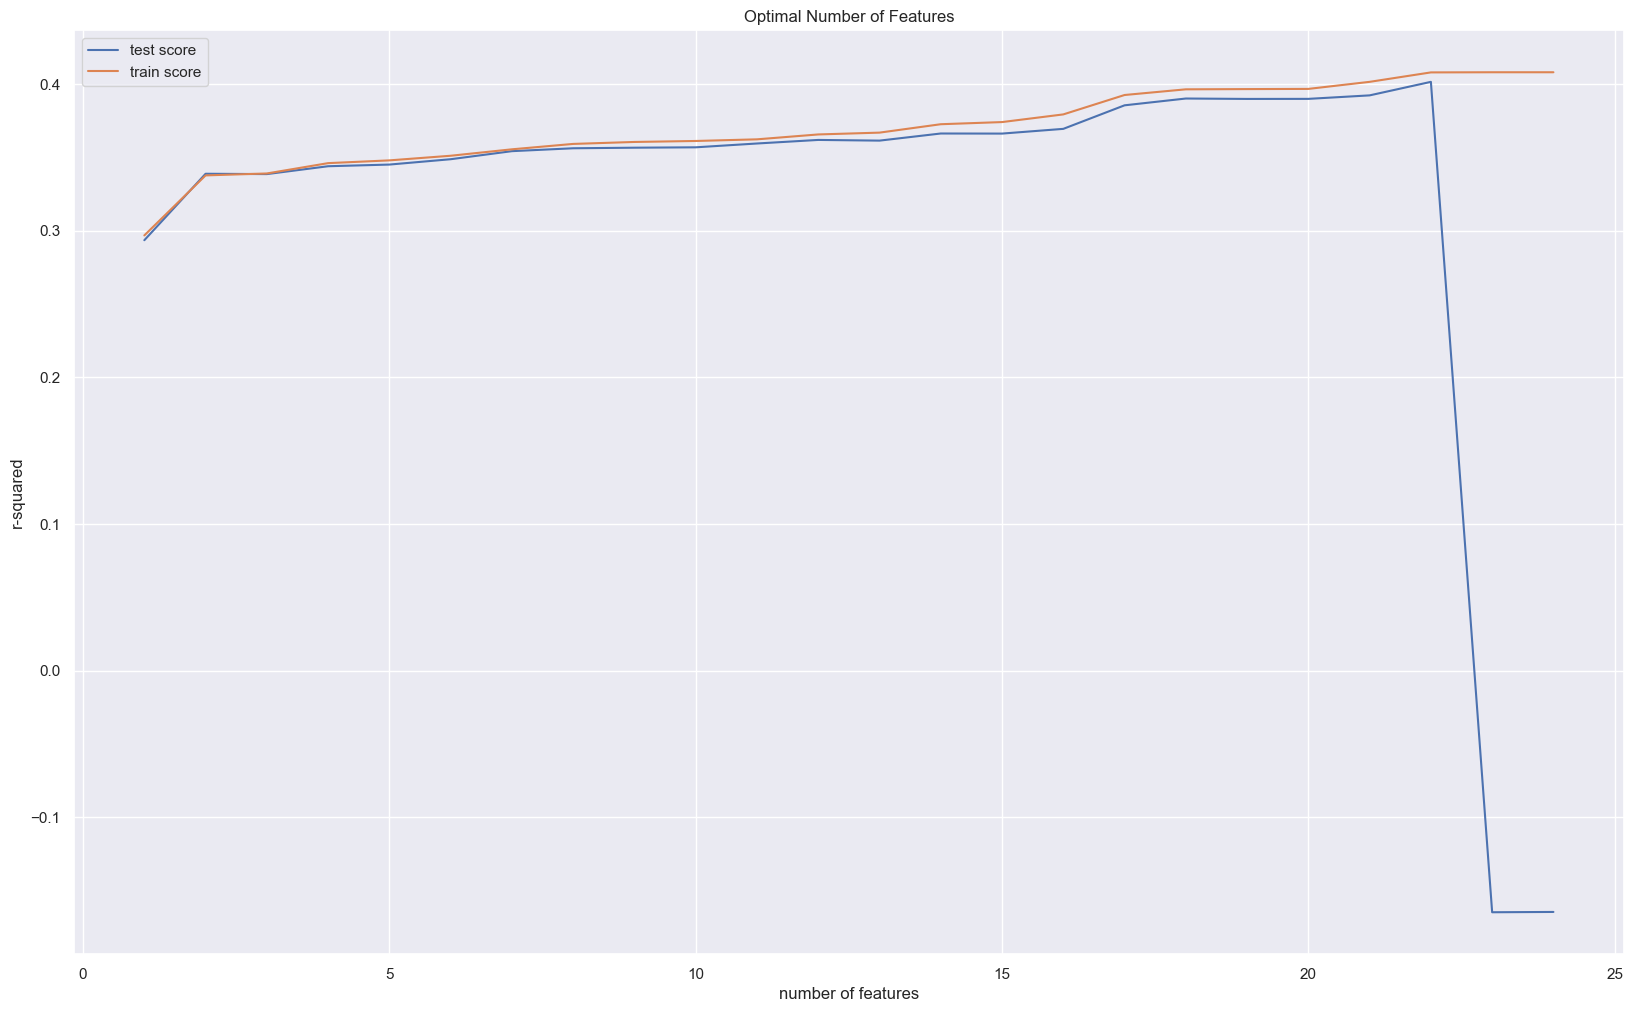

In [110]:
# plotting cv results
plt.figure(figsize=(20,12))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [111]:
#check the data type
print(type(cv_results["mean_test_score"]))
print(type(cv_results['param_n_features_to_select']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [112]:
#max_score = cv_results["mean_test_score"].max()
max_score_index = cv_results["mean_test_score"].idxmax()
n_features_optimal = cv_results['param_n_features_to_select'][max_score_index]
n_features_optimal

22

In [115]:
# given that the optimal number of features to select is 22
n_features_optimal = 22

lm = LinearRegression()
lm.fit(X_train, y_log_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_log_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_log_test, y_pred)
print(r2)

0.40790453504349145


The optimal subset for feature selection is 22 variables, and the resulting model yields an OOS R-squared of 0.4079. 

### Standard LASSO Regression

In [117]:
#optimize the α hyperparameter of Lasso regression

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())])

#test values from 0.01 to 1 with 0.01 step. 
#For each value, we calculate the average value of the mean squared error in a 8-folds CV
#select the value of α that minimizes such average performance metrics

airbnb_lasso = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,1,0.01)},
                        cv = 8, 
                        scoring ="neg_mean_squared_error",
                        verbose=3,
                      )

### Outcome variable: Price

In [118]:
#fit the grid search
airbnb_lasso.fit(X_train, y_train)

Fitting 8 folds for each of 99 candidates, totalling 792 fits
[CV 1/8] END ...........model__alpha=0.01;, score=-187542.381 total time=   0.1s
[CV 2/8] END ...........model__alpha=0.01;, score=-911335.269 total time=   0.1s
[CV 3/8] END ...........model__alpha=0.01;, score=-629784.739 total time=   0.1s
[CV 4/8] END ..........model__alpha=0.01;, score=-6724087.597 total time=   0.1s
[CV 5/8] END ..........model__alpha=0.01;, score=-1011128.893 total time=   0.0s
[CV 6/8] END ..........model__alpha=0.01;, score=-2372922.312 total time=   0.0s
[CV 7/8] END ...........model__alpha=0.01;, score=-323564.620 total time=   0.0s
[CV 8/8] END ...........model__alpha=0.01;, score=-915701.100 total time=   0.0s
[CV 1/8] END ...........model__alpha=0.02;, score=-187528.064 total time=   0.0s
[CV 2/8] END ...........model__alpha=0.02;, score=-911340.546 total time=   0.0s
[CV 3/8] END ...........model__alpha=0.02;, score=-629778.977 total time=   0.1s
[CV 4/8] END ..........model__alpha=0.02;, scor

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             scoring='neg_mean_squared_error', verbose=3)

In [119]:
#The best value for hypertuning parameter (alpha)
airbnb_lasso.best_params_

{'model__alpha': 0.99}

In [120]:
from sklearn.linear_model import Lasso

airbnb_lasso = Lasso(alpha=0.99)
airbnb_lasso.fit(X_train, y_train)

Lasso(alpha=0.99)

In [121]:
#predict on training data
airbnb_lasso_predict = airbnb_lasso.predict(X_train)

#Calculate deviation - difference between actual outcome and predicted value of outcome
airbnb_lasso_error = mean_squared_error(y_train,airbnb_lasso_predict)
print(airbnb_lasso_error)

918479.3752032295


In [122]:
#Summary for training data
print ("For LASSO Regression to predict Price:")
print("Train R2 is ", round(airbnb_lasso.score(X_train,y_train)*100,2))
print("Train MSE is ", round(airbnb_lasso_error,2))
print("Train RMSE is ", round(np.sqrt(airbnb_lasso_error),2))

print("\nThe LASSO model doesnt perform well based on the R2 and MSE values")
print("We attribute to this model being misspecified and try log transformation on our outcome variable")

For LASSO Regression to predict Price:
Train R2 is  5.34
Train MSE is  918479.38
Train RMSE is  958.37

The LASSO model performs even worse than the null model, which predicts price as the mean value
We attribute to this model being misspecified and try log transformation on our outcome variable


In [123]:
#predict on test data
airbnb_lasso_predict = airbnb_lasso.predict(X_test)

#Calculate deviation - difference between actual outcome anf predicted value of outcome
airbnb_lasso_error = mean_squared_error(y_test,airbnb_lasso_predict)
print(airbnb_lasso_error)

585218.4748052593


In [126]:
#Summary for test data
print ("For LASSO Regression to predict Price:")
print("Test R2 is ", round(airbnb_lasso.score(X_test,y_test)*100,2))
print("Test MSE is ", round(airbnb_lasso_error,2))
print("Test RMSE is ", round(np.sqrt(airbnb_lasso_error),2))

print("\nThe LASSO model performs even worse than the null model, which predicts price as the mean value. The model seems to be overfit and is not generalizing well")
print("We further attribute to this model being misspecified and try log transformation on our outcome variable")

For LASSO Regression to predict Price:
Test R2 is  -0.11
Test MSE is  585218.47
Test RMSE is  765.0

The LASSO model performs even worse than the null model, which predicts price as the mean value. The model seems to be overfit and is not generalizing well
We further attribute to this model being misspecified and try log transformation on our outcome variable


### Outcome Variable: Log_Price

In [127]:
#optimize the α hyperparameter of Lasso regression

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())])

#test values from 0.01 to 1 with 0.01 step. 
#For each value, we calculate the average value of the mean squared error in a 8-folds CV
#select the value of α that minimizes such average performance metrics

airbnb_lasso = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,1,0.01)},
                      cv = 8, scoring="neg_mean_squared_error",verbose=3
                      )

In [128]:
#fit the grid search
airbnb_lasso.fit(X_train, y_log_train)

Fitting 8 folds for each of 99 candidates, totalling 792 fits
[CV 1/8] END ................model__alpha=0.01;, score=-0.270 total time=   0.0s
[CV 2/8] END ................model__alpha=0.01;, score=-0.392 total time=   0.0s
[CV 3/8] END ................model__alpha=0.01;, score=-0.337 total time=   0.0s
[CV 4/8] END ................model__alpha=0.01;, score=-0.960 total time=   0.0s
[CV 5/8] END ................model__alpha=0.01;, score=-0.350 total time=   0.0s
[CV 6/8] END ................model__alpha=0.01;, score=-0.414 total time=   0.0s
[CV 7/8] END ................model__alpha=0.01;, score=-0.342 total time=   0.0s
[CV 8/8] END ................model__alpha=0.01;, score=-0.359 total time=   0.0s
[CV 1/8] END ................model__alpha=0.02;, score=-0.276 total time=   0.0s
[CV 2/8] END ................model__alpha=0.02;, score=-0.400 total time=   0.0s
[CV 3/8] END ................model__alpha=0.02;, score=-0.343 total time=   0.0s
[CV 4/8] END ................model__alpha=0.02;

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             scoring='neg_mean_squared_error', verbose=3)

In [129]:
#get the optimum value of tuning parameter (alpha)
airbnb_lasso.best_params_

{'model__alpha': 0.02}

In [130]:
###Feature Selection:

In [131]:
airbnb_lasso_coefficients = airbnb_lasso.best_estimator_.named_steps['model'].coef_

In [132]:
airbnb_lasso_importance = np.abs(airbnb_lasso_coefficients)
print(airbnb_lasso_importance > 0)

[ True  True  True False  True False False False False False  True  True
 False  True  True  True False False  True  True  True  True  True  True]


In [133]:
lasso_importances = pd.DataFrame(data={
                                'Attribute': X_train.columns,
                                'Importance': np.abs(airbnb_lasso_coefficients)})

#rank all features that affect listing price
lasso_importances.sort_values(by='Importance', ascending=False)

,Attribute,Importance
1,accommodates,0.317640
4,minimum_nights,0.083014
2,bedrooms,0.077273
22,room_type_cat,0.076212
14,host_acceptance_rate,0.059707
0,host_listings_count,0.055049
21,amenities_variety,0.046203
13,host_response_rate,0.035531
11,reviews_per_month,0.027760
19,has_availability,0.014722


In [134]:
#features that survived lasso
print(lasso_importances[lasso_importances['Importance'] > 0])
print(len(lasso_importances[lasso_importances['Importance'] > 0]))

                     Attribute  Importance
0          host_listings_count    0.055049
1                 accommodates    0.317640
2                     bedrooms    0.077273
4               minimum_nights    0.083014
10      number_of_reviews_l30d    0.007816
11           reviews_per_month    0.027760
13          host_response_rate    0.035531
14        host_acceptance_rate    0.059707
15           host_is_superhost    0.001211
18      host_identity_verified    0.007878
19            has_availability    0.014722
20            instant_bookable    0.007937
21           amenities_variety    0.046203
22               room_type_cat    0.076212
23  neighbourhood_cleansed_cat    0.012917
15


In [135]:
print("The optimal subset for feature selection is 15 variables, which have coefficients > 0 as Lasso imposes a higher level of penalty.")

The optimal subset for feature selection is 15 variables, which have coefficients > 0 as Lasso imposes a higher level of penalty.


In [138]:
from sklearn.linear_model import Lasso

airbnb_lasso = Lasso(alpha=0.02)
airbnb_lasso.fit(X_train, y_log_train)

Lasso(alpha=0.02)

In [139]:
#predict on training data
airbnb_lasso_predict = airbnb_lasso.predict(X_train)

#Calculate deviation - difference between actual outcome and predicted value of outcome
airbnb_lasso_error = mean_squared_error(y_log_train,airbnb_lasso_predict)
print(airbnb_lasso_error)

0.35788397156224266


In [142]:
#Summary for training data
print ("For LASSO Regression to predict Log Price:")
print("Train R2 is ", round(airbnb_lasso.score(X_train,y_log_train)*100,2))
print("Train MSE is ", round(airbnb_lasso_error,2))
print("Train RMSE is ", round(np.sqrt(airbnb_lasso_error),2))

print("\nThe LASSO model doesnt performs well, based on the R2 and MSE values")

For LASSO Regression to predict Log Price:
Train R2 is  38.94
Train MSE is  0.36
Train RMSE is  0.6

The LASSO model doesnt performs well, based on the R2 and MSE values


In [143]:
#predict on test data
airbnb_lasso_predict = airbnb_lasso.predict(X_test)

#Calculate deviation - difference between actual outcome anf predicted value of outcome
airbnb_lasso_error = mean_squared_error(y_log_test,airbnb_lasso_predict)
print(airbnb_lasso_error)

0.3321776100814049


In [146]:
#Summary
print ("For LASSO Regression to predict Price:")
print("Test R2 is ", round(airbnb_lasso.score(X_test,y_log_test)*100,2))
print("Test MSE is ", round(airbnb_lasso_error,2))
print("Test RMSE is ", round(np.sqrt(airbnb_lasso_error),2))

print("\nR2 has improved to 39.81% which means that the log model fits better. Also the values are slightly improved as compared to the training data which implies that our model is not overfit and is generalizing well")

For LASSO Regression to predict Price:
Test R2 is  39.81
Test MSE is  0.33
Test RMSE is  0.58

R2 has improved to 39.81% which means that the log model fits better. Also the values are slightly improved as compared to the training data which implies that our model is not overfit and is generalizing well


### CART Decision Tree

### Outcome variable: Price

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#find optimum values of max_depth and min_sample_split size

airbnb_ds = DecisionTreeRegressor()

gs = GridSearchCV(airbnb_ds,
                  param_grid = {'max_depth': range(1, 20),
                                'min_samples_split': range(10, 60, 10)},
                  cv = 8,
                  n_jobs = 1,
                  scoring = 'neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 7, 'min_samples_split': 10}
713869.3076877247


In [148]:
#create the decision tree for predicting pricing
airbnb_ds = DecisionTreeRegressor(max_depth = 8,
                                  min_samples_split = 10,
                                  random_state = 200)
#plot new model
airbnb_ds.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=10, random_state=200)

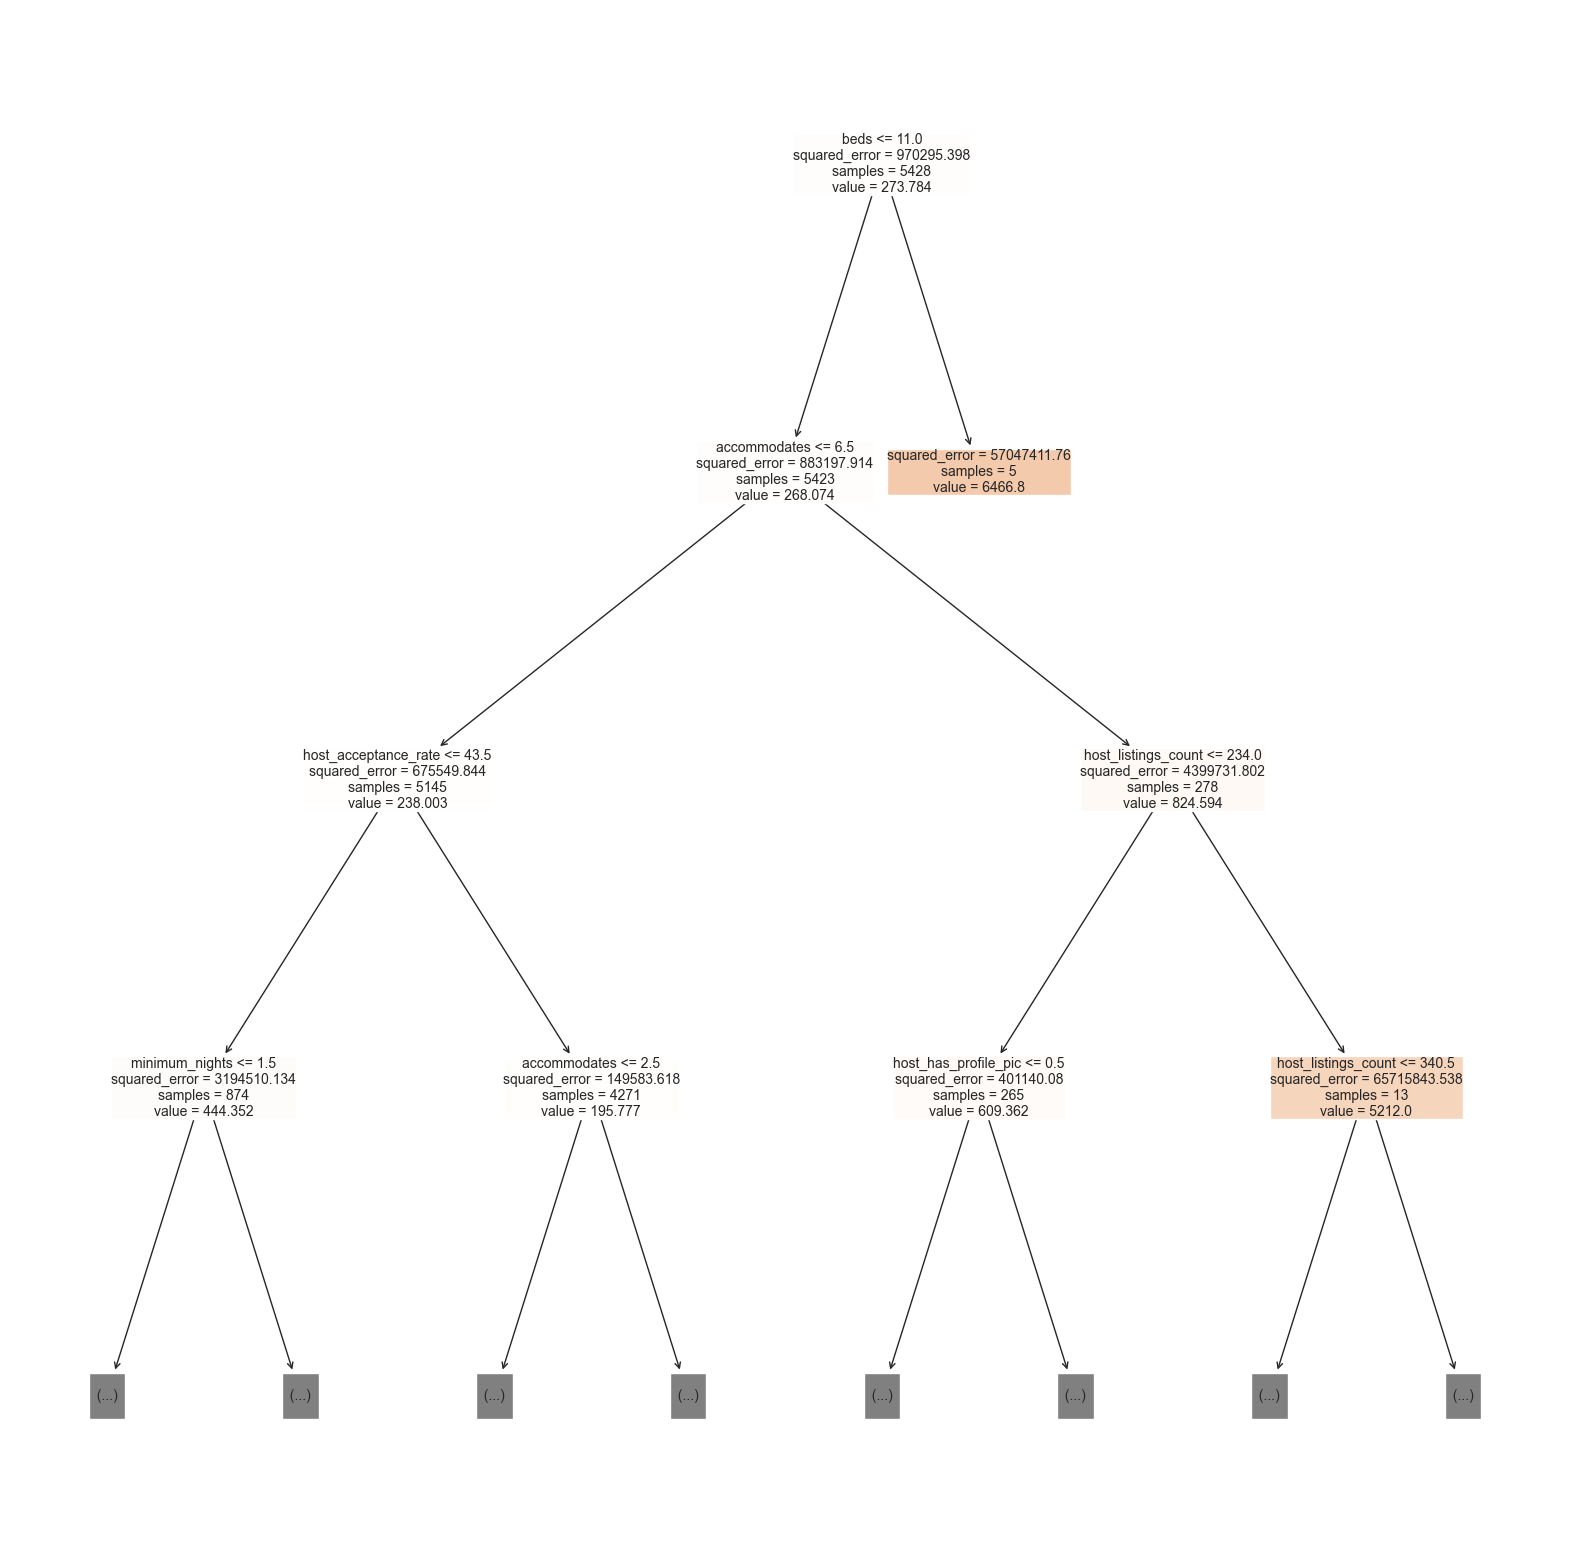

In [149]:
from sklearn.tree import export_graphviz
import graphviz

from sklearn import tree
import dtreeviz
from matplotlib import pyplot as plt

#visualize the decision tree

plt.rcParams.update({'font.size': 1000})
plt.figure(figsize=(20,20))
_ = tree.plot_tree(airbnb_ds, 
                   feature_names = airbnb_x.columns,
                   max_depth = 3, #to visualize better
                   filled = True)

In [150]:
#get the coefficient of determination of the prediction (R2)
airbnb_ds.score(X_test,y_test)

-0.912735310277488

In [151]:
#validate CART regressor tree model on test data set

airbnb_ds_pred = airbnb_ds.predict(X_test)
print(airbnb_ds_pred)
print(len(airbnb_ds_pred))

[199.20647149 139.72780436 470.17142857 ... 139.72780436 257.37278912
 139.72780436]
1358


Text(0, 0.5, 'Actual outcome values')

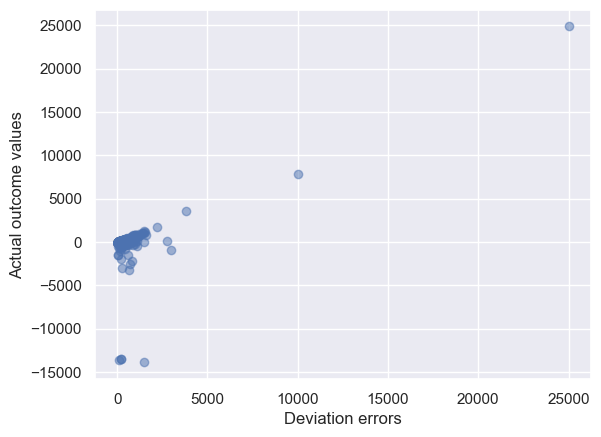

In [152]:
#Create scatter plot between the Actual values and deviation errors
airbnb_ds_errors = y_test - airbnb_ds_pred

plt.scatter(y_test, airbnb_ds_errors, alpha=0.5)
plt.xlabel('Deviation errors')
plt.ylabel('Actual outcome values')

In [153]:
#calculate MSE for CART regressor tree
from sklearn import metrics
from statistics import mean

airbnb_ds_error = metrics.mean_squared_error(y_test, airbnb_ds_pred)

#same as 
print(mean(airbnb_ds_errors*airbnb_ds_errors))

1118173.910582443


In [155]:
#Summary
print ("For CART Regressor to predict Price:")
print("Test R2 is ", round(airbnb_ds.score(X_test,y_test)*100,2))
print("Test MSE is ", round(airbnb_ds_error,2))
print("Test RMSE is ", round(np.sqrt(airbnb_ds_error),2))

print("\nThe CART Regressor to predict price performs even worse than the null model, which predicts price as the mean value. We attribute this to the model being misspecified and try log transformation on our outcome variable")

For CART Regressor to predict Price:
Test R2 is  -91.27
Test MSE is  1118173.91
Test RMSE is  1057.44

The CART Regressor to predict price performs even worse than the null model, which predicts price as the mean value. We attribute this to the model being misspecified and try log transformation on our outcome variable


### Outcome variable: Log_Price

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#find optimum values of max_depth and min_sample_split size

airbnb_ds = DecisionTreeRegressor()

gs = GridSearchCV(airbnb_ds,
                  param_grid = {'max_depth': range(1, 20),
                                'min_samples_split': range(10, 60, 10)},
                  cv = 8,
                  n_jobs = 1,
                  scoring = 'neg_mean_squared_error')

gs.fit(X_train, y_log_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 8, 'min_samples_split': 50}
0.28920351554252693


In [159]:
#create the decision tree for predicting pricing
airbnb_ds = DecisionTreeRegressor(max_depth = 8,
                                  min_samples_split = 50,
                                  random_state = 200)
#plot new model
airbnb_ds.fit(X_train, y_log_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=50, random_state=200)

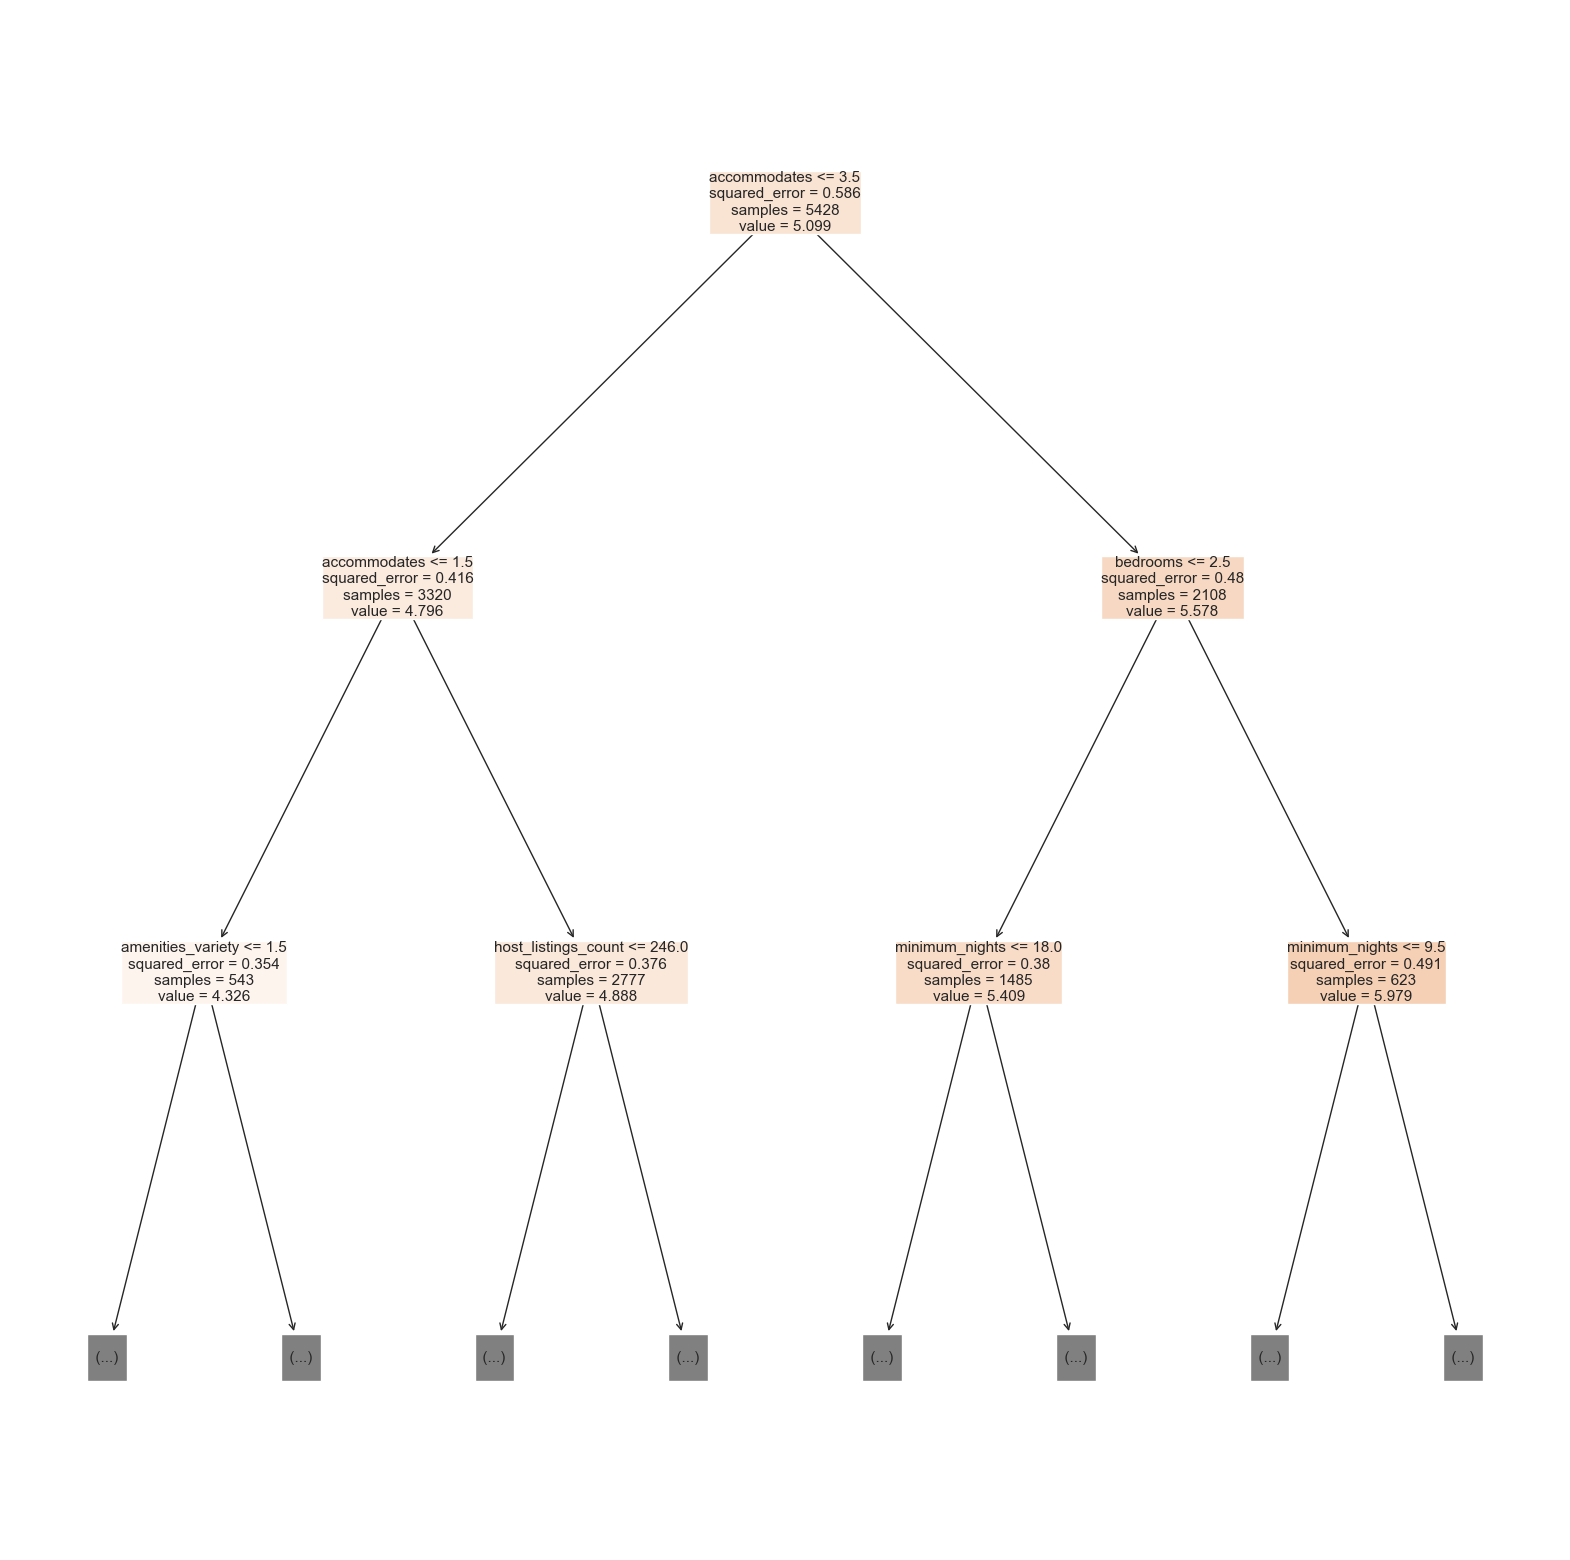

In [160]:
from sklearn.tree import export_graphviz
import graphviz

from sklearn import tree
import dtreeviz
from matplotlib import pyplot as plt

#visualize the decision tree

plt.rcParams.update({'font.size': 1000})
plt.figure(figsize=(20,20))
_ = tree.plot_tree(airbnb_ds, 
                   feature_names = airbnb_x.columns,
                   max_depth = 2, #to visualize better
                   filled = True)

In [161]:
#The tree through CART is split on 'accomodates' as the first node. 
#If accomodates is <= 3.5, we traverse to the left and if > 3.5 we traverse to the right.
#At level 2, on the left we further split on 'accomdates' while on the right we use the node 'bedrooms' to split
#As we keep traversing the tree, the end nodes will have the average predicted price for all the samples that satisfy the condition leading to that node
#for example -> the average predicted log_price will be 5.578 for properties that accomodate > 3.5 people and have bedrooms <= 2.5

In [162]:
#predict on training data
airbnb_ds_pred = airbnb_ds.predict(X_train)

from sklearn import metrics
from statistics import mean

#calculate MSE
airbnb_ds_errors = y_log_train - airbnb_ds_pred
airbnb_ds_error = metrics.mean_squared_error(y_log_train, airbnb_ds_pred)

In [164]:
#Summary for training data
print ("For CART Regressor to predict Log of Price:")
print("Train R2 is ", round(airbnb_ds.score(X_train,y_log_train)*100,2))
print("Train MSE is ", round(airbnb_ds_error,2))
print("Train RMSE is ", round(np.sqrt(airbnb_ds_error),2))

print("\nThe CART Regressor to predict log price has an R2 of 63.73% and hence is a much better fit for the model.")

For CART Regressor to predict Log of Price:
Train R2 is  63.73
Train MSE is  0.21
Train RMSE is  0.46

The CART Regressor to predict log price has an R2 of 63.73% and hence is a much better fit for the model.


Text(0, 0.5, 'Actual outcome values')

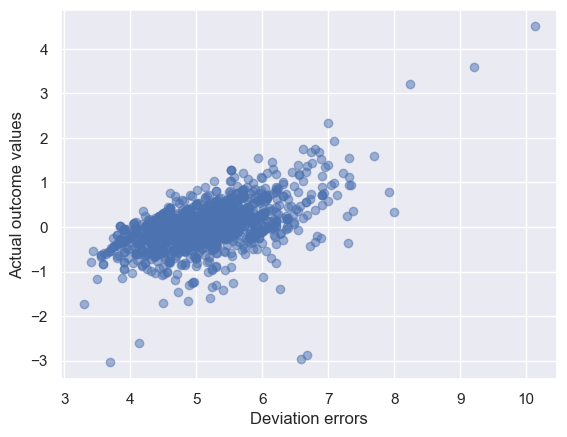

In [166]:
#validate CART regressor tree model on test data set
airbnb_ds_pred = airbnb_ds.predict(X_test)


#Create scatter plot between the Actual values and deviation errors
airbnb_ds_errors = y_log_test - airbnb_ds_pred

plt.scatter(y_log_test, airbnb_ds_errors, alpha=0.5)
plt.xlabel('Deviation errors')
plt.ylabel('Actual outcome values')

In [167]:
#calculate MSE for CART regressor tree
from sklearn import metrics
from statistics import mean

airbnb_ds_error = metrics.mean_squared_error(y_log_test, airbnb_ds_pred)

#same as 
print(mean(airbnb_ds_errors * airbnb_ds_errors))

0.2796070008794858


In [168]:
#Summary
print ("For CART Regressor to predict Log of Price:")
print("R2 is ", round(airbnb_ds.score(X_test,y_log_test)*100,2))
print("MSE is ", round(airbnb_ds_error,2))
print("RMSE is ", round(np.sqrt(airbnb_ds_error),2))

print("\nThe CART Regressor to predict log price has an R2 of 49.34%, less than that of training data which suggests that the model is overfitting the data. Hence we would need to either prune the tree or try another algorithm to obtain better performance")

For CART Regressor to predict Log of Price:
R2 is  49.34
MSE is  0.28
RMSE is  0.53

The CART Regressor to predict log price has an R2 of 49.34% and hence is a much better fit for the model


### Random Forest with Bagging

### Outcome Variable: Price

In [169]:
from sklearn.ensemble import RandomForestRegressor

#Fit classifier with out-of-bag estimates

#Any n_estimators value below 20 would throw the warning: 
#Some inputs do not have OOB scores
#This probably means too few trees were used to compute any reliable OOB estimates

print("Score for n_estimators: \n")
oob_list = []

for i in range(20,1000,20): 
    airbnb_rf = RandomForestRegressor (n_estimators = i,
                                 #max_depth = 5,
                                 max_features = 'sqrt', #The no. of features to consider when looking for the best split
                                 bootstrap = True,
                                 oob_score = True,
                                 random_state = 200)
    airbnb_rf.fit(X_train,y_train)
    
    oob = airbnb_rf.oob_score_ #random forest cv method, gives us the error rate
    oob_list.append(oob)
    
    print(str(i) + ' : ' + str(oob))

Score for n_estimators: 

20 : 0.21056164064946647
40 : 0.2872740356308203
60 : 0.34390319117441825
80 : 0.36197646132333594
100 : 0.3646720375157395
120 : 0.37754845736560383
140 : 0.3931538370587203
160 : 0.4021494620591143
180 : 0.3998956738480183
200 : 0.405635421314931
220 : 0.40614550362861324
240 : 0.39727603881149354
260 : 0.3946757672283763
280 : 0.3928642870915423
300 : 0.39502481231468956
320 : 0.3956200428586041
340 : 0.3957801656589016
360 : 0.3973663908429478
380 : 0.4018784360198049
400 : 0.40554658013785394
420 : 0.39978245517935485
440 : 0.39799853736354596
460 : 0.39847315306825826
480 : 0.3969748774430716
500 : 0.3980392321774432
520 : 0.3965554382410297
540 : 0.3978782300170718
560 : 0.4006167001011611
580 : 0.4008736582750919
600 : 0.3995395258918025
620 : 0.40043338494431246
640 : 0.39863107615571114
660 : 0.397732704601769
680 : 0.3989829097475335
700 : 0.3965473690003566
720 : 0.4002033116835262
740 : 0.4021205748379755
760 : 0.4021779509257608
780 : 0.401153648

In [170]:
#to find optimum value of n_estimators

oob_max = max(oob_list)
print(oob_max)

#This corresponds to n_estimators = 220

0.40614550362861324


In [171]:
#Fit a random forest regressor
#for n_estimators = 940
#which corresponds to the maximum OOB score, calculated above

airbnb_rf = RandomForestRegressor(n_estimators = 220,
                                  #max_depth = 10,
                                  max_features = 'sqrt',
                                  oob_score = True,
                                  random_state = 200)
airbnb_rf.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=220, oob_score=True,
                      random_state=200)

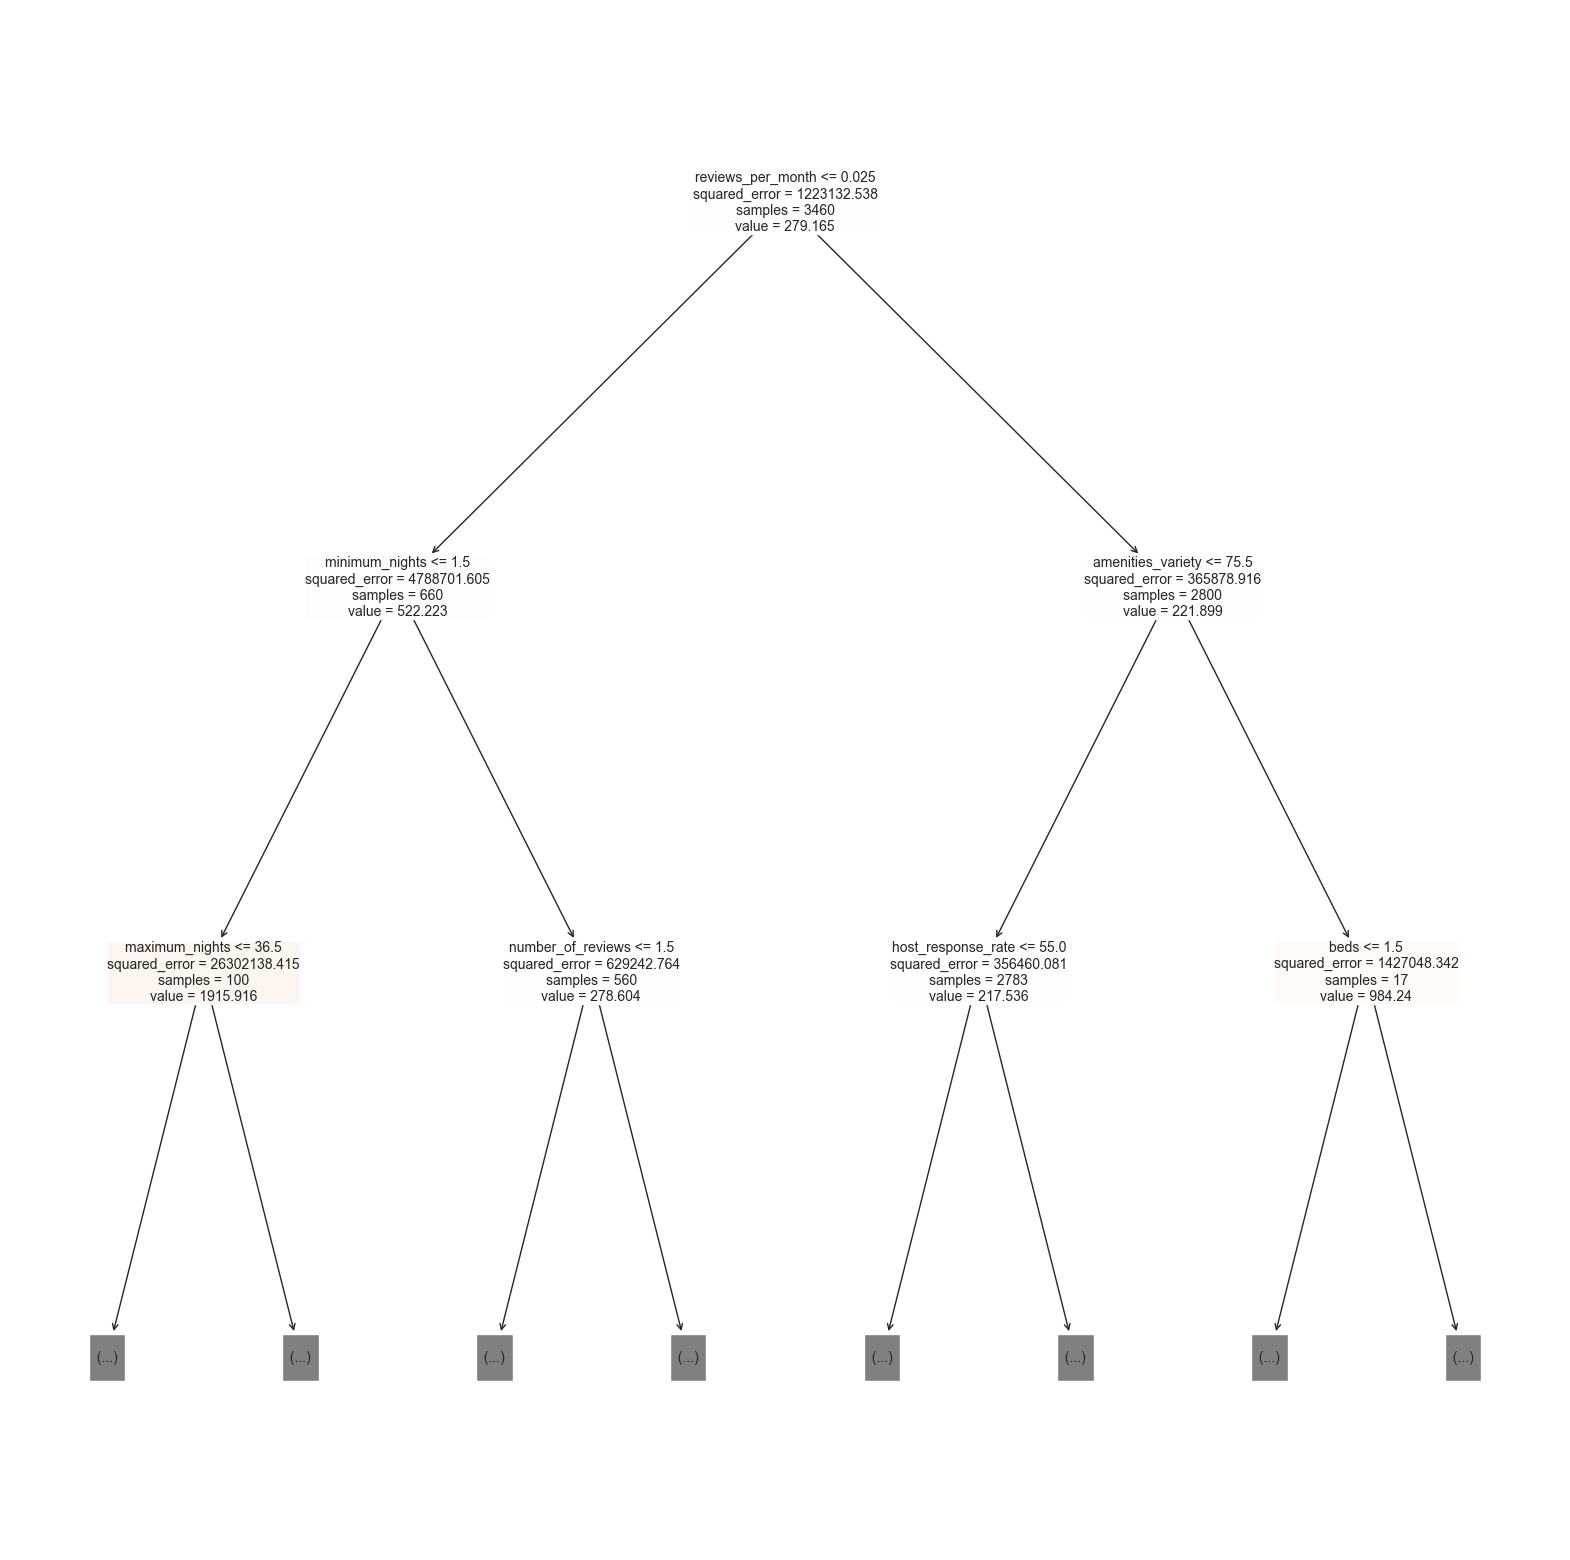

In [172]:
from sklearn import tree
import dtreeviz
from matplotlib import pyplot as plt

#visualize the decision tree

plt.rcParams.update({'font.size': 1000})
plt.figure(figsize=(20,20))
_ = tree.plot_tree(airbnb_rf.estimators_[0], 
                   feature_names = airbnb_x.columns,
                   max_depth = 2, #to visualize better
                   filled = True)

In [173]:
#get the coefficient of determination of the prediction (R2)
airbnb_rf.score(X_test,y_test)

-0.319035397097041

In [174]:
#validate RF regressor tree model on test data set

airbnb_rf_pred = airbnb_rf.predict(X_test)
print(airbnb_rf_pred)
print(len(airbnb_rf_pred))

[ 62.43030303 120.83636364 320.48636364 ... 215.68636364 669.16818182
 133.58030303]
1358


Text(0, 0.5, 'Actual outcome values')

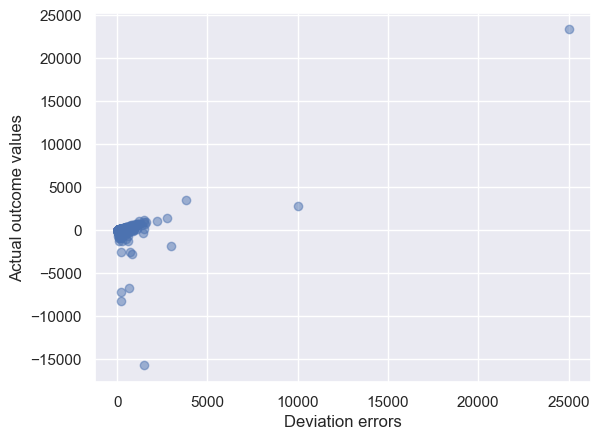

In [175]:
#Create scatter plot between the Actual values and deviation errors
airbnb_rf_errors = y_test - airbnb_rf_pred

plt.scatter(y_test, airbnb_rf_errors, alpha=0.5)
plt.xlabel('Deviation errors')
plt.ylabel('Actual outcome values')

In [176]:
#calculate MSE for CART regressor tree
from sklearn import metrics
from statistics import mean

airbnb_rf_error = metrics.mean_squared_error(y_test, airbnb_rf_pred)

#same as 
print(mean(airbnb_rf_errors * airbnb_rf_errors))

771100.4027811319


In [177]:
#Summary
print ("For CART Regressor to predict Price:")
print("OOB R2 is ", round(airbnb_rf.score(X_test,y_test)*100,2))
print("MSE is ", round(airbnb_rf_error,2))
print("RMSE is ", round(np.sqrt(airbnb_rf_error),2))

print("\nSame as the other models, the Random Forest Regressor to predict price performs even worse than the null model, which predicts price as the mean value")
print("We attribute this to the model being misspecified and try log transformation on our outcome variable")

For CART Regressor to predict Price:
OOB R2 is  -31.9
MSE is  771100.4
RMSE is  878.12

Same as the other models, the Random Forest Regressor to predict price performs even worse than the null model, which predicts price as the mean value
We attribute this to the model being misspecified and try log transformation on our outcome variable


### Outcome : Log_Price

In [178]:
from sklearn.ensemble import RandomForestRegressor

#Fit classifier with out-of-bag estimates

#Any n_estimators value below 20 would throw the warning: 
#Some inputs do not have OOB scores
#This probably means too few trees were used to compute any reliable OOB estimates

print("Score for n_estimators: \n")
oob_list = []

for i in range(20,1000,20): 
    airbnb_rf = RandomForestRegressor (n_estimators = i,
                                 #max_depth = 5,
                                 max_features = 'sqrt', #The no. of features to consider when looking for the best split
                                 bootstrap = True,
                                 oob_score = True,
                                 random_state = 200)
    airbnb_rf.fit(X_train,y_log_train)
    
    oob = airbnb_rf.oob_score_ #random forest cv method, gives us the error rate
    oob_list.append(oob)
    
    print(str(i) + ' : ' + str(oob))

Score for n_estimators: 

20 : 0.5993799537840994
40 : 0.6399294140170527
60 : 0.656067777855581
80 : 0.6604059990575815
100 : 0.6661753547496589
120 : 0.6680970713497075
140 : 0.6710572939772368
160 : 0.6697613457237591
180 : 0.6710918670718803
200 : 0.6718911806545416
220 : 0.6737341822158014
240 : 0.6741221264848885
260 : 0.6744125258213924
280 : 0.6749617303695188
300 : 0.6754116149228007
320 : 0.6757016847691486
340 : 0.675166335418838
360 : 0.6751237191358517
380 : 0.675097620581592
400 : 0.6748661087531129
420 : 0.6752285739880473
440 : 0.6754192416640465
460 : 0.6755841357584131
480 : 0.6756890072498567
500 : 0.6757694499485178
520 : 0.6754066912691368
540 : 0.6750983554053951
560 : 0.6753411297316005
580 : 0.6753261779449398
600 : 0.6751168267237617
620 : 0.6748314708824643
640 : 0.6747353628046642
660 : 0.6748939985859913
680 : 0.6750032875855847
700 : 0.6751268941292872
720 : 0.6751319774346832
740 : 0.6751502501415307
760 : 0.6754327729638789
780 : 0.6755019836037373
800 : 

In [179]:
oob_max = max(oob_list)
print(oob_max)

#This corresponds to n_estimators = 840

0.6761331212346973


In [180]:
#Fit a random forest regressor
#for n_estimators = 840
#which corresponds to the maximum OOB score, calculated above

airbnb_rf = RandomForestRegressor(n_estimators = 840,
                                  #max_depth = 10,
                                  max_features = 'sqrt',
                                  oob_score = True,
                                  random_state = 200)
airbnb_rf.fit(X_train,y_log_train)

RandomForestRegressor(max_features='sqrt', n_estimators=840, oob_score=True,
                      random_state=200)

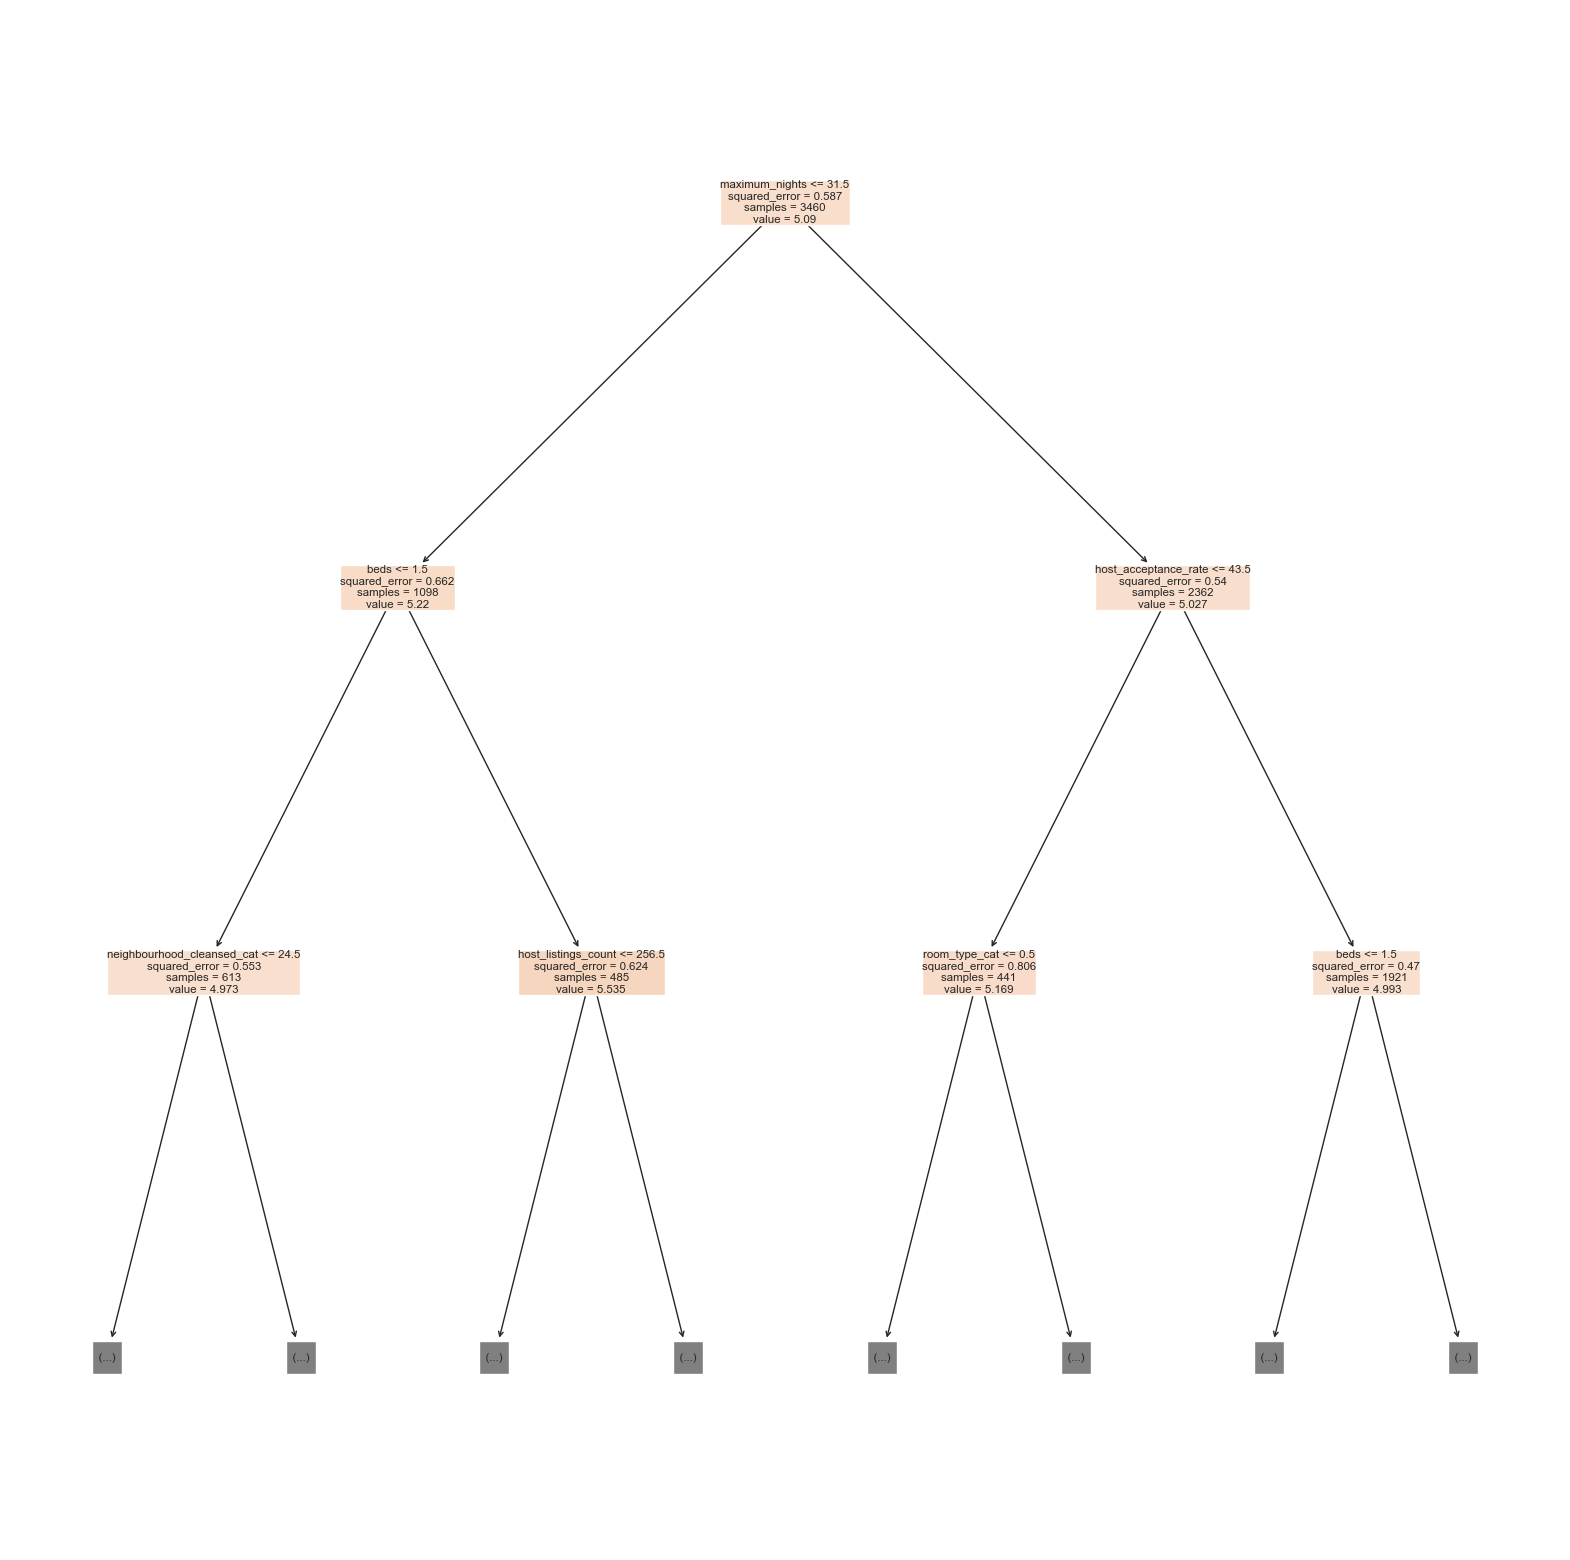

In [181]:
from sklearn import tree
import dtreeviz
from matplotlib import pyplot as plt

#visualize the decision tree

plt.rcParams.update({'font.size': 1000})
plt.figure(figsize=(20,20))
_ = tree.plot_tree(airbnb_rf.estimators_[0], 
                   feature_names = airbnb_x.columns,
                   max_depth = 2, #to visualize better
                   filled = True)

In [182]:
#The tree through random forest bagging is split on 'maximum_nights' as the first node. 
#If maximum_nights is <= 31.5, we traverse to the left and if > 31.5 we traverse to the right.
#At level 2, on the left we further split on 'beds' while on the right we use the node 'host_acceptance_rate' to split
#As we keep traversing the tree, the end nodes will have the average predicted price for all the samples that satisfy the condition leading to that node
#for example -> the average predicted log_price will be 5.22 for properties that maximum_nights > 31.5 and have beds <= 1.5

In [184]:
#predict on training data
airbnb_rf_pred = airbnb_rf.predict(X_train)

#calculate MSE
airbnb_rf_errors = y_log_train - airbnb_rf_pred

from sklearn import metrics
from statistics import mean

airbnb_rf_error = metrics.mean_squared_error(y_log_train, airbnb_rf_pred)

In [186]:
#Summary for training data
print ("For RF Regressor to predict Log Price:")
print("Train R2 is ", round(airbnb_rf.score(X_train,y_log_train)*100,2))
print("Train MSE is ", round(airbnb_rf_error,3))
print("Train RMSE is ", round(np.sqrt(airbnb_rf_error),2))

print("The R2 has improved to 96.59% which is significantly higher than the previous models")

For RF Regressor to predict Log Price:
Train R2 is  95.59
Train MSE is  0.026
Train RMSE is  0.16
The R2 has improved to 96.59% which is significantly higher than the previous models


Text(0, 0.5, 'Actual outcome values')

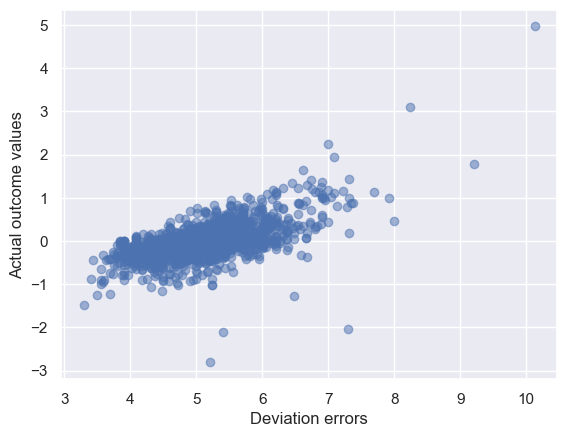

In [187]:
#validate random forest regressor model on test data set
airbnb_rf_pred = airbnb_rf.predict(X_test)

#Create scatter plot between the Actual values and deviation errors
#Create scatter plot between the Actual values and deviation errors
airbnb_rf_errors = y_log_test - airbnb_rf_pred

plt.scatter(y_log_test, airbnb_rf_errors, alpha=0.5)
plt.xlabel('Deviation errors')
plt.ylabel('Actual outcome values')

In [188]:
#calculate MSE for random forest regressor
from sklearn import metrics
from statistics import mean

airbnb_rf_error = metrics.mean_squared_error(y_log_test, airbnb_rf_pred)

#same as 
print(mean(airbnb_rf_errors * airbnb_rf_errors))

0.19632675083102694


In [194]:
#Summary for Testing data
print ("For RF Regressor to predict Log Price:")
print("OOS R2 is ", round(airbnb_rf.score(X_test,y_log_test)*100,2))
print("MSE is ", round(airbnb_rf_error,3))
print("RMSE is ", round(np.sqrt(airbnb_rf_error),2))

print("The OOS R2 has dropped to 64.43% as compared to the training R2 which seems that the model slightly is overfitting. Yet the overall OOS R2 is drastically higher as compared to the rest of the algorithms we ran so far")

For RF Regressor to predict Log Price:
OOS R2 is  64.43
MSE is  0.196
RMSE is  0.44
The OOS R2 has dropped to 64.43% as compared to the training R2 which seems that the model slightly is overfitting. Yet the overall OOS R2 is drastically higher as compared to the rest of the algorithms we ran so far


In [195]:
#Check for feature/ variable importance

#print(airbnb_rf.feature_importances_)

#Sort the feature importance values in a descending order to get the most important features 
airbnb_rf_feat = pd.Series(airbnb_rf.feature_importances_,
                           index = airbnb_x.columns.tolist())

print(airbnb_rf_feat.sort_values(ascending=False))

accommodates                  0.153711
bedrooms                      0.098080
minimum_nights                0.077660
host_listings_count           0.068032
beds                          0.067717
amenities_variety             0.059528
room_type_cat                 0.056302
reviews_per_month             0.051598
availability_365              0.051274
neighbourhood_cleansed_cat    0.050886
maximum_nights                0.045241
number_of_reviews             0.040360
host_acceptance_rate          0.036187
availability_30               0.031449
number_of_reviews_ltm         0.029045
host_response_rate            0.017525
host_verifications            0.013991
instant_bookable              0.012513
host_response_time            0.011060
number_of_reviews_l30d        0.009739
host_is_superhost             0.007380
host_identity_verified        0.005920
has_availability              0.003141
host_has_profile_pic          0.001661
dtype: float64


In [196]:
print("The top 6 (with coeff >= 0.6) features essential in price prediction based on RF regressor algorithm include:")
print("1. accomodates")
print("2. bedrooms")
print("3. minimum_nights")
print("4. host_listings_count")
print("5. beds")
print("6. amenities_variety")

The top 6 (with coeff >= 0.6) features essential in price prediction based on RF regressor algorithm include:
1. accomodates
2. bedrooms
3. minimum_nights
4. host_listings_count
5. beds
6. amenities_variety


### Outputs from Regressions for Price Prediction (Log_Price):

In [197]:
# R2-------------------------------->

# Linear Regression:            40.79%
# Lasso Regression:             39.81%
# CART Regressor Decision Tree: 49.34%
# Random Forest Regressor Tree: 64.43%
    
# RMSE------------------------------>

# Linear Regression:            0.33
# Lasso Regression:             0.58
# CART Regressor Decision Tree: 0.53
# Random Forest Regressor Tree: 0.44

### Evaluation of the various ML Algorithms

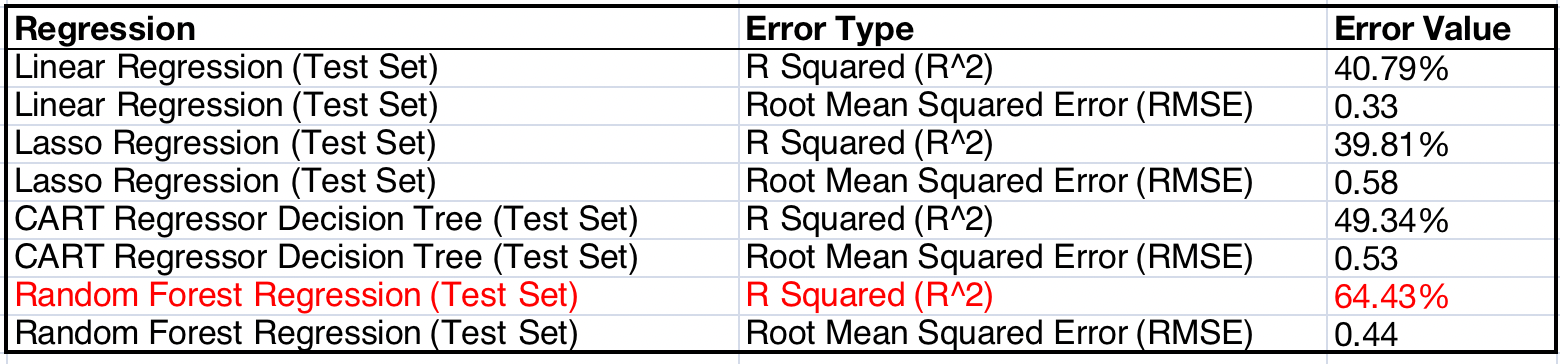

### Part II: K-means Clustering for Airbnb Host Grouping

In [213]:
from sklearn.preprocessing import StandardScaler

#using columns that are most important from random forest
#accomodates, bedrooms, minimum_nights, host_listings_count, beds, amenities_variety

#Creat the training and test set with a ratio of 8:2
#X = airbnb_x
#y = airbnb_y
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

airbnb_cluster =airbnb_concat[["id",
                               "log_price",
                               "accommodates",
                               "bedrooms", 
                               "minimum_nights",
                               "host_listings_count", 
                               "beds", 
                               "amenities_variety"]]                         

In [214]:
#scale data
cluster_scaled = ss.fit_transform(airbnb_cluster)
cluster_scaled = pd.DataFrame(cluster_scaled)

In [215]:
from sklearn.cluster import KMeans

#k-means clustering with given k value = 5 (could also try with other values)
kmeans = KMeans(n_clusters = 5, random_state = 200).fit(cluster_scaled)
inertia = kmeans.inertia_
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [216]:
labels

array([1, 1, 1, ..., 1, 2, 2], dtype=int32)

In [217]:
inertia

23303.68053313718

In [218]:
airbnb_cluster['cluster'] = labels

/var/folders/0x/_blkk8vx49ncsq6zmw061mtw0000gn/T/ipykernel_1598/1716542043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [219]:
airbnb_cluster.head(10)

,id,log_price,accommodates,bedrooms,minimum_nights,host_listings_count,beds,amenities_variety,cluster
0,144978,4.007333,1,1.0,30,9,1.0,19,1
1,958,5.267858,3,1.0,2,1,2.0,53,1
2,5858,5.459586,4,2.0,30,2,2.0,15,1
3,8142,4.025352,1,1.0,32,12,1.0,20,1
4,8339,6.354370,4,2.0,9,2,2.0,34,2
5,8739,4.859812,3,1.0,1,2,1.0,38,1
6,10537,4.553877,2,1.0,1,2,1.0,60,1
7,10578,4.787492,2,1.0,30,1,1.0,14,1
8,11490,4.744932,4,2.0,30,1,2.0,47,1
9,12041,4.174387,2,1.0,32,12,2.0,18,1


In [220]:
cluster1 = airbnb_cluster[airbnb_cluster['cluster'] == 0]
cluster2 = airbnb_cluster[airbnb_cluster['cluster'] == 1]
cluster3 = airbnb_cluster[airbnb_cluster['cluster'] == 2]
cluster4 = airbnb_cluster[airbnb_cluster['cluster'] == 3]
cluster5 = airbnb_cluster[airbnb_cluster['cluster'] == 4]

In [221]:
len(cluster1)

133

In [222]:
len(cluster2)

4319

In [223]:
len(cluster3)

1216

In [224]:
len(cluster4)

144

In [225]:
len(cluster5)

974

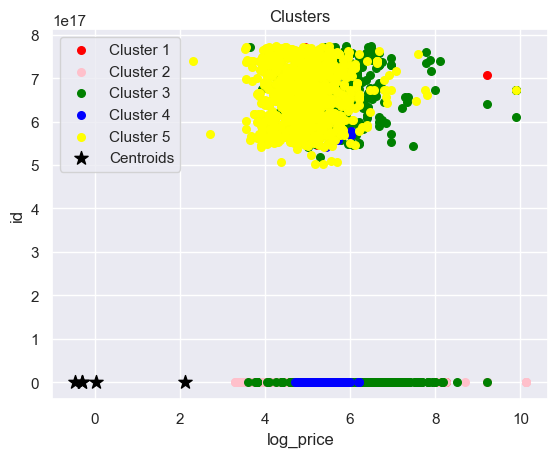

In [226]:
# Plotting the clusters and centroids
plt.scatter(airbnb_cluster[kmeans.labels_ == 0]['log_price'], airbnb_cluster[kmeans.labels_ == 0]['id'], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(airbnb_cluster[kmeans.labels_ == 1]['log_price'], airbnb_cluster[kmeans.labels_ == 1]['id'], s = 30, c = 'pink', label = 'Cluster 2')
plt.scatter(airbnb_cluster[kmeans.labels_ == 2]['log_price'], airbnb_cluster[kmeans.labels_ == 2]['id'], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(airbnb_cluster[kmeans.labels_ == 3]['log_price'], airbnb_cluster[kmeans.labels_ == 3]['id'], s = 30, c = 'blue', label = 'Cluster 4')
plt.scatter(airbnb_cluster[kmeans.labels_ == 4]['log_price'], airbnb_cluster[kmeans.labels_ == 4]['id'], s = 30, c = 'yellow', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '*', s = 100, c = 'black', label = 'Centroids')

# Setting plot title and axis labels
plt.title('Clusters')
plt.xlabel('log_price')
plt.ylabel('id')

# Adding a legend to the plot
plt.legend()

# Displaying the plot
plt.show()

### Interpretation on K-means Clustering Results

We do not see any discernible patterns in the plot. There is an overlap between the centroids and different cluster distribution in the "log_price" and "id" space. We would need further analysis on this to draw any reasonable conclusions. 